In [1]:
import os
import json
import glob
import copy

import numpy as np
import pylab as pl
import seaborn as sns
import pandas as pd

from scipy import stats as spstats

from pipeline.python.classifications import experiment_classes as util
from pipeline.python.utils import natural_keys, label_figure

/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/experiment_classes.py:18: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
   

/home/julianarhee/Repositories/2p-pipeline/pipeline/python/paradigm/tifs_to_data_arrays.py:9: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.st

In [2]:
%matplotlib notebook

# Select data

## IGNORE THESE:
##### V1:  JC076-20190501, JC083-20190510
    - if rfs only, ignore: JC083-20190510, JC083-20190511, 
    
    - if blobs & rfs only, ignore: JC083_20190510, JC083-20190511
    
    - if ALL stimuli, ignore: JC083-20190507, JC083-20190510, 
    
#### Lm:  JC078-20190509, JC080-20190506, JC083-20190517
    - if rfs only, ignore: JC078-20190504, JC078-2019513, 
                           JC083-20190512

    - if blobs & rfs: ignore: JC078-20190426, JC078-2019513
                              JC083-20190512
                              
    - if ALL stimuli, ignore: JC078-20190430, JC078-20190426, JC078-20190504
                              JC083-20190508
#### Li:  JC076-20190422, JC099-20190609, JC091-20190607, JC091-20190606
    

In [3]:
# always_exclude = ['JC076-20190501', 'JC083-20190510', 
#                   'JC078-20190509', 'JC080-20190506', 'JC083-20190517', 'JC078-20190426',
#                  'JC076-20190422', 'JC099-20190609', 'JC091-20190607', 'JC091-20190606']
also_exclude = []
# also_exclude = ['JC083-20190510', 'JC083-20190511', 
#                 'JC078-20190504', 'JC078-2019513',
#                 'JC083-20190512']

always_exclude = ['JC078-20190426'] #, 'JC092-20190527', 'JC076-20190422'] #, 'JC089-20190522?']
# also_exclude = ['JC099-20190617', 'JC099-20190609',
#                 'JC091-20190607', 'JC091-20190606']
#                 'JC083-20190507', 'JC083-20190510', 
#                 'JC078-20190430', 'JC078-20190504',
#                 'JC083-20190512',
#                 'JC076-20190420'] # Repeats
                
# Blobs runs w/ incorrect stuff
always_exclude = ['20190426_JC078']

# Gratings runs w/ incorrect trial epochs or stim configs
lm_repeats = ['20190513_JC078', '20190504_JC078', '20190509_JC078', '20190506_JC080', 
                    '20190512_JC083', '20190517_JC083']
li_repeats = ['20190609_JC099', '20190606_JC091', '20190607_JC091', '20191108_JC113']

v1_repeats = ['20190501_JC076', '20190510_JC083', '20190511_JC083']


excluded_sessions = copy.copy(always_exclude)
excluded_sessions.extend(v1_repeats)
excluded_sessions.extend(lm_repeats)
excluded_sessions.extend(li_repeats)
excluded_sessions = list(set(excluded_sessions))

#excluded_sessions = copy.copy(always_exclude)
#excluded_sessions.extend(also_exclude)
print(len(excluded_sessions))

14


# Set responsivity params

In [4]:
responsive_test = None
responsive_thr = None
n_stds = None
experiment_type = 'rfs'

# Get aggregate data

In [5]:
from pipeline.python.classifications import get_dataset_stats as gd
import cPickle as pkl

options = ['-t', 'traces001']
optsE = gd.extract_options(options)

rootdir = optsE.rootdir
aggregate_dir = optsE.aggregate_dir
fov_type = optsE.fov_type
traceid = optsE.traceid
response_type = 'dff'
print aggregate_dir

/n/coxfs01/julianarhee/aggregate-visual-areas


/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/get_dataset_stats.py:17: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to u'nbAgg' by the following code:
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/juliana

In [6]:
sdata_fpath = os.path.join(aggregate_dir, 'dataset_info.pkl')
if os.path.exists(sdata_fpath):
    with open(sdata_fpath, 'rb') as f:
        sdata = pkl.load(f)
else:
    sdata = gd.aggregate_session_info(traceid=optsE.traceid, trace_type=optsE.trace_type, 
                                       state=optsE.state, fov_type=optsE.fov_type, 
                                       visual_areas=optsE.visual_areas,
                                       blacklist=optsE.blacklist, 
                                       rootdir=optsE.rootdir)
    with open(sdata_fpath, 'wb') as f:
        pkl.dump(sdata, f, protocol=pkl.HIGHEST_PROTOCOL)


In [7]:
stats_desc = util.get_stats_desc(traceid=optsE.traceid,
                                      trace_type= optsE.trace_type,
                                      response_type = response_type,
                                      responsive_test = responsive_test,
                                      responsive_thr = responsive_thr,
                                      n_stds = n_stds)
print(stats_desc)

stats-traces001-corrected-dff-all


In [68]:
dsets[dsets['animalid']=='JC092']

animalid experiment            fov   session visual_area  fovnum
49    JC092      rfs10  FOV2_zoom2p0x  20190527          Li       2
46    JC092   gratings  FOV3_zoom2p0x  20190527          Li       3
47    JC092     retino  FOV3_zoom2p0x  20190527          Li       3
48    JC092      rfs10  FOV3_zoom2p0x  20190527          Li       3
50    JC092     retino  FOV1_zoom2p0x  20190528          Li       1
51    JC092      rfs10  FOV1_zoom2p0x  20190528          Li       1

In [8]:
#dsets = sdata[sdata['experiment'].isin(['rfs', 'rfs10'])] #experiment_type]

In [9]:
# included_ixs = []
# for (animalid, session, fovnum), g in sdata.groupby(['animalid', 'session', 'fovnum']):
#     if ('rfs' in g['experiment'].values or 'rfs10' in g['experiment'].values) \
#     and ('blobs' in g['experiment'].values and 'gratings' in g['experiment'].values):
#         included_ixs.extend(g.index)
# dsets = sdata.loc[included_ixs]

In [10]:

dsets = pd.concat([g for v, g in sdata.groupby(['visual_area', 'animalid', 'session', 'fovnum']) \
        if '%s_%s' % (v[2], v[1]) not in excluded_sessions])

In [11]:
dsets[['visual_area', 'animalid']].drop_duplicates()

visual_area animalid
125          Li    JC076
152          Li    JC080
42           Li    JC089
52           Li    JC090
32           Li    JC091
49           Li    JC092
56           Li    JC099
8            Li    JC111
184          Li    JC113
101          Li    JC117
113          Li    JC120
121          Lm    JC076
130          Lm    JC078
150          Lm    JC080
172          Lm    JC083
4            Lm    JC084
10           Lm    JC091
93           Lm    JC110
177          Lm    JC113
97           Lm    JC117
108          Lm    JC120
115          V1    JC076
157          V1    JC083
0            V1    JC084
37           V1    JC085
80           V1    JC097
90           V1    JC110
95           V1    JC117
107          V1    JC120

# Create output dir for analysis


In [12]:
from pipeline.python.retinotopy import fit_2d_rfs as fitrf

In [13]:
fit_desc = fitrf.get_fit_desc(response_type=response_type)
print fit_desc

fit-2dgaus_dff-no-cutoff


In [14]:
outdir = os.path.join(aggregate_dir, 'receptive-fields', '%s-%s' % (traceid, fit_desc), 'scatter')
if not os.path.exists(outdir):
    os.makedirs(outdir)
print(outdir)

/n/coxfs01/julianarhee/aggregate-visual-areas/receptive-fields/traces001-fit-2dgaus_dff-no-cutoff/scatter


In [15]:
def reformat_morph_values(sdf):
    control_ixs = sdf[sdf['morphlevel']==-1].index.tolist()
    sizevals = np.array([round(s, 1) for s in sdf['size'].unique() if s not in ['None', None] and not np.isnan(s)] )
    sdf.loc[sdf.morphlevel==-1, 'size'] = pd.Series(sizevals, index=control_ixs)
    sdf['size'] = [round(s, 1) for s in sdf['size'].values]

    return sdf


In [16]:
# Set plotting params
threshold_dff = False
min_dff = 0
cmap = 'inferno'


In [17]:
def get_rfdata(sdata, fit_desc=None, excluded_sessions=[]):
    assert fit_desc is not None, "No fit-desc specified!"
    
    rfdata = sdata[sdata['experiment'].isin(['rfs', 'rfs10'])]
    for skey in excluded_sessions:
        animalid, session = skey.split('-')
        drop_ixs = rfdata[(rfdata['animalid']==animalid) & (rfdata['session']==session)].index.tolist()
        rfdata= rfdata.drop(drop_ixs)
            
    fit_these = []
    dpaths = {}
    unknown = []
    for (visual_area, animalid, session, fov), g in rfdata.groupby(['visual_area', 'animalid', 'session', 'fov']): #animalid in rfdata['animalid'].unique():
        skey = '-'.join([animalid, session])
        if skey in excluded_sessions:
            continue

        rfruns = g['experiment'].unique()

        for rfname in rfruns:
            if int(session) < 20190511:
                fpath = glob.glob(os.path.join(rootdir, animalid, session, '*%s' % fov, 
                                            'combined_gratings*', 'traces', '%s*' % traceid, 
                                            'receptive_fields', fit_desc, 'fit_results.pkl'))
            else:
                fpath = glob.glob(os.path.join(rootdir, animalid, session, '*%s' % fov, 
                                            'combined_%s_*' % rfname, 'traces', '%s*' % traceid, 
                                            'receptive_fields', fit_desc, 'fit_results.pkl'))
            if len(fpath) > 0:
                assert len(fpath)==1, "TOo many paths: %s" % str(fpath)
                dpaths['-'.join([animalid, session, fov, rfname])] = fpath[0]
                
            elif len(fpath) == 0:
                fit_these.append((animalid, session, fov, rfname))
            else:
                unknown.append((animalid, session, fov, rfname))
#     nostats = []
#     for (animalid, session, fov, run_name) in fit_these:
#         nostats = resp.visualize_session_stats(animalid, session, fov, altdir=aggregate_session_dir, create_new=True)

    
    print ("N dpaths: %i, N unfit: %i, N unknown: %i" % (len(dpaths), len(fit_these), len(unknown)))
    print("--- these needs fits: ---")
    for fd in fit_these:
        print(fd)
    print("N datasets included: %i, N sessions excluded: %i" % (rfdata.shape[0], len(excluded_sessions)))
    #assert (len(dpaths) + len(fit_these) + len(unknown)) == rfdata.shape[0] - len(excluded_sessions), "There are dsets unaccounted for..."
    
    rfdata = rfdata.reset_index()
    fillpaths = ['' for _ in range(rfdata.shape[0])]
    for skey, fpath in dpaths.items():
        animalid, session, fov, rfname = skey.split('-')
        df_ix = rfdata[ (rfdata['animalid']==animalid) \
                           & (rfdata['session']==session) \
                           & (rfdata['fov']==fov) \
                           & (rfdata['experiment']==rfname)].index.tolist()[0]
        fillpaths[df_ix] = fpath
        
    rfdata['path'] = fillpaths
    
    return rfdata #, nostats

In [17]:
rfdata = get_rfdata(dsets, fit_desc=fit_desc, excluded_sessions=excluded_sessions)

N dpaths: 30, N unfit: 0, N unknown: 0
--- these needs fits: ---
N datasets included: 30, N sessions excluded: 1


In [39]:
rfdata.head()

index animalid experiment            fov   session visual_area  fovnum  \
0    136    JC078        rfs  FOV1_zoom2p0x  20190513          Lm       1   
1    143    JC080        rfs  FOV1_zoom2p0x  20190603          Lm       1   
2    160    JC083        rfs  FOV1_zoom2p0x  20190511          V1       1   
3    164    JC083        rfs  FOV1_zoom2p0x  20190512          Lm       1   
4    168    JC083        rfs  FOV1_zoom2p0x  20190517          Lm       1   

                                                path  
0  /n/coxfs01/2p-data/JC078/20190513/FOV1_zoom2p0...  
1  /n/coxfs01/2p-data/JC080/20190603/FOV1_zoom2p0...  
2  /n/coxfs01/2p-data/JC083/20190511/FOV1_zoom2p0...  
3  /n/coxfs01/2p-data/JC083/20190512/FOV1_zoom2p0...  
4  /n/coxfs01/2p-data/JC083/20190517/FOV1_zoom2p0...

In [40]:
rfdata.iloc[0]['path']

'/n/coxfs01/2p-data/JC078/20190513/FOV1_zoom2p0x/combined_rfs_static/traces/traces001_159d37_traces001_a4a501_traces001_c64954_traces001_3d2f87_traces001_8bf55a_traces001_ac819e/receptive_fields/fit-2dgaus_dff-no-cutoff/fit_results.pkl'

# Select dataset

In [18]:
from sklearn.linear_model import LinearRegression
import scipy.stats as spstats
import sklearn.metrics as skmetrics #import mean_squared_error

def regplot(x, y, data=None, x_estimator=None, x_bins=None, x_ci="ci",
            scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None,
            order=1, logistic=False, lowess=False, robust=False,
            logx=False, x_partial=None, y_partial=None,
            truncate=False, dropna=True, x_jitter=None, y_jitter=None,
            label=None, color=None, marker="o",
            scatter_kws=None, line_kws=None, ax=None):

    plotter = sns.regression._RegressionPlotter(x, y, data, x_estimator, x_bins, x_ci,
                                 scatter, fit_reg, ci, n_boot, units,
                                 order, logistic, lowess, robust, logx,
                                 x_partial, y_partial, truncate, dropna,
                                 x_jitter, y_jitter, color, label)

    if ax is None:
        ax = pl.gca()

    scatter_kws = {} if scatter_kws is None else copy.copy(scatter_kws)
    scatter_kws["marker"] = marker
    line_kws = {} if line_kws is None else copy.copy(line_kws)
    plotter.plot(ax, scatter_kws, line_kws)
    return ax, plotter



In [19]:
from pipeline.python.classifications import analyze_retino_structure as evalrfs


In [20]:
#### Plot params
pl.rcParams["axes.labelsize"] = 16
pl.rcParams["xtick.labelsize"] = 12
pl.rcParams["ytick.labelsize"] = 12

In [21]:

def do_regr_on_fov(bootdata, bootcis, posdf, cond='azimuth', ci=.95, xaxis_lim=None):
    
    fig, ax = pl.subplots(figsize=(10,8))
    
    ax.set_title(cond)
    ax.set_ylabel('RF position (rel. deg.)')
    ax.set_xlabel('FOV position (um)')
    if xaxis_lim is not None:
        ax.set_xlim([0, xaxis_lim])
    
    axname = 'xpos' if cond=='azimuth' else 'ypos'
    parname = 'x0' if cond=='azimuth' else 'y0'
    
    # Get lis of cells that pass boot
    roi_list = [k for k, g in bootdata.groupby(['cell'])]  
    
    # Identify which cells fail...
    fail_rois = [r for r in posdf.index.tolist() if r not in roi_list]
    fadedf = posdf.loc[fail_rois]
    sns.regplot('%s_fov' % axname, '%s_rf' % axname, data=fadedf, color='k', marker='x', fit_reg=False,
                scatter_kws=dict(s=10, alpha=0.1), ax=ax, label='no fit')

    # Plot successes and regression with CI
    ax, plotter = regplot('%s_fov' % axname, '%s_rf' % axname, data=posdf.loc[roi_list], ci=ci*100, 
                          color='k', marker='o',
                scatter_kws=dict(s=8, alpha=.7), ax=ax, label='measured (regr: %i%% CI)' % int(ci*100) )

    # Get CIs from regression fit to "good data"
    grid, yhat, err_bands = plotter.fit_regression(grid=plotter.x)
    e1 = err_bands[0, :] # err_bands[0, np.argsort(xvals)] <- sort by xpos to plot
    e2 = err_bands[1, :] #err_bands[1, np.argsort(xvals)]
    regr_cis = np.array([(ex, ey) for ex, ey in zip(e1, e2)])
    
    # Get rois sorted by position:
    x0_meds = np.array([g[parname].mean() for k, g in bootdata.groupby(['cell'])])
    x0_lower = bootcis['%s_lower' % parname][roi_list]
    x0_upper = bootcis['%s_upper' % parname][roi_list]

    ci_intervals = bootcis['x0_upper'] - bootcis['x0_lower']
    weird = [i for i in ci_intervals.index.tolist() if ci_intervals[i] > 10]
    print(len(weird))
    rlist = [i for i in roi_list if i not in weird]
    roi_ixs = np.array([roi_list.index(i) for i in rlist])
    roi_list = np.array([i for i in roi_list if i not in weird])
    #print(regr_cis[roi_ixs])

    xvals = posdf['%s_fov' % axname][roi_list].values
    yvals = posdf['%s_rf' % axname][roi_list].values
    
    # Plot bootstrap results    
    ax.scatter(xvals, x0_meds[roi_ixs], c='k', marker='_', alpha=0.7, 
               label='bootstrapped (%i%% CI)' % int(ci*100) )
    ax.errorbar(xvals, x0_meds[roi_ixs], yerr=np.array(zip(x0_meds[roi_ixs]-x0_lower.iloc[roi_ixs], x0_upper.iloc[roi_ixs]-x0_meds[roi_ixs])).T, 
            fmt='none', color='k', alpha=0.7, lw=1)
    
    if xaxis_lim is not None:
        ax.set_xticks(np.arange(0, xaxis_lim, 100))
        
    #ax.set_ylim([-10, 40])
    sns.despine(offset=4, trim=True, ax=ax)
    ax.legend()

    # Check that values make sense
    deviants = []
    bad_fits = []
    for roi,lo,up,(regL, regU), med in zip(roi_list, x0_lower.iloc[roi_ixs], x0_upper.iloc[roi_ixs], regr_cis[roi_ixs], yvals):
        if (lo <= med <= up):
            if ((regL > lo and regL > up) or (regU < lo and regU < up)):
                #print(lo, med, up)
                xv = posdf['%s_fov' % axname][roi]
                yv = posdf['%s_rf' % axname][roi]
                ax.plot(xv, yv, marker='o', markersize=5, color='magenta', alpha=0.8)
                ax.plot(xv, yv, marker='x', markersize=5, color='magenta', alpha=1.0)
                deviants.append(roi)
        else:
            # Measured not within CIs
            bad_fits.append(roi)
   
    return fig, regr_cis, deviants, bad_fits


In [50]:
rootdir = '/n/coxfs01/2p-data'
animalid = 'JC084' #'JC059'
session = '20190522' #'20190227'
fov = 'FOV1_zoom2p0x' #'FOV4_zoom4p0x'
traceid = 'traces001' #'traces001'
response_type = 'dff'


In [23]:
devpath = glob.glob(os.path.join(rootdir, animalid, session, fov, 'combined_*', 
                       'traces', '%s*' % traceid, 'receptive_fields', fit_desc, 'evaluation', 'deviants.json'))[0]
with open(devpath, 'r') as f:
    deviants = json.load(f)


IndexError: list index out of range

In [22]:
def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

In [55]:
dev_both = intersection(deviants['azimuth'], deviants['elevation'])
dev_both

[112, 216, 234, 43]

In [27]:
# rfname = 'rfs'

# exp = util.ReceptiveFields(rfname, animalid, session, fov,
#                            traceid=traceid) #, trace_type='dff')
# exp.print_info()

# statsdir, stats_desc = util.create_stats_dir(exp.animalid, exp.session, exp.fov,
#                                               traceid=exp.traceid, trace_type=exp.trace_type,
#                                               response_type=response_type, 
#                                               responsive_test=None, responsive_thr=0)

# if not os.path.exists(os.path.join(statsdir, 'receptive_fields')):
#     os.makedirs(os.path.join(statsdir, 'receptive_fields'))
# print("Saving stats output to: %s" % statsdir)    


In [94]:
reload(evalrfs)

<module 'pipeline.python.classifications.analyze_retino_structure' from '/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/analyze_retino_structure.py'>

In [23]:
excluded_sessions

['20190509_JC078',
 '20190517_JC083',
 '20190511_JC083',
 '20190609_JC099',
 '20190501_JC076',
 '20190426_JC078',
 '20190607_JC091',
 '20190506_JC080',
 '20190606_JC091',
 '20191108_JC113',
 '20190513_JC078',
 '20190504_JC078',
 '20190510_JC083',
 '20190512_JC083']

# Do all fovs

In [30]:
calculate_devs = False
deviants_dfile = os.path.join(outdir, 'deviants_dfile.pkl')
if os.path.exists(deviants_dfile):
    with open(deviants_dfile, 'rb') as f:
        devdf = pkl.load(f)
else:
    calculate_devs = True
print(calculate_devs)

False


In [29]:
devdf

cond              datakey  deviants  nrois rfname visual_area
0   elevation  20190502_JC076_fov1     135.0   18.0    rfs          Li
1   elevation  20190502_JC076_fov1     179.0   18.0    rfs          Li
2   elevation  20190502_JC076_fov1     196.0   18.0    rfs          Li
0     azimuth  20190502_JC076_fov1       7.0   18.0    rfs          Li
1     azimuth  20190502_JC076_fov1      11.0   18.0    rfs          Li
2     azimuth  20190502_JC076_fov1     120.0   18.0    rfs          Li
3     azimuth  20190502_JC076_fov1     135.0   18.0    rfs          Li
4     azimuth  20190502_JC076_fov1     176.0   18.0    rfs          Li
5     azimuth  20190502_JC076_fov1     177.0   18.0    rfs          Li
6     azimuth  20190502_JC076_fov1     179.0   18.0    rfs          Li
7     azimuth  20190502_JC076_fov1     181.0   18.0    rfs          Li
8     azimuth  20190502_JC076_fov1     187.0   18.0    rfs          Li
9     azimuth  20190502_JC076_fov1     196.0   18.0    rfs          Li
0   elevation  20190522_JC089_fov1      89.0    9.0  rfs10          Li
0     azimuth  20190522_JC089_fov1      99.0    9.0  rfs10          Li
1     azimuth  20190522_JC089_fov1     122.0    9.0  rfs10          Li
0   elevation  20190602_JC091_fov1      16.0   38.0    rfs          Li
1   elevation  20190602_JC091_fov1      33.0   38.0    rfs          Li
2   elevation  20190602_JC091_fov1      34.0   38.0    rfs          Li
3   elevation  20190602_JC091_fov1      37.0   38.0    rfs          Li
4   elevation  20190602_JC091_fov1      53.0   38.0    rfs          Li
5   elevation  20190602_JC091_fov1      58.0   38.0    rfs          Li
6   elevation  20190602_JC091_fov1      62.0   38.0    rfs          Li
7   elevation  20190602_JC091_fov1      64.0   38.0    rfs          Li
8   elevation  20190602_JC091_fov1      71.0   38.0    rfs          Li
9   elevation  20190602_JC091_fov1      75.0   38.0    rfs          Li
10  elevation  20190602_JC091_fov1      81.0   38.0    rfs          Li
11  elevation  20190602_JC091_fov1      85.0   38.0    rfs          Li
12  elevation  20190602_JC091_fov1      91.0   38.0    rfs          Li
13  elevation  20190602_JC091_fov1     215.0   38.0    rfs          Li
..        ...                  ...       ...    ...    ...         ...
5   elevation  20191006_JC110_fov1     194.0   92.0  rfs10          V1
6   elevation  20191006_JC110_fov1     228.0   92.0  rfs10          V1
7   elevation  20191006_JC110_fov1     257.0   92.0  rfs10          V1
8   elevation  20191006_JC110_fov1     273.0   92.0  rfs10          V1
9   elevation  20191006_JC110_fov1     384.0   92.0  rfs10          V1
0     azimuth  20191006_JC110_fov1      12.0   92.0  rfs10          V1
1     azimuth  20191006_JC110_fov1     102.0   92.0  rfs10          V1
2     azimuth  20191006_JC110_fov1     104.0   92.0  rfs10          V1
3     azimuth  20191006_JC110_fov1     132.0   92.0  rfs10          V1
4     azimuth  20191006_JC110_fov1     133.0   92.0  rfs10          V1
5     azimuth  20191006_JC110_fov1     136.0   92.0  rfs10          V1
6     azimuth  20191006_JC110_fov1     140.0   92.0  rfs10          V1
7     azimuth  20191006_JC110_fov1     142.0   92.0  rfs10          V1
8     azimuth  20191006_JC110_fov1     149.0   92.0  rfs10          V1
9     azimuth  20191006_JC110_fov1     233.0   92.0  rfs10          V1
10    azimuth  20191006_JC110_fov1     257.0   92.0  rfs10          V1
0   elevation  20191106_JC120_fov3      21.0   82.0  rfs10          V1
1   elevation  20191106_JC120_fov3      42.0   82.0  rfs10          V1
2   elevation  20191106_JC120_fov3      49.0   82.0  rfs10          V1
3   elevation  20191106_JC120_fov3      65.0   82.0  rfs10          V1
4   elevation  20191106_JC120_fov3      75.0   82.0  rfs10          V1
5   elevation  20191106_JC120_fov3     147.0   82.0  rfs10          V1
6   elevation  20191106_JC120_fov3     293.0   82.0  rfs10          V1
0     azimuth  20191106_JC120_fov3      48.0   82.0  rfs10          V1
1     azimuth  20191106_JC120_fov

In [70]:
calculate_devs=True

... [JC076|20190502|FOV1_zoom2p0x] creating gratings object
... getting data paths - name: gratings
['/n/coxfs01/2p-data/JC076/20190502/FOV1_zoom2p0x/combined_gratings_static']
... run: combined_gratings_static
Saving stats output to: /n/coxfs01/2p-data/JC076/20190502/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


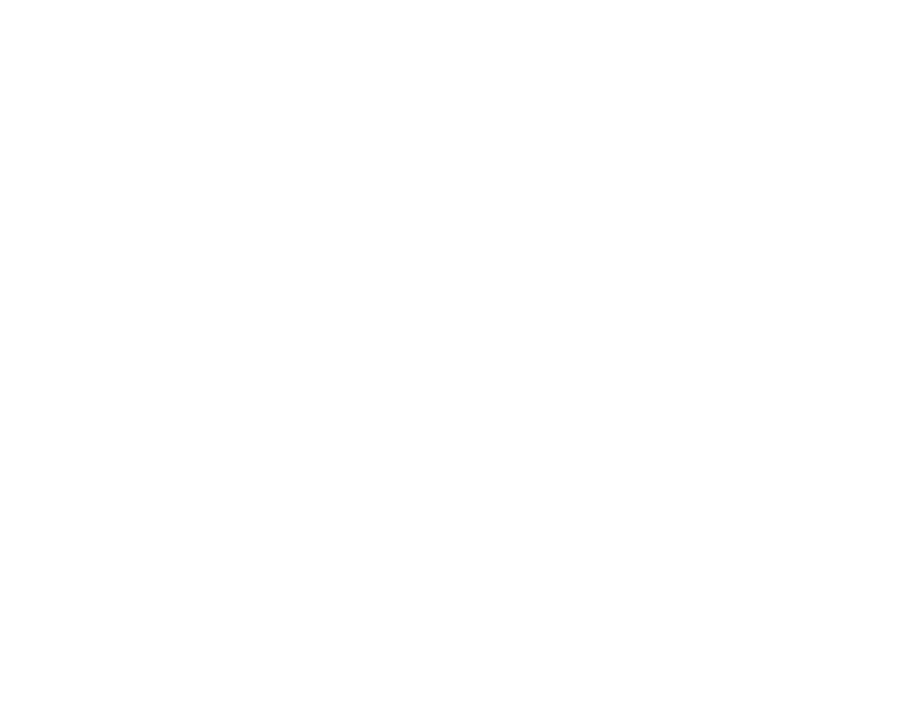

('weird', 2)
('---> azimuth: deviants', [7, 11, 120, 135, 176, 177, 179, 181, 187, 196])


<IPython.core.display.Javascript object>


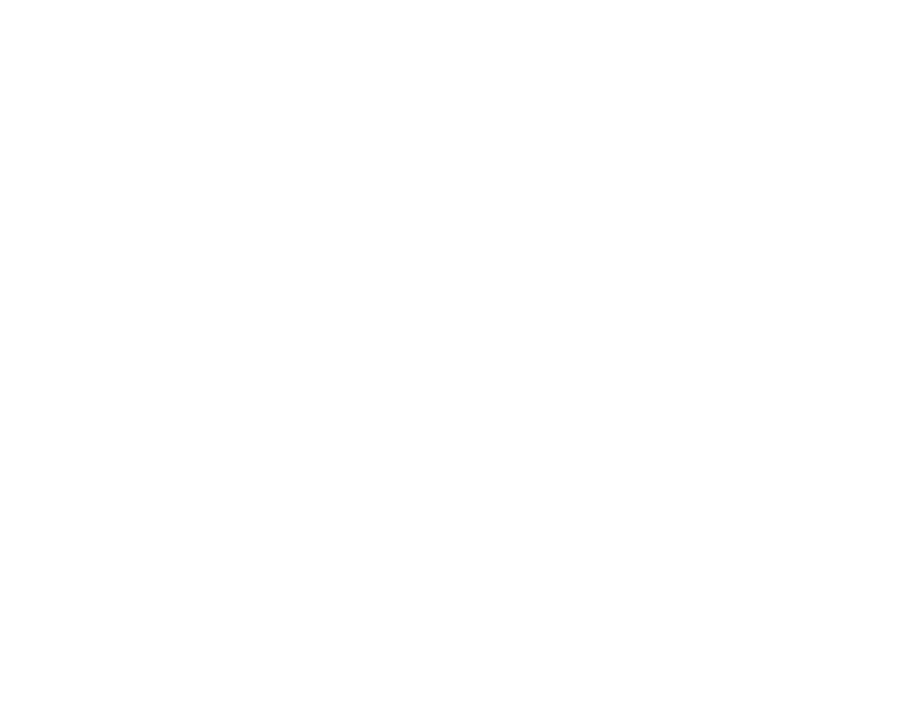

('weird', 2)
('---> elevation: deviants', [135, 179, 196])
--- saved roi info after evaluation.
... [JC080|20190602|FOV1_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
['/n/coxfs01/2p-data/JC080/20190602/FOV1_zoom2p0x/combined_rfs10_static']
... run: combined_rfs10_static
Saving stats output to: /n/coxfs01/2p-data/JC080/20190602/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.
... doing bootstrap analysis for param fits.
Multiple processes: 0.13sec
--- 0 results
... [JC089|20190522|FOV1_zoom2p0x] creating rfs object
... getting data paths - name: rfs
['/n/coxfs01/2p-data/JC089/20190522/FOV1_zoom2p0x/combined_rfs_static']
... run: combined_rfs_static
Saving stats output to: /n/coxfs01/2p-data/JC089/20190522/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


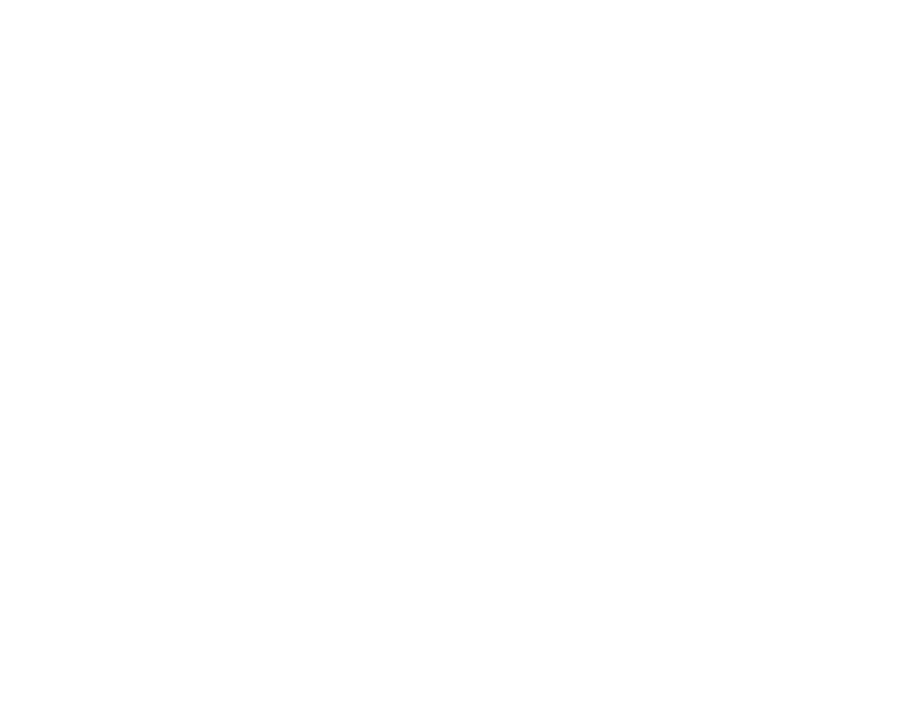

('weird', 1)
('---> azimuth: deviants', [])


<IPython.core.display.Javascript object>


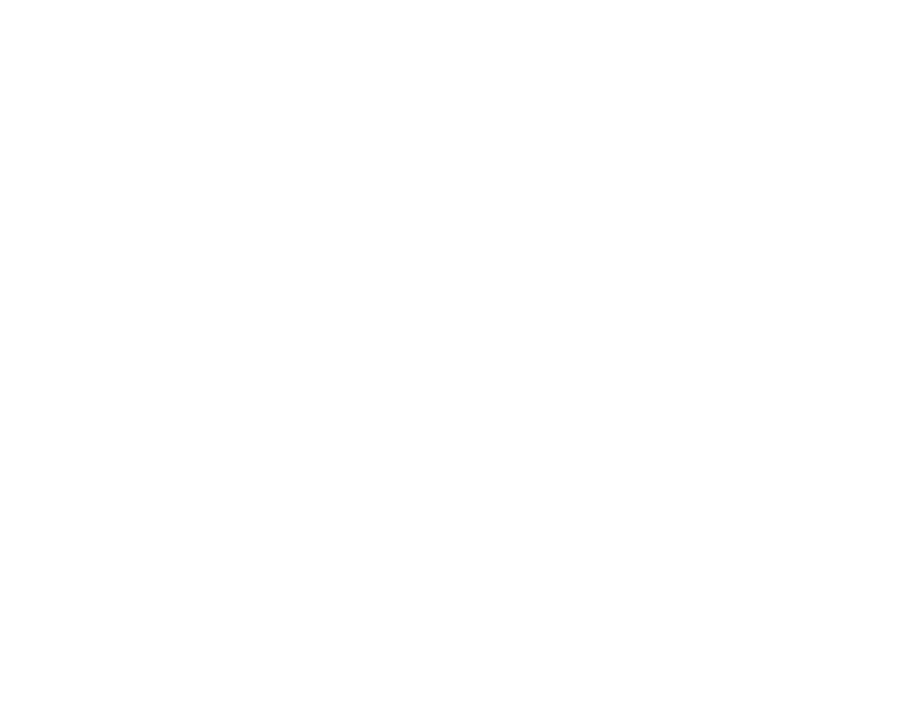

('weird', 1)
('---> elevation: deviants', [])
--- saved roi info after evaluation.
... [JC089|20190522|FOV1_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
['/n/coxfs01/2p-data/JC089/20190522/FOV1_zoom2p0x/combined_rfs10_static']
... run: combined_rfs10_static
Saving stats output to: /n/coxfs01/2p-data/JC089/20190522/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


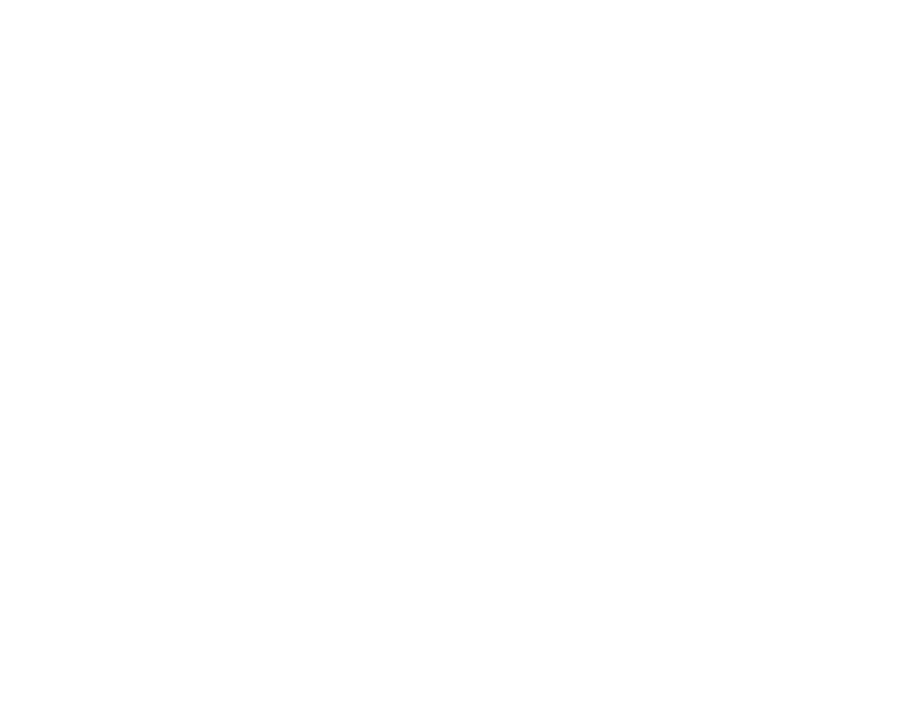

('weird', 7)
('---> azimuth: deviants', [99, 122])


<IPython.core.display.Javascript object>


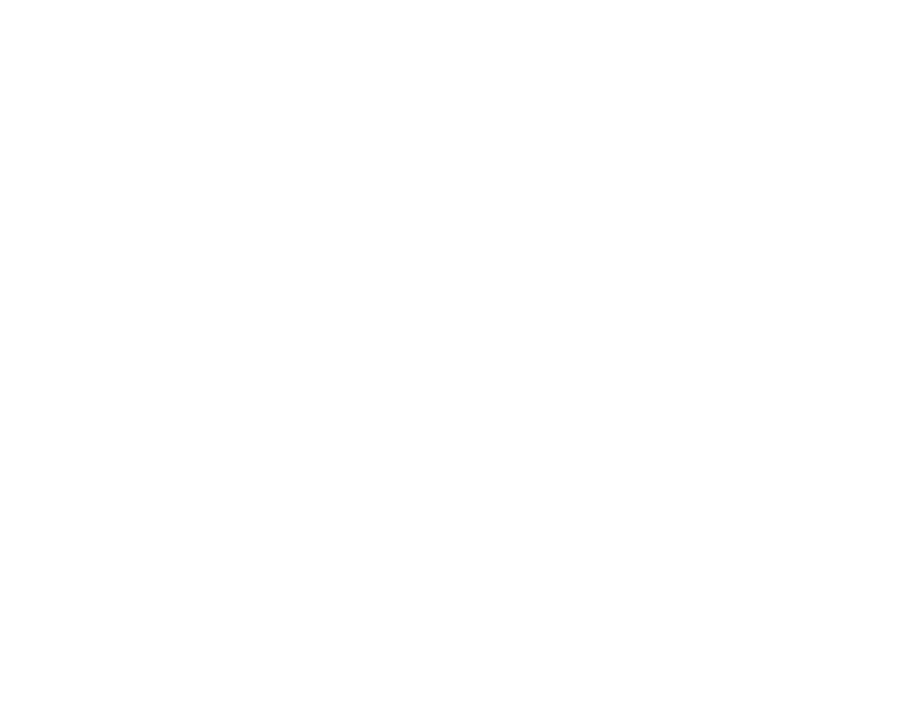

('weird', 7)
('---> elevation: deviants', [89])
--- saved roi info after evaluation.
... [JC090|20190605|FOV1_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
['/n/coxfs01/2p-data/JC090/20190605/FOV1_zoom2p0x/combined_rfs10_static']
... run: combined_rfs10_static
Saving stats output to: /n/coxfs01/2p-data/JC090/20190605/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


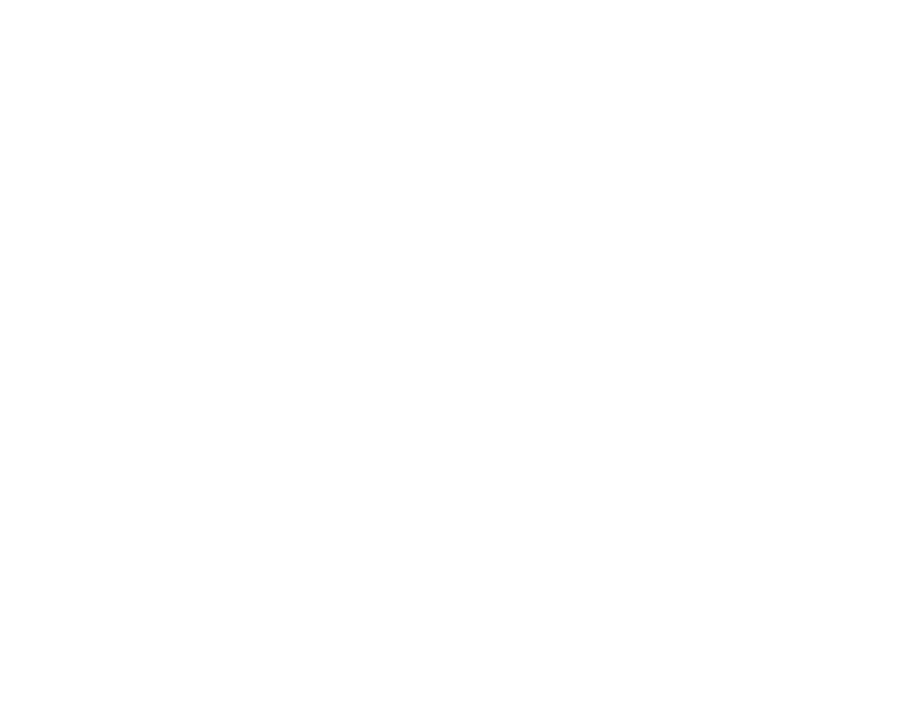

('weird', 10)
('---> azimuth: deviants', [])


<IPython.core.display.Javascript object>


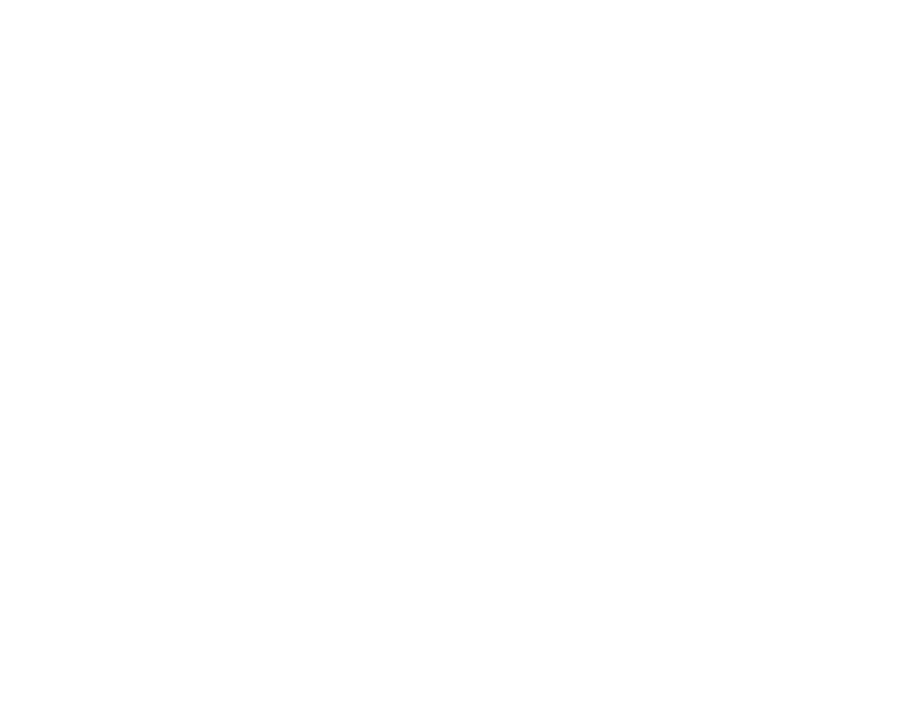

('weird', 10)
('---> elevation: deviants', [])
--- saved roi info after evaluation.
... [JC091|20190602|FOV1_zoom2p0x] creating rfs object
... getting data paths - name: rfs
['/n/coxfs01/2p-data/JC091/20190602/FOV1_zoom2p0x/combined_rfs_static']
... run: combined_rfs_static
Saving stats output to: /n/coxfs01/2p-data/JC091/20190602/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


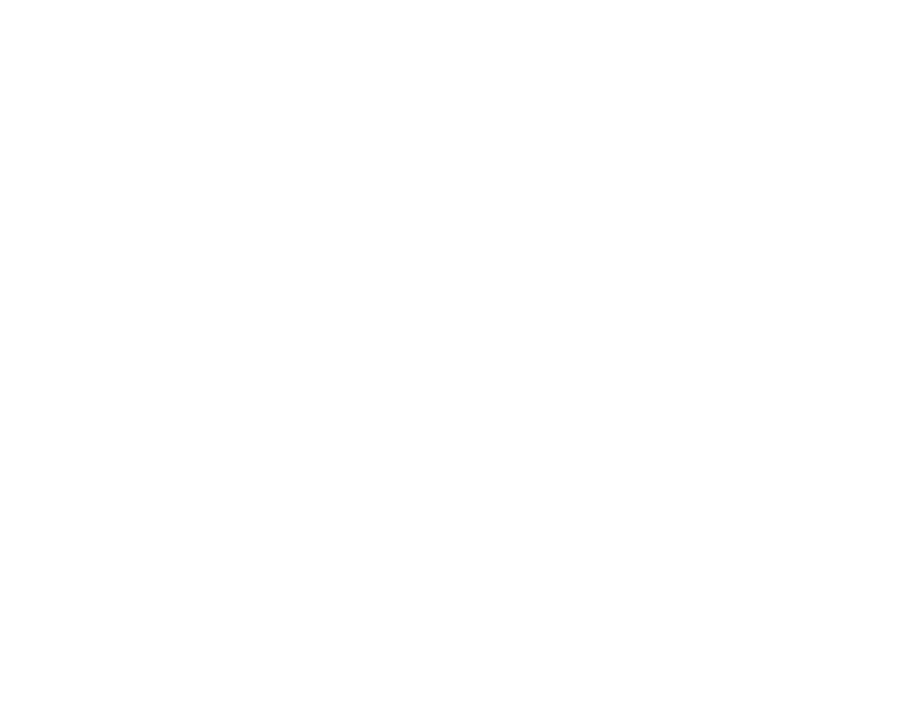

('weird', 6)
('---> azimuth: deviants', [24, 41, 42, 43, 47, 48, 51, 64, 84, 89, 91, 215, 228, 237, 296, 298, 306, 334])


<IPython.core.display.Javascript object>


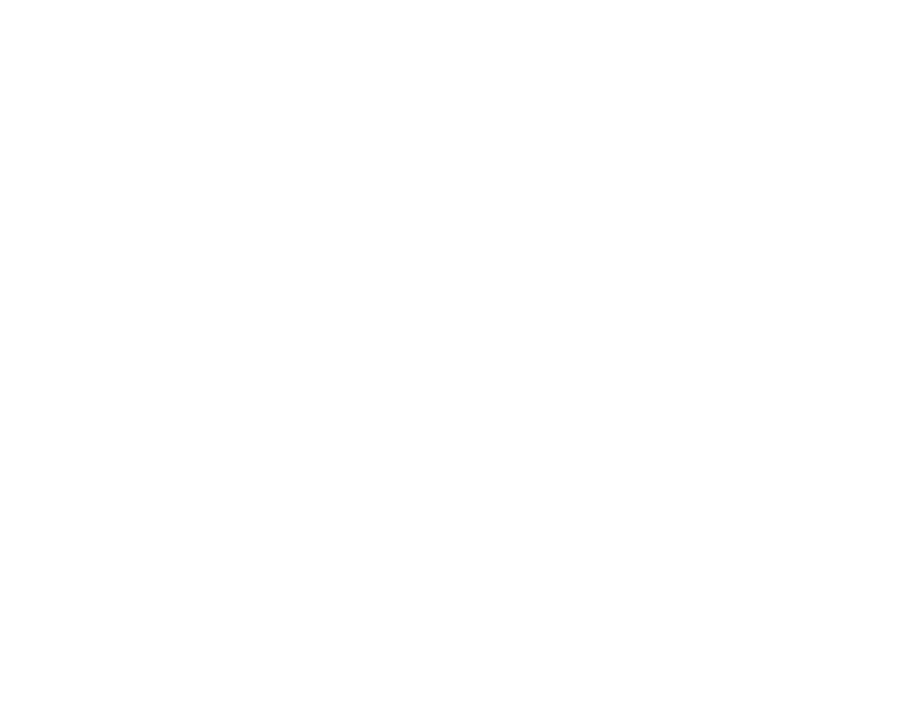

('weird', 6)
('---> elevation: deviants', [16, 33, 34, 37, 53, 58, 62, 64, 71, 75, 81, 85, 91, 215])
--- saved roi info after evaluation.
... [JC091|20190602|FOV1_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
['/n/coxfs01/2p-data/JC091/20190602/FOV1_zoom2p0x/combined_rfs10_static']
... run: combined_rfs10_static
Saving stats output to: /n/coxfs01/2p-data/JC091/20190602/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


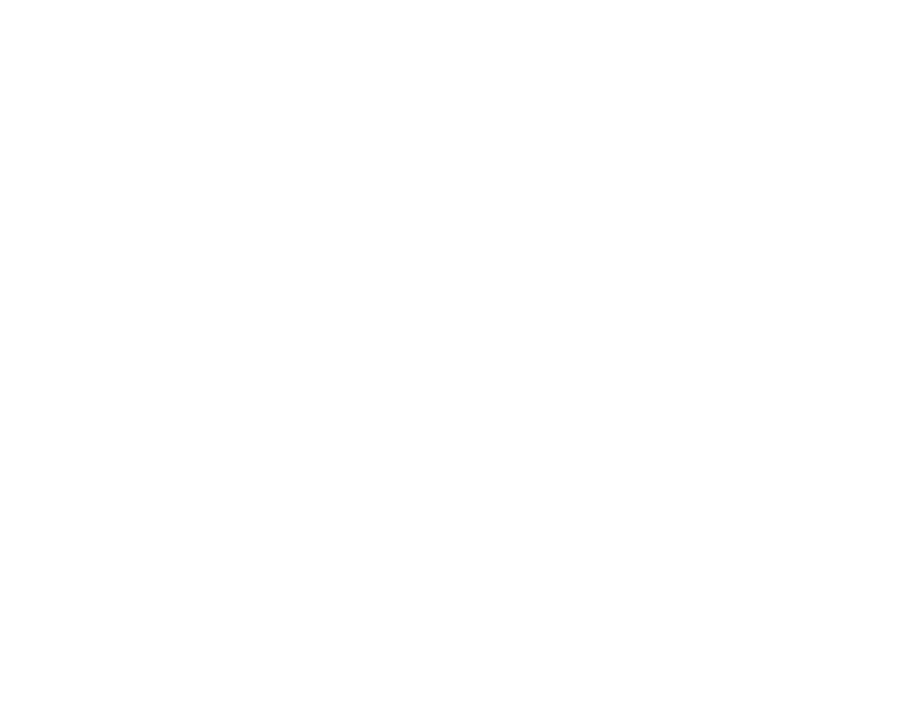

('weird', 27)
('---> azimuth: deviants', [41, 42, 43, 47, 50, 51, 53, 63, 64, 65, 71, 72, 91, 151, 168, 198, 199, 227, 228, 238, 243])


<IPython.core.display.Javascript object>


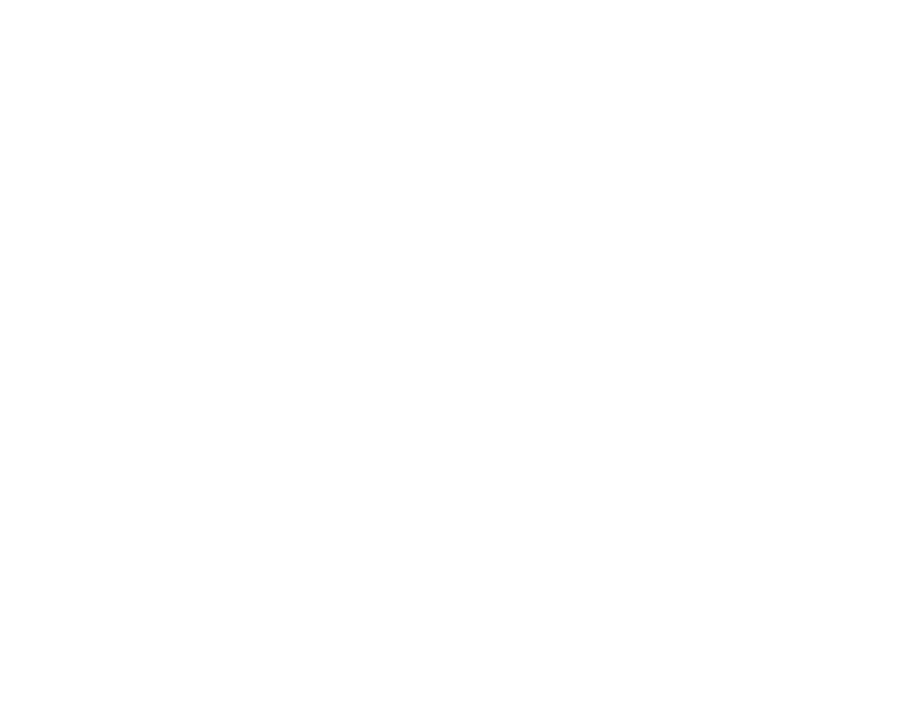

('weird', 27)
('---> elevation: deviants', [26, 38, 39, 41, 42, 43, 47, 51, 52, 62, 63, 64, 65, 68, 71, 72, 75, 81, 91, 151, 173, 227, 228, 238, 244, 275, 306, 313, 322, 346])
--- saved roi info after evaluation.
... [JC091|20190614|FOV1_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
['/n/coxfs01/2p-data/JC091/20190614/FOV1_zoom2p0x/combined_rfs10_static']
... run: combined_rfs10_static
Saving stats output to: /n/coxfs01/2p-data/JC091/20190614/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


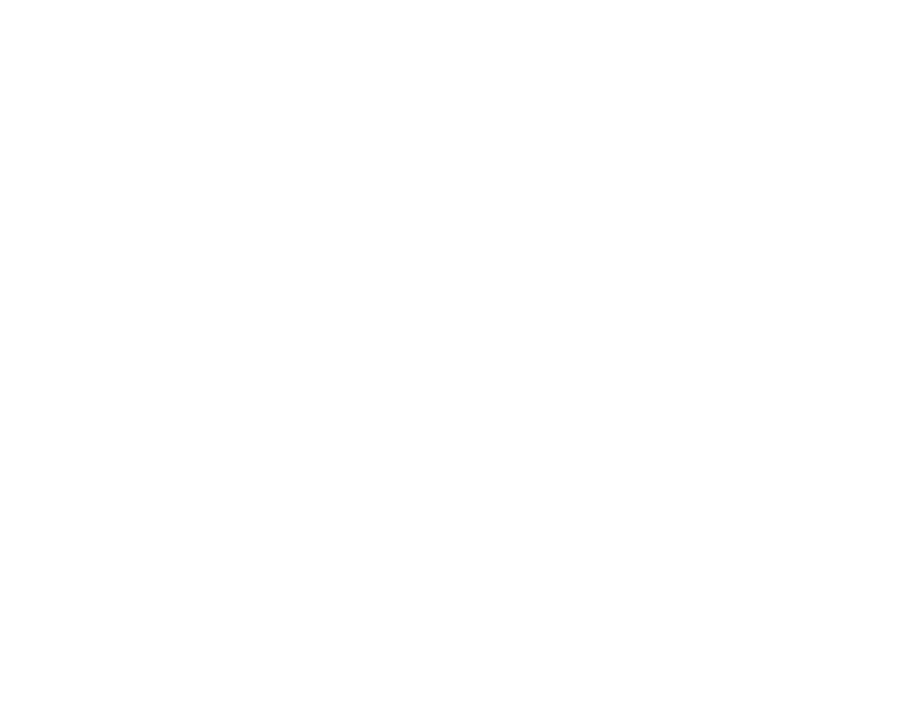

('weird', 46)
('---> azimuth: deviants', [25, 28, 46, 47, 55, 65, 147, 205, 211, 221, 227, 234, 242, 243, 251, 252, 256, 257, 264, 270, 274, 279, 305, 316, 317, 327, 333, 407, 413, 417, 419, 422, 447, 456, 523])


<IPython.core.display.Javascript object>


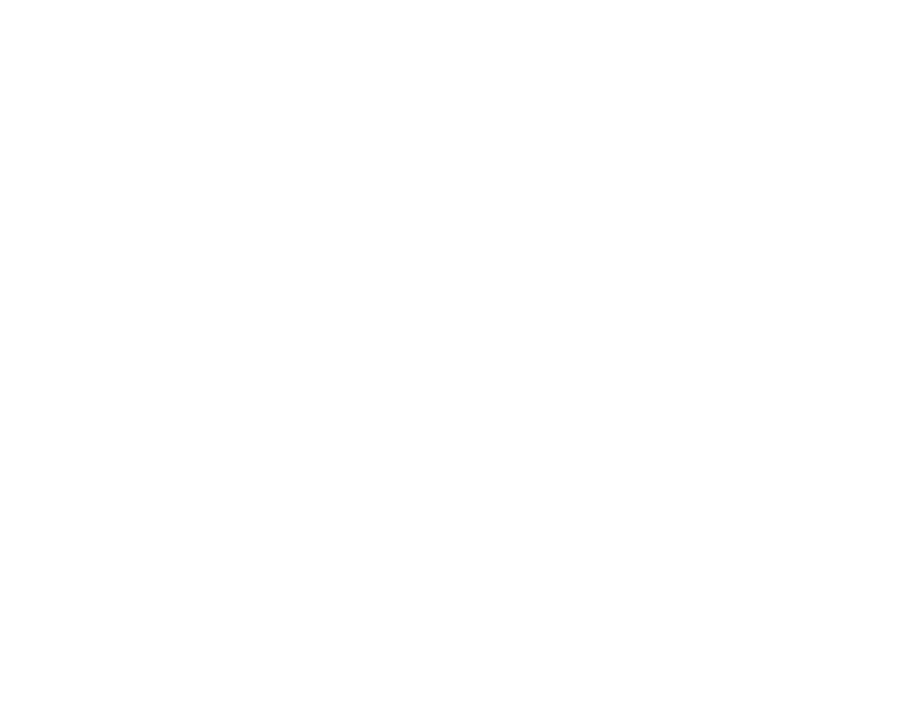

('weird', 46)
('---> elevation: deviants', [46, 47, 55, 65, 112, 135, 138, 147, 205, 211, 221, 227, 234, 242, 243, 252, 256, 270, 302, 305, 306, 307, 317, 331, 333, 378, 388, 407, 422, 523])
--- saved roi info after evaluation.
... [JC091|20191007|FOV1_zoom2p0x] creating rfs object
... getting data paths - name: rfs
['/n/coxfs01/2p-data/JC091/20191007/FOV1_zoom2p0x/combined_rfs_static']
... run: combined_rfs_static
Saving stats output to: /n/coxfs01/2p-data/JC091/20191007/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


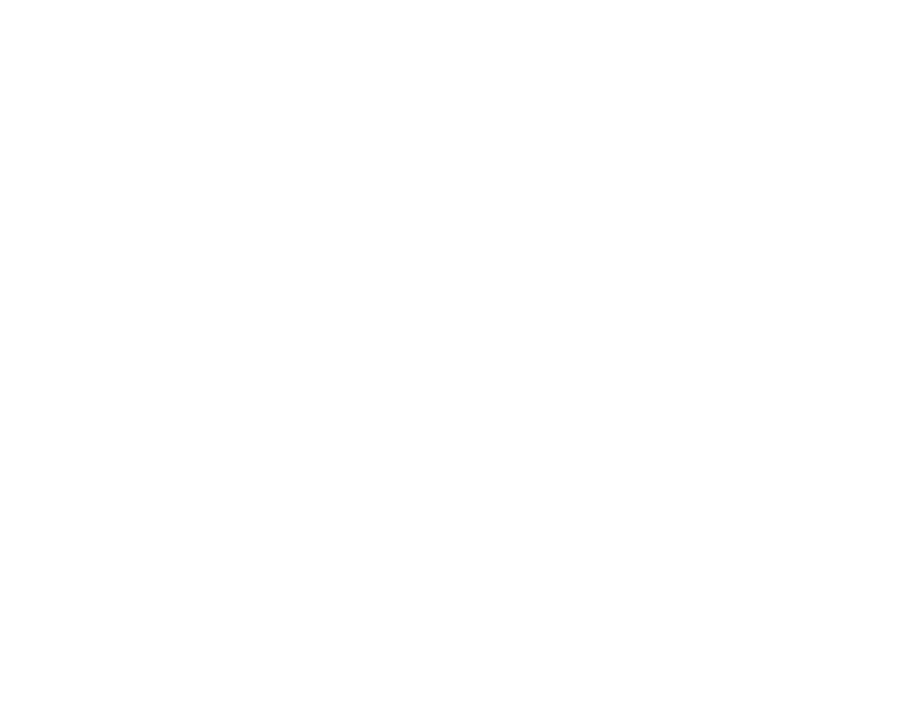

('weird', 2)
('---> azimuth: deviants', [17, 73, 80, 132, 336, 363, 365])


<IPython.core.display.Javascript object>


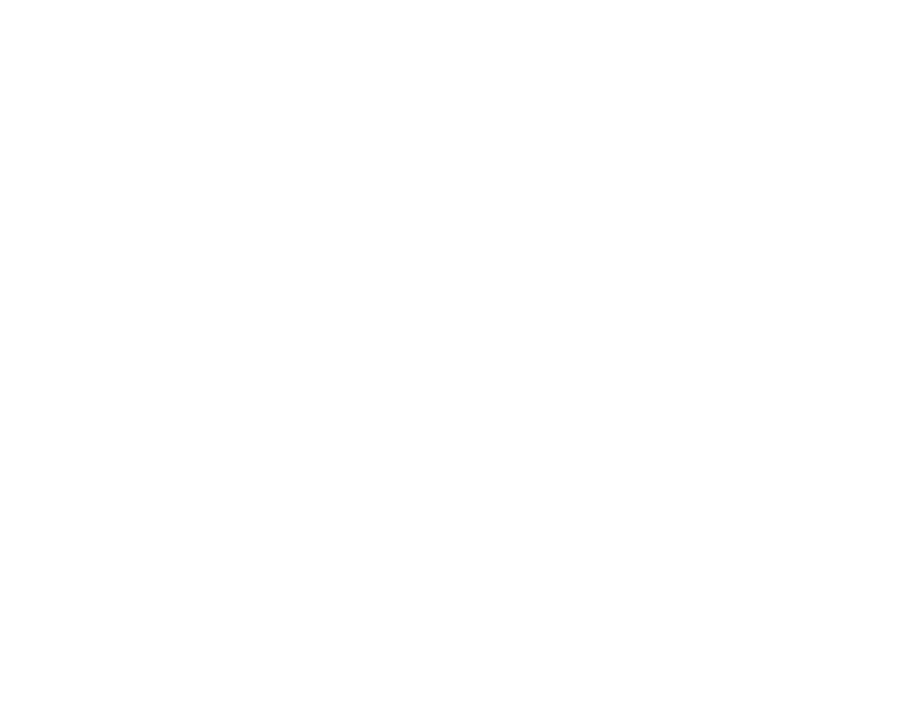

('weird', 2)
('---> elevation: deviants', [73, 88, 90, 93, 132, 244, 344, 363, 364])
--- saved roi info after evaluation.
... [JC091|20191007|FOV1_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
['/n/coxfs01/2p-data/JC091/20191007/FOV1_zoom2p0x/combined_rfs10_static']
... run: combined_rfs10_static
Saving stats output to: /n/coxfs01/2p-data/JC091/20191007/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


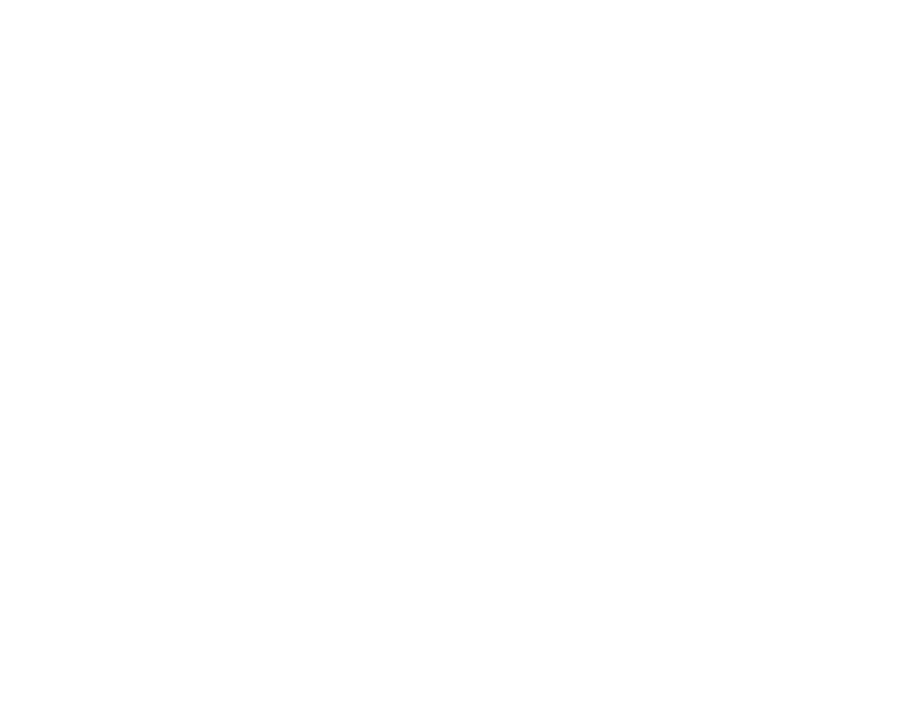

('weird', 5)
('---> azimuth: deviants', [5, 17, 77, 284, 369])


<IPython.core.display.Javascript object>


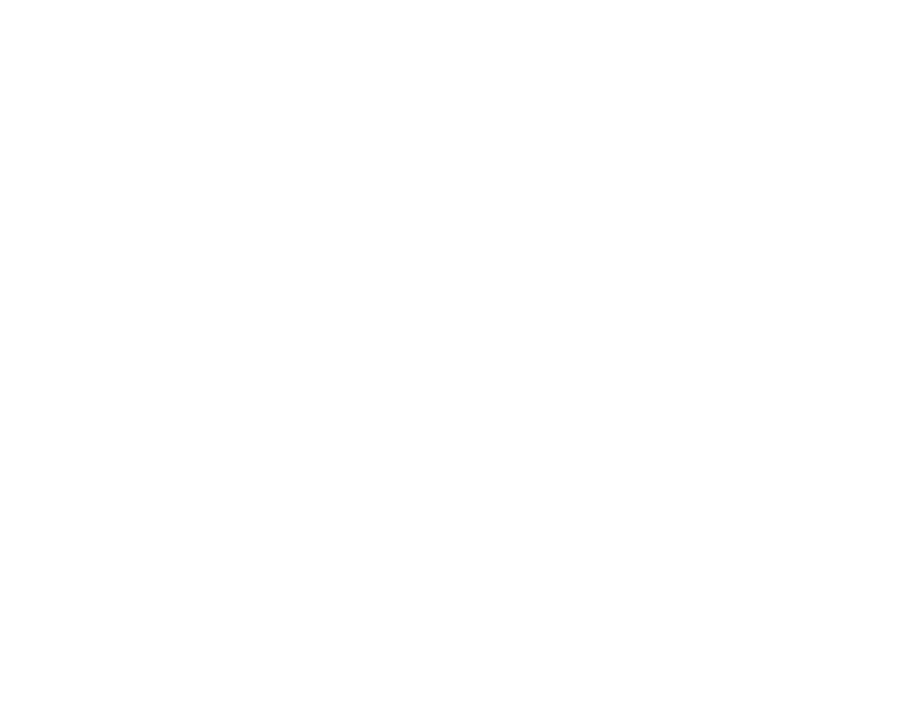

('weird', 5)
('---> elevation: deviants', [5, 62, 90, 132, 208, 233, 244, 363])
--- saved roi info after evaluation.
... [JC091|20191008|FOV1_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
['/n/coxfs01/2p-data/JC091/20191008/FOV1_zoom2p0x/combined_rfs10_static']
... run: combined_rfs10_static
Saving stats output to: /n/coxfs01/2p-data/JC091/20191008/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


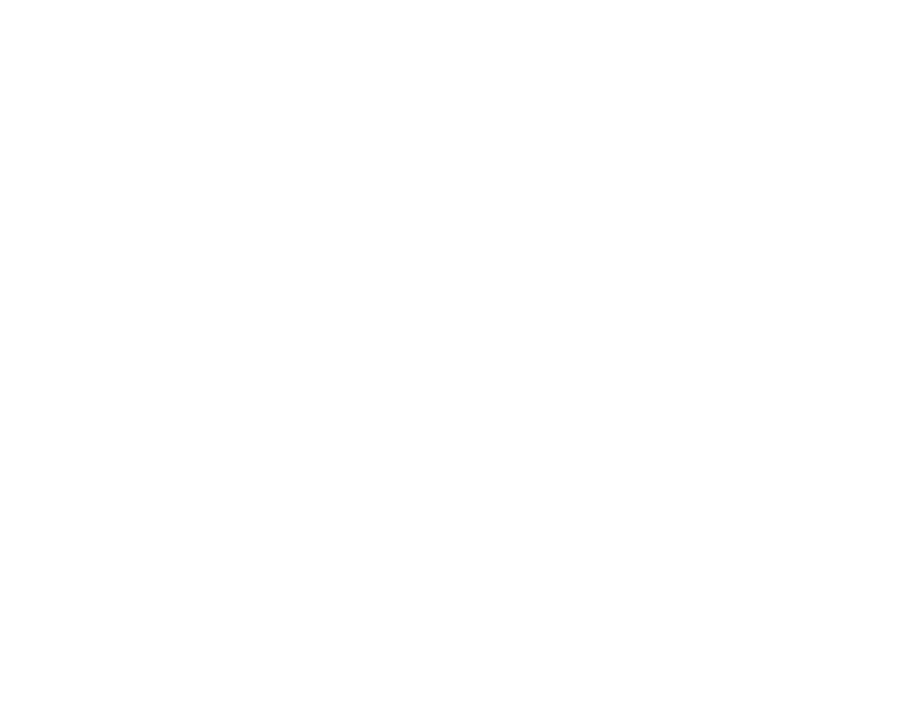

('weird', 33)
('---> azimuth: deviants', [])


<IPython.core.display.Javascript object>


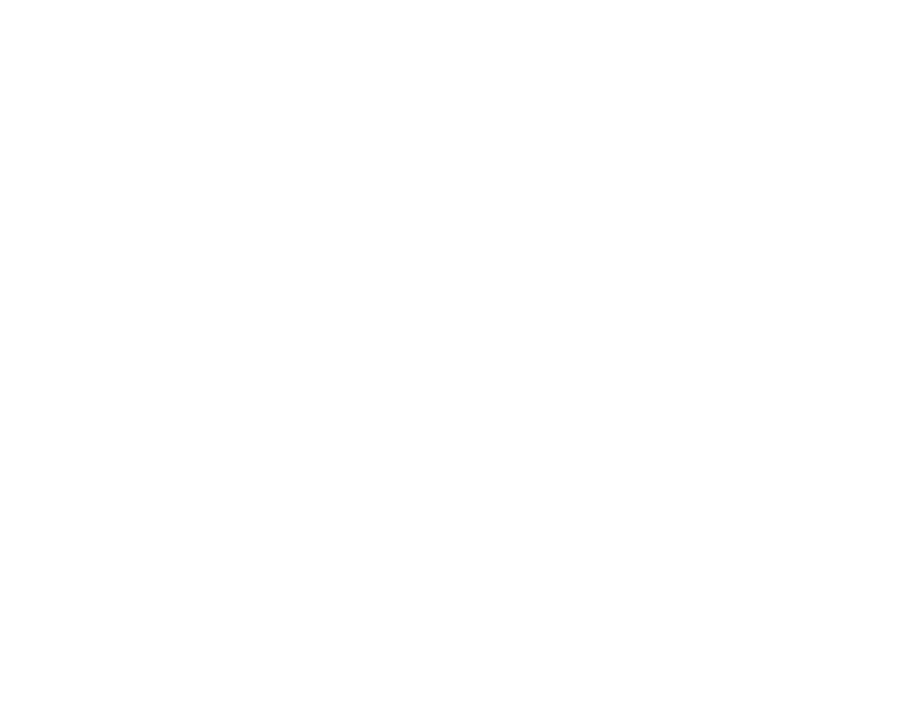

('weird', 33)
('---> elevation: deviants', [63, 213, 240])
--- saved roi info after evaluation.
... [JC092|20190527|FOV2_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
['/n/coxfs01/2p-data/JC092/20190527/FOV2_zoom2p0x/combined_rfs10_static']
... run: combined_rfs10_static
Saving stats output to: /n/coxfs01/2p-data/JC092/20190527/FOV2_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


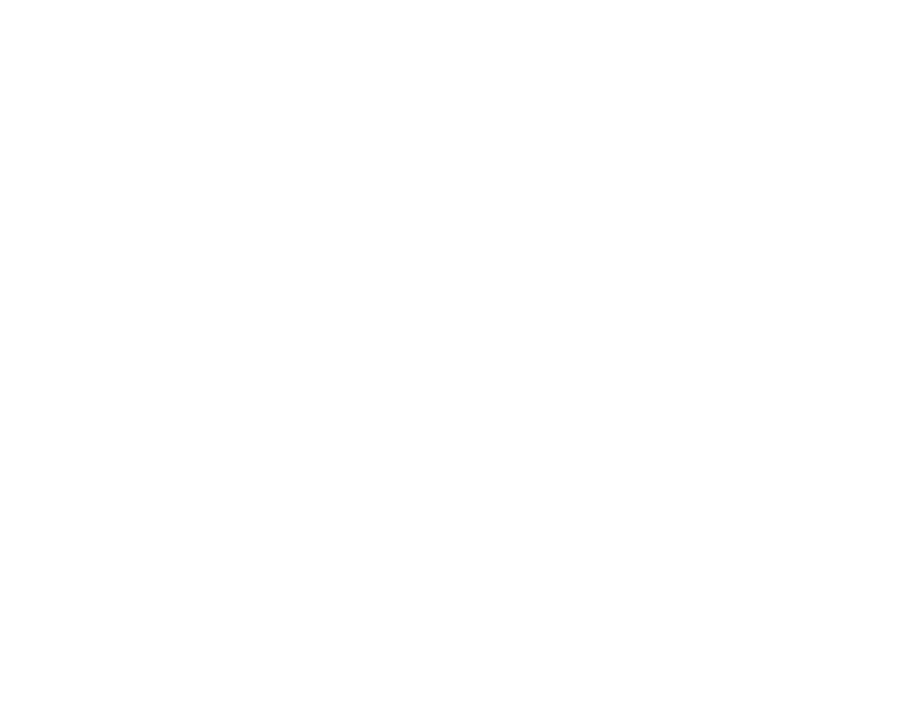

('weird', 14)
('---> azimuth: deviants', [126])


<IPython.core.display.Javascript object>


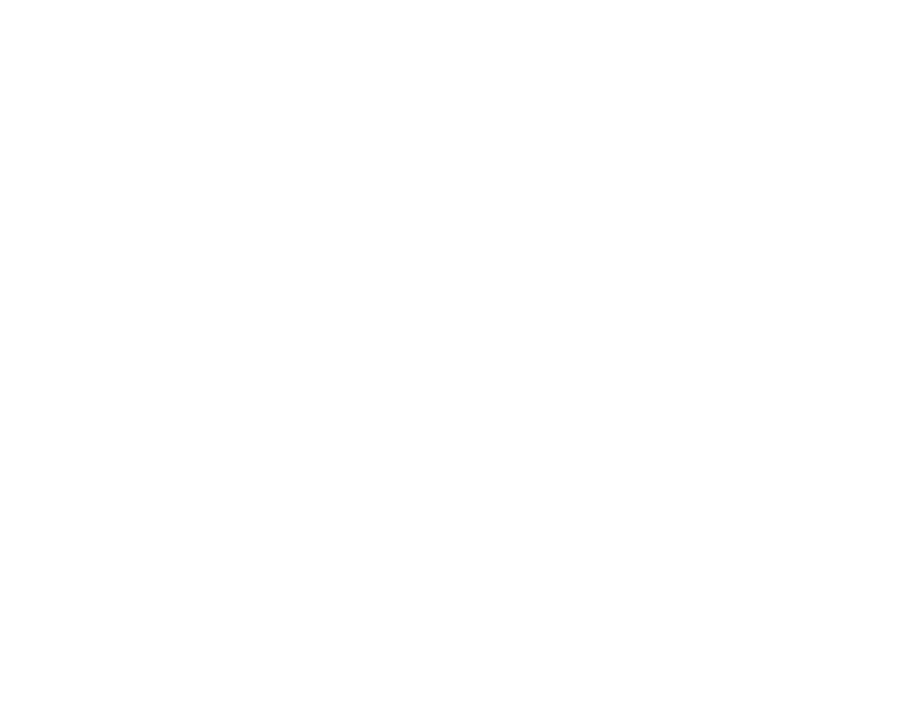

('weird', 14)
('---> elevation: deviants', [])
--- saved roi info after evaluation.
... [JC092|20190527|FOV3_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
['/n/coxfs01/2p-data/JC092/20190527/FOV3_zoom2p0x/combined_rfs10_static']
... run: combined_rfs10_static
Saving stats output to: /n/coxfs01/2p-data/JC092/20190527/FOV3_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


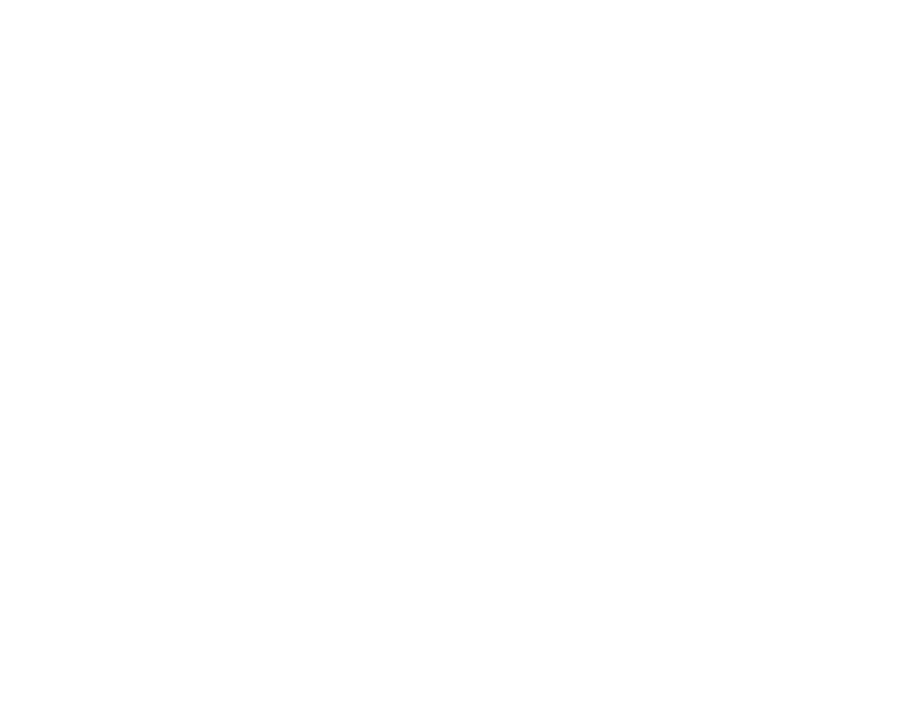

('weird', 24)
('---> azimuth: deviants', [110, 120, 126])


<IPython.core.display.Javascript object>


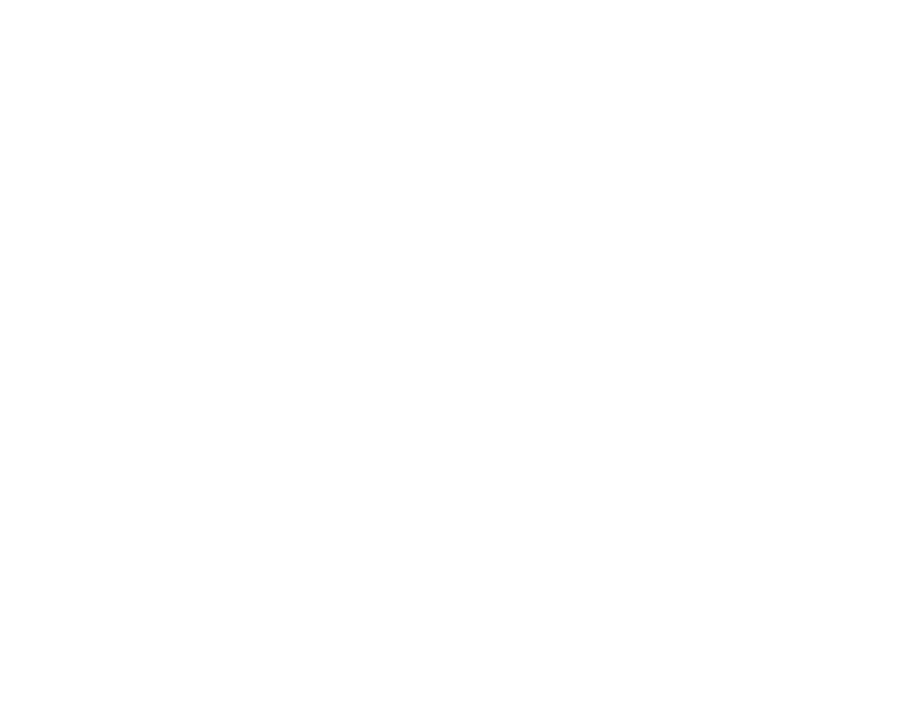

('weird', 24)
('---> elevation: deviants', [25])
--- saved roi info after evaluation.
... [JC092|20190528|FOV1_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
['/n/coxfs01/2p-data/JC092/20190528/FOV1_zoom2p0x/combined_rfs10_static']
... run: combined_rfs10_static
Saving stats output to: /n/coxfs01/2p-data/JC092/20190528/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


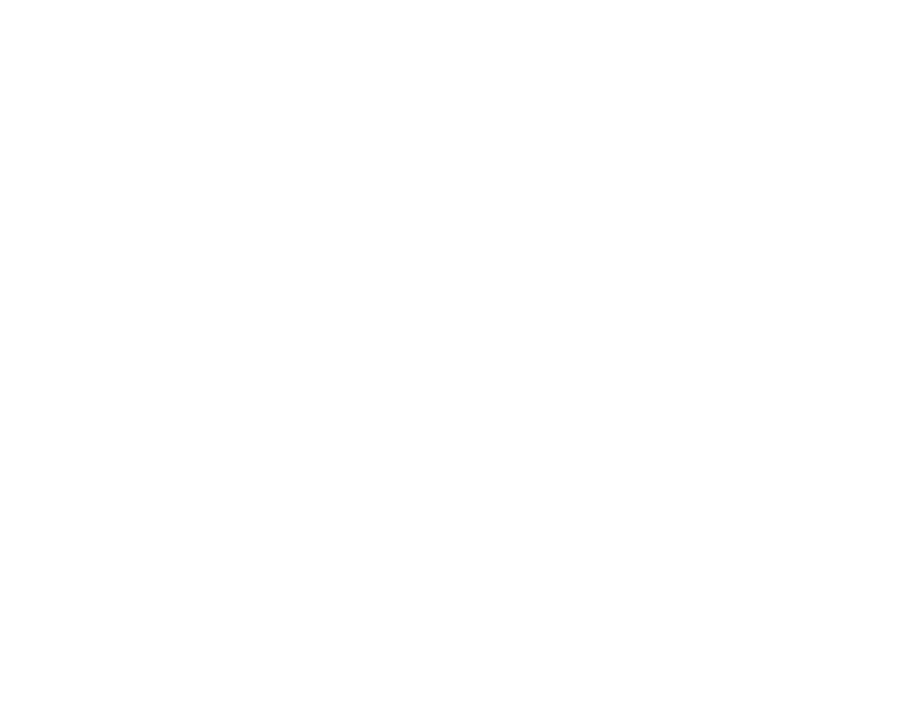

('weird', 3)
('---> azimuth: deviants', [])


<IPython.core.display.Javascript object>


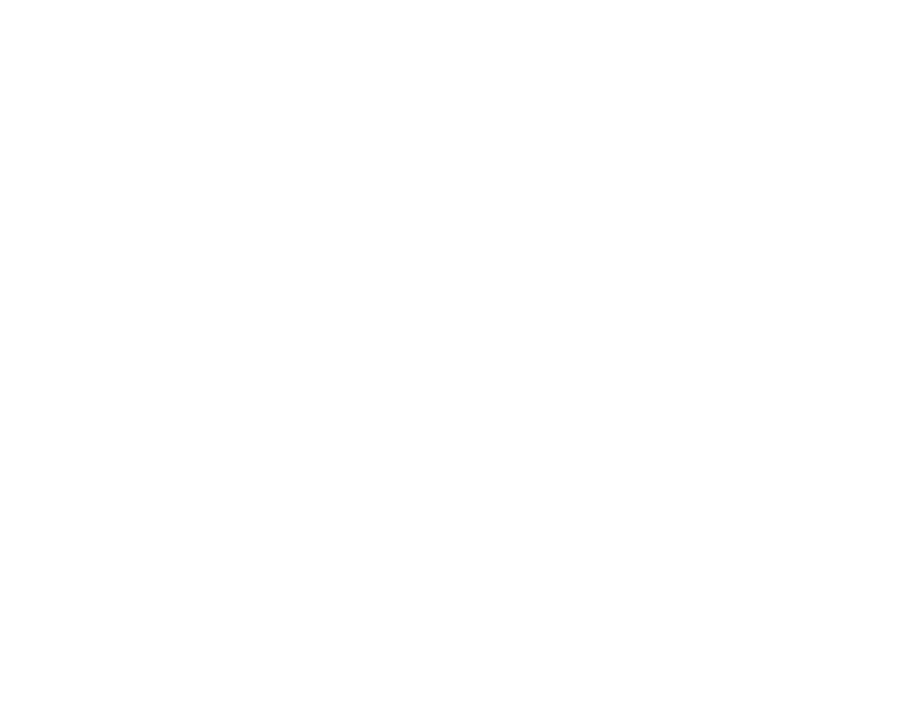

('weird', 3)
('---> elevation: deviants', [])
--- saved roi info after evaluation.
... [JC099|20190612|FOV1_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
['/n/coxfs01/2p-data/JC099/20190612/FOV1_zoom2p0x/combined_rfs10_static']
... run: combined_rfs10_static
Saving stats output to: /n/coxfs01/2p-data/JC099/20190612/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


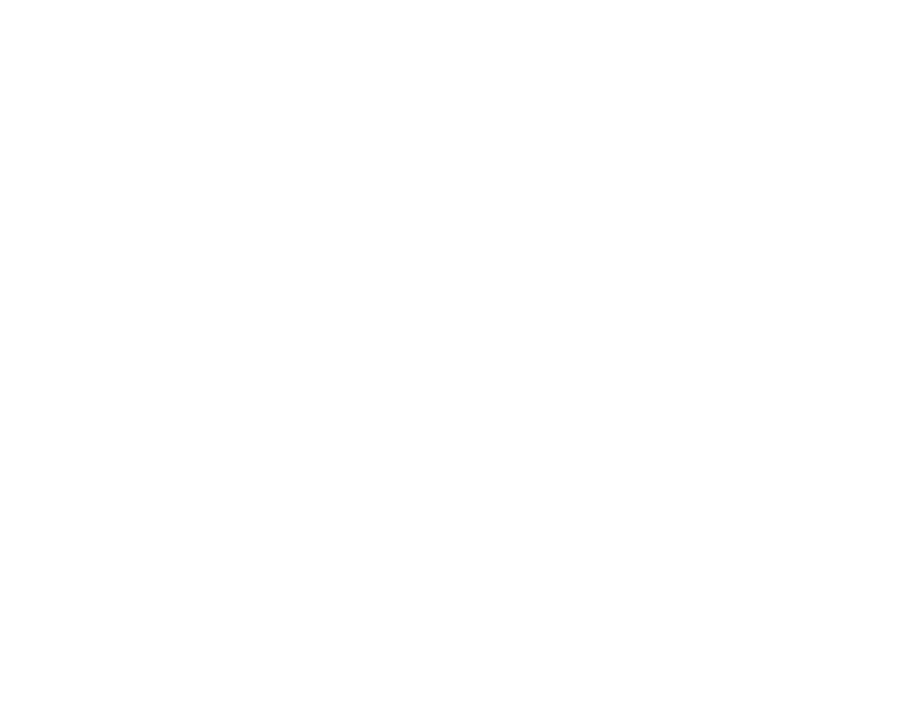

('weird', 23)
('---> azimuth: deviants', [76, 91, 102, 108, 109, 126, 183, 218, 219, 225, 243])


<IPython.core.display.Javascript object>


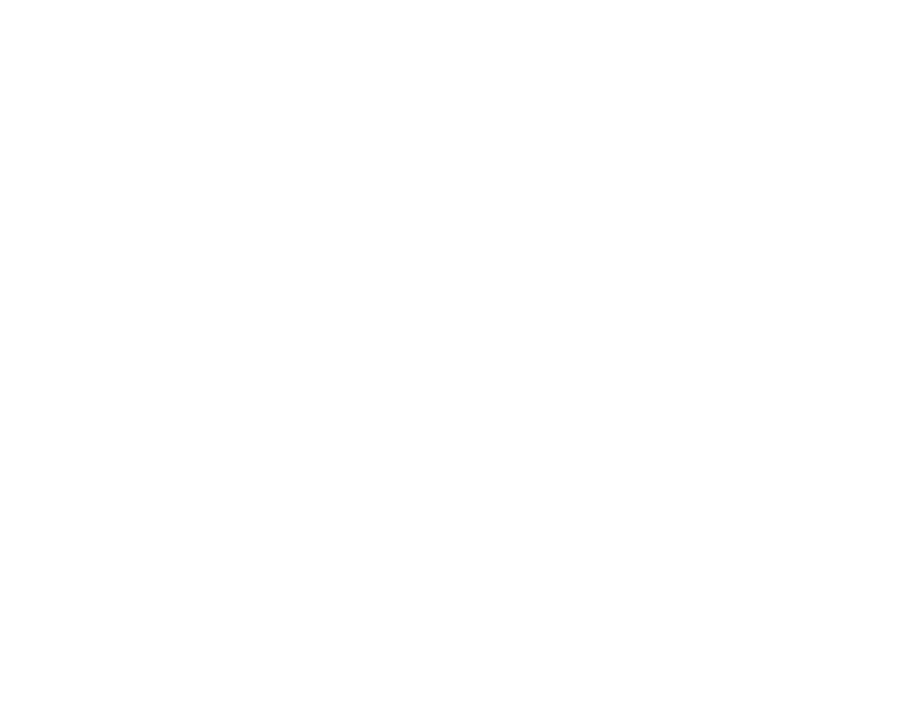

('weird', 23)
('---> elevation: deviants', [56, 81, 85, 115, 132, 135, 138, 212, 217, 219, 243])
--- saved roi info after evaluation.
... [JC099|20190617|FOV1_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
['/n/coxfs01/2p-data/JC099/20190617/FOV1_zoom2p0x/combined_rfs10_static']
... run: combined_rfs10_static
Saving stats output to: /n/coxfs01/2p-data/JC099/20190617/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


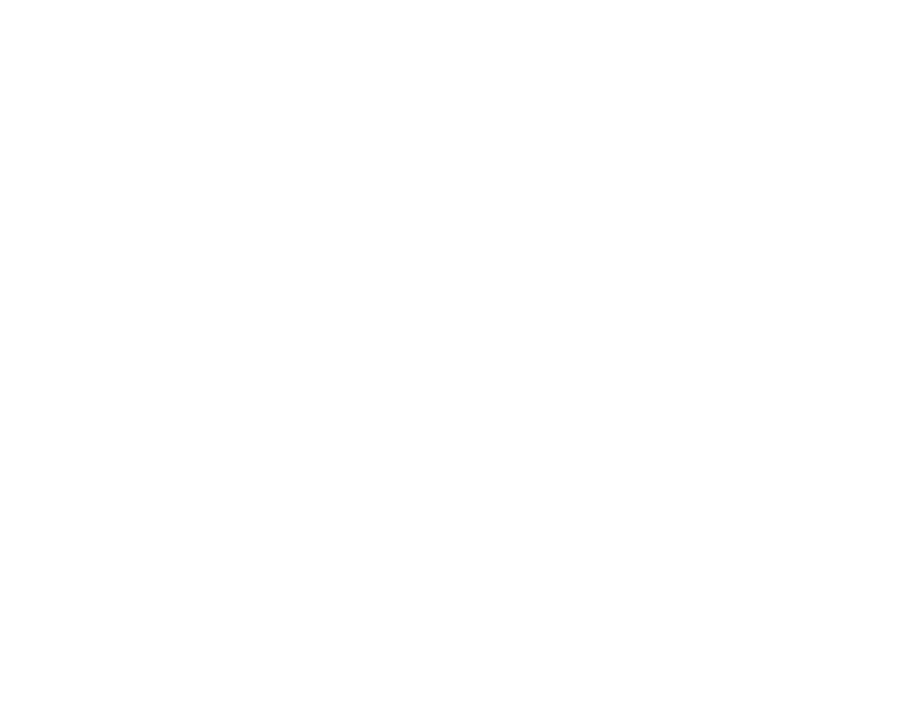

('weird', 10)
('---> azimuth: deviants', [39, 43, 49, 69])


<IPython.core.display.Javascript object>


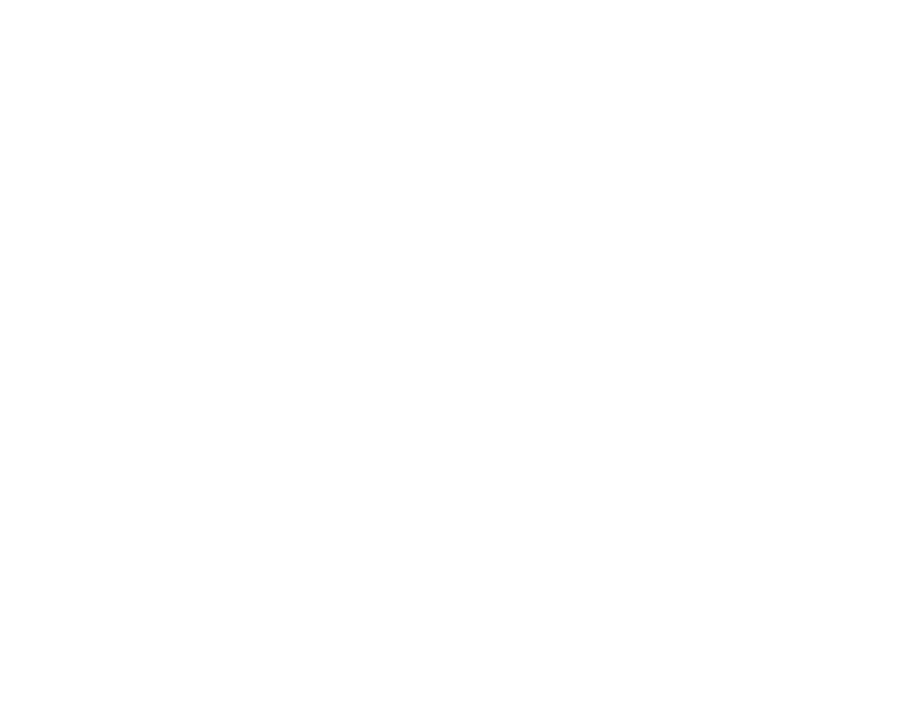

('weird', 10)
('---> elevation: deviants', [33, 48, 69])
--- saved roi info after evaluation.
... [JC111|20191003|FOV1_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
['/n/coxfs01/2p-data/JC111/20191003/FOV1_zoom2p0x/combined_rfs10_static']
... run: combined_rfs10_static
Saving stats output to: /n/coxfs01/2p-data/JC111/20191003/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


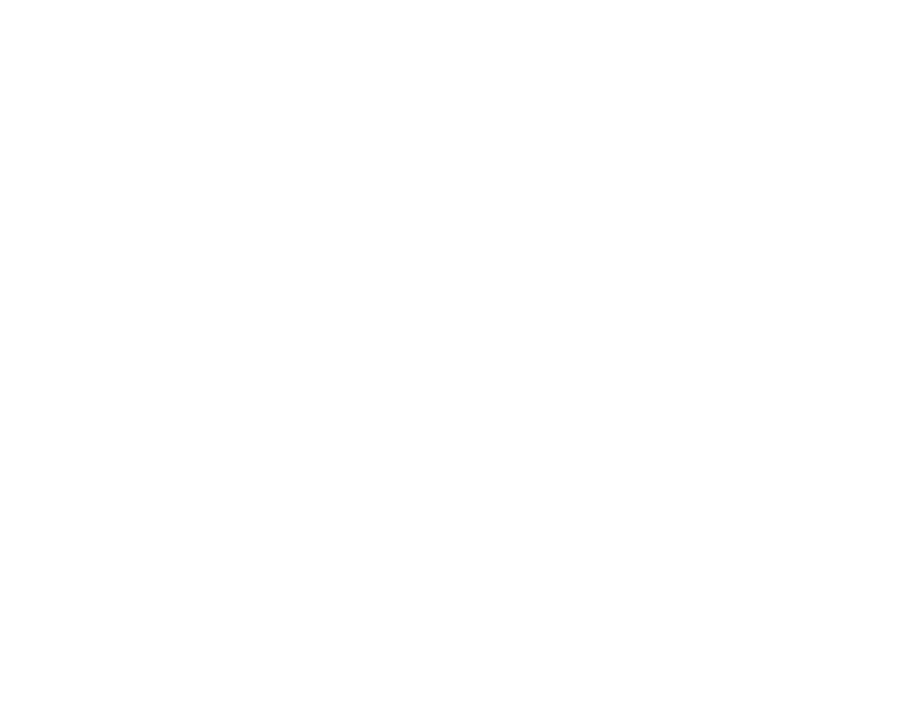

('weird', 9)
('---> azimuth: deviants', [])


<IPython.core.display.Javascript object>


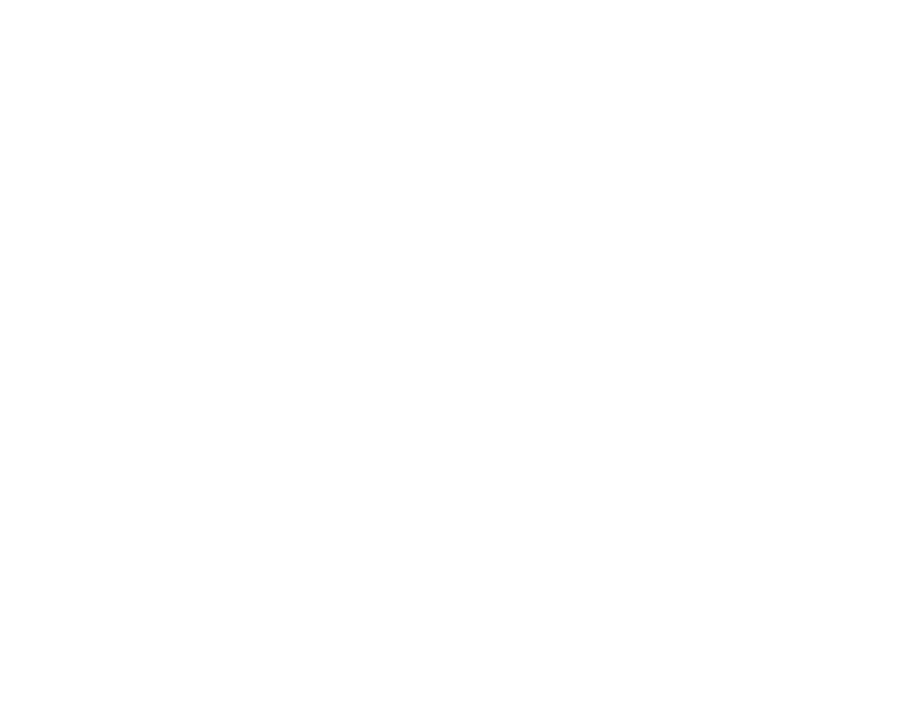

('weird', 9)
('---> elevation: deviants', [])
--- saved roi info after evaluation.
... [JC113|20191012|FOV1_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
['/n/coxfs01/2p-data/JC113/20191012/FOV1_zoom2p0x/combined_rfs10_static']
... run: combined_rfs10_static
Saving stats output to: /n/coxfs01/2p-data/JC113/20191012/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


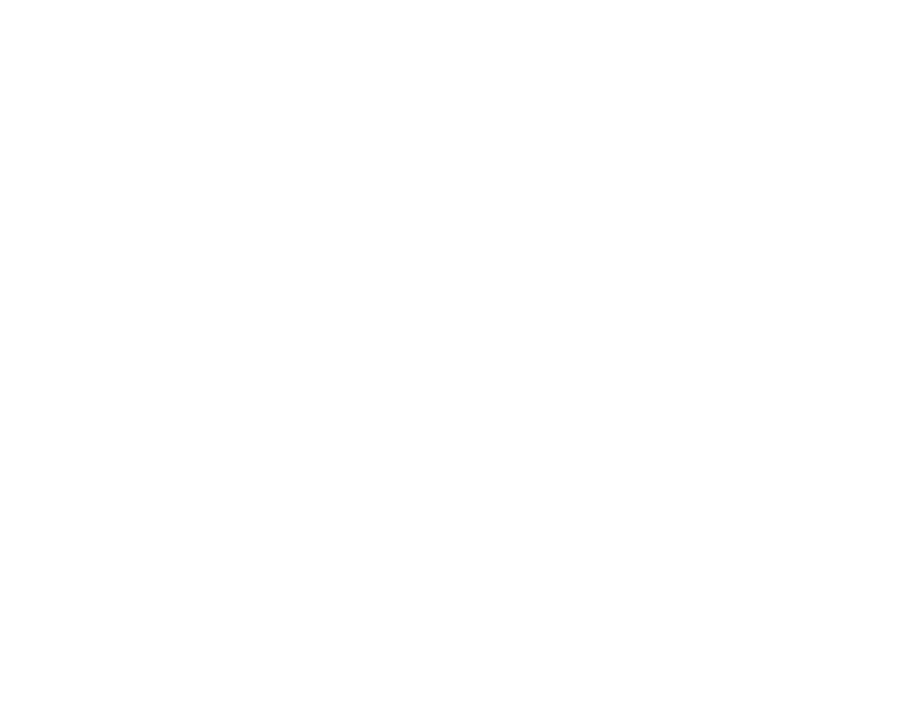

('weird', 2)


<IPython.core.display.Javascript object>


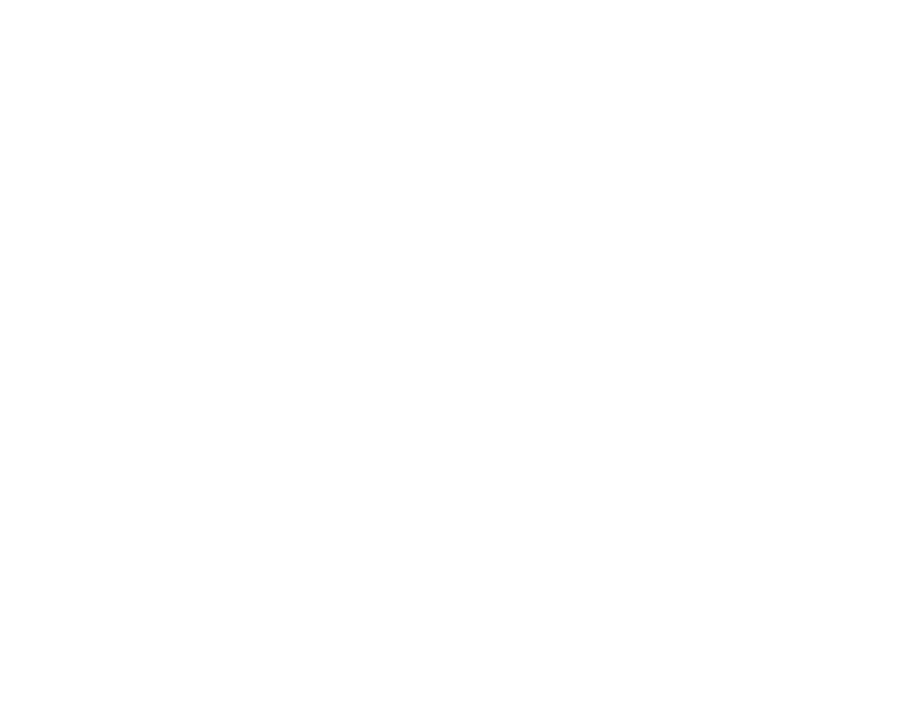

('weird', 2)
--- saved roi info after evaluation.
... [JC113|20191012|FOV2_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
['/n/coxfs01/2p-data/JC113/20191012/FOV2_zoom2p0x/combined_rfs10_static']
... run: combined_rfs10_static
Saving stats output to: /n/coxfs01/2p-data/JC113/20191012/FOV2_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


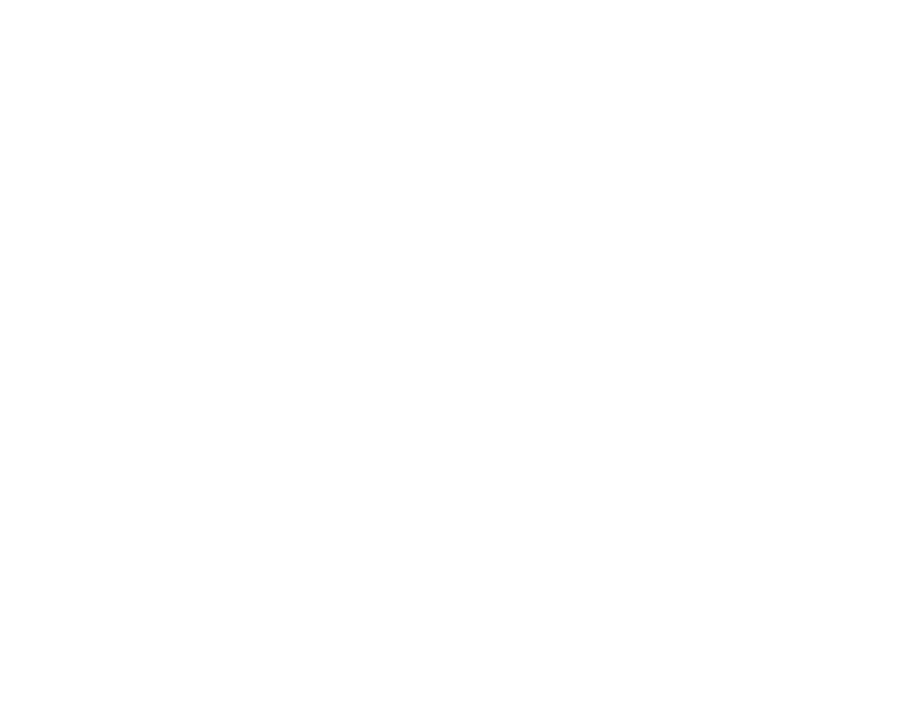

('weird', 11)
('---> azimuth: deviants', [3, 45, 47])


<IPython.core.display.Javascript object>


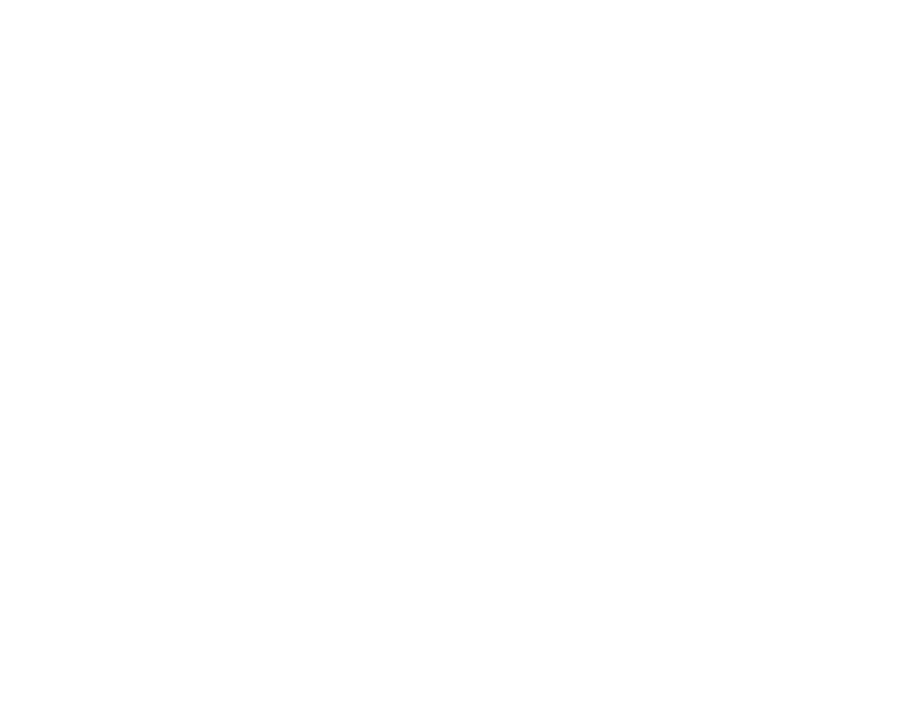

('weird', 11)
('---> elevation: deviants', [11, 14])
--- saved roi info after evaluation.
... [JC113|20191017|FOV1_zoom2p0x] creating rfs object
... getting data paths - name: rfs
['/n/coxfs01/2p-data/JC113/20191017/FOV1_zoom2p0x/combined_rfs_static']
... run: combined_rfs_static
Saving stats output to: /n/coxfs01/2p-data/JC113/20191017/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


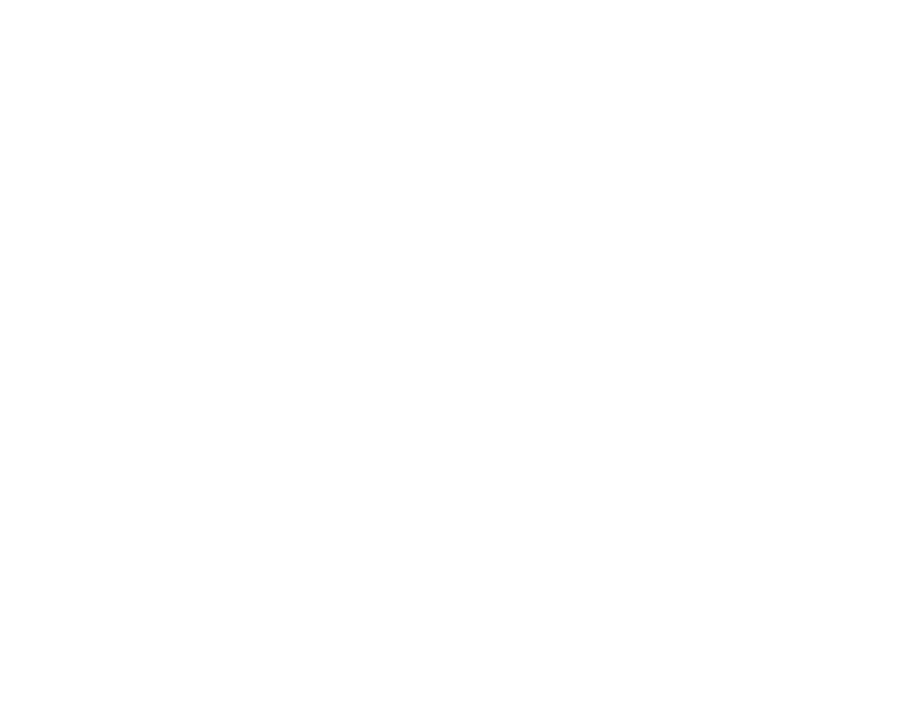

('weird', 0)
('---> azimuth: deviants', [9, 91, 102, 248])


<IPython.core.display.Javascript object>


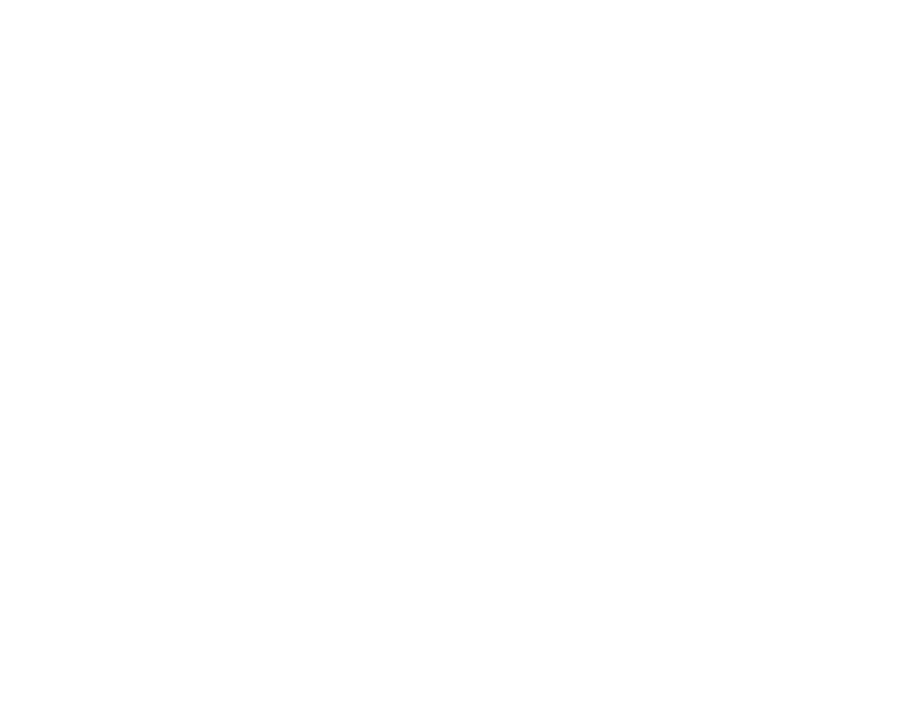

('weird', 0)
('---> elevation: deviants', [128, 309])
--- saved roi info after evaluation.
... [JC113|20191017|FOV1_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
['/n/coxfs01/2p-data/JC113/20191017/FOV1_zoom2p0x/combined_rfs10_static']
... run: combined_rfs10_static
Saving stats output to: /n/coxfs01/2p-data/JC113/20191017/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


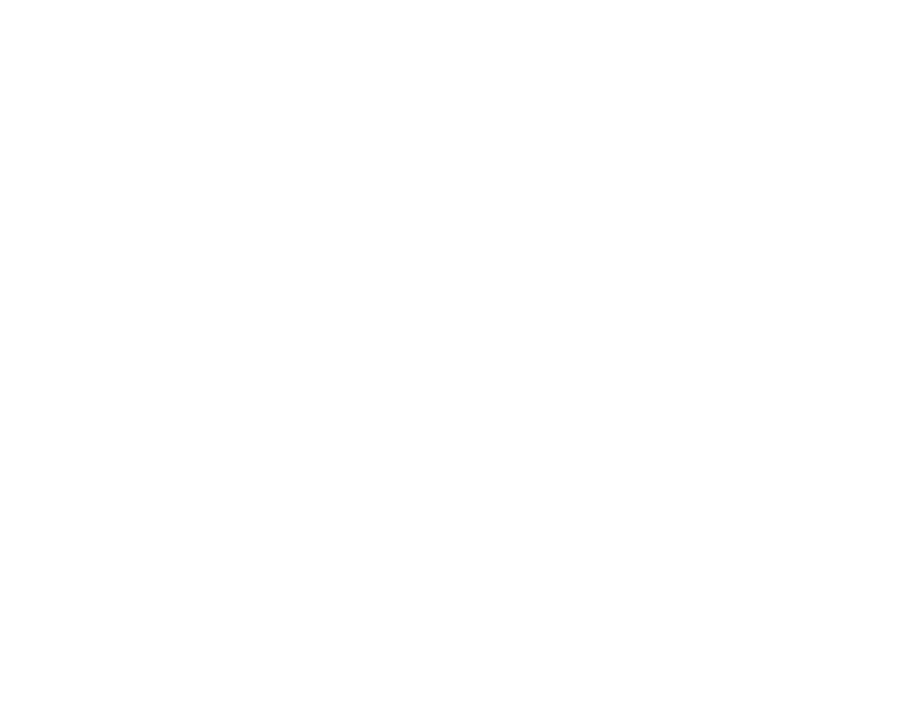

('weird', 30)
('---> azimuth: deviants', [])


<IPython.core.display.Javascript object>


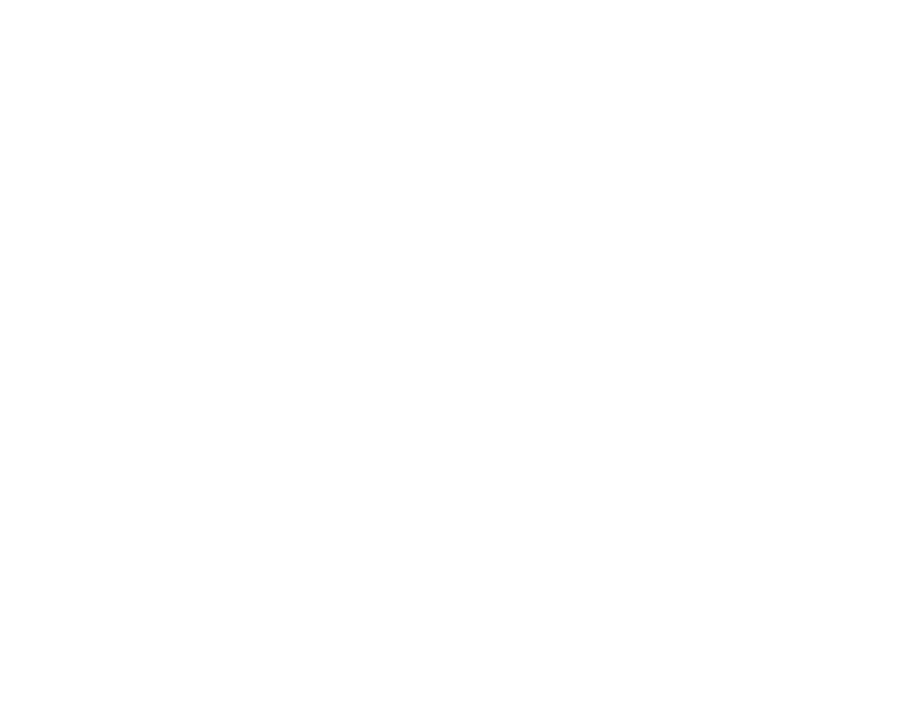

('weird', 30)
('---> elevation: deviants', [])
--- saved roi info after evaluation.
... [JC113|20191018|FOV1_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
['/n/coxfs01/2p-data/JC113/20191018/FOV1_zoom2p0x/combined_rfs10_static']
... run: combined_rfs10_static
Saving stats output to: /n/coxfs01/2p-data/JC113/20191018/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


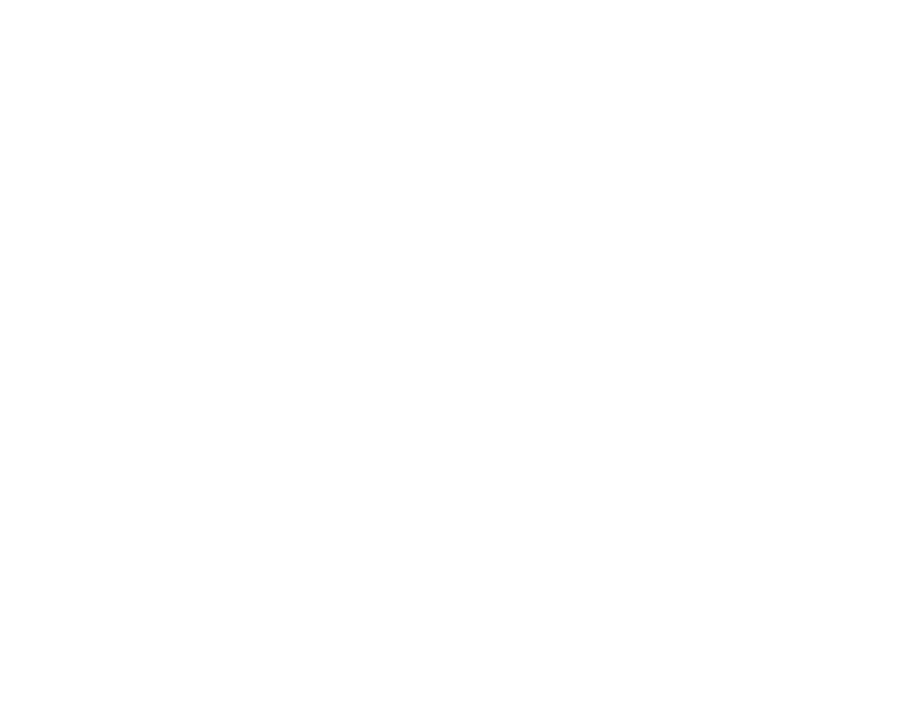

('weird', 10)
('---> azimuth: deviants', [46, 59, 102, 117, 164])


<IPython.core.display.Javascript object>


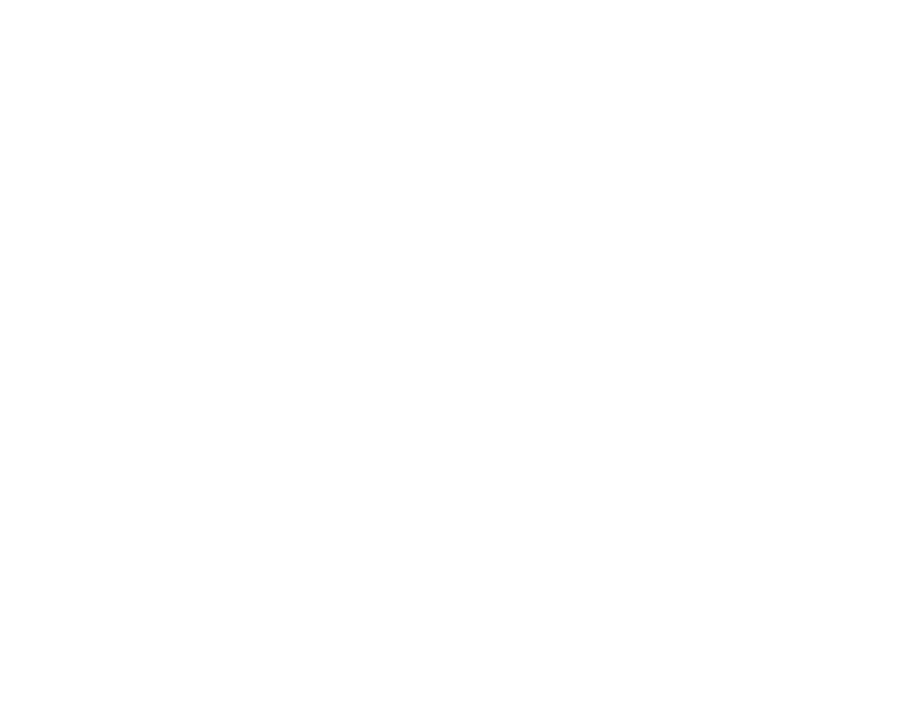

('weird', 10)
('---> elevation: deviants', [102])
--- saved roi info after evaluation.
... [JC117|20191104|FOV1_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
['/n/coxfs01/2p-data/JC117/20191104/FOV1_zoom2p0x/combined_rfs10_static']
... run: combined_rfs10_static
Saving stats output to: /n/coxfs01/2p-data/JC117/20191104/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


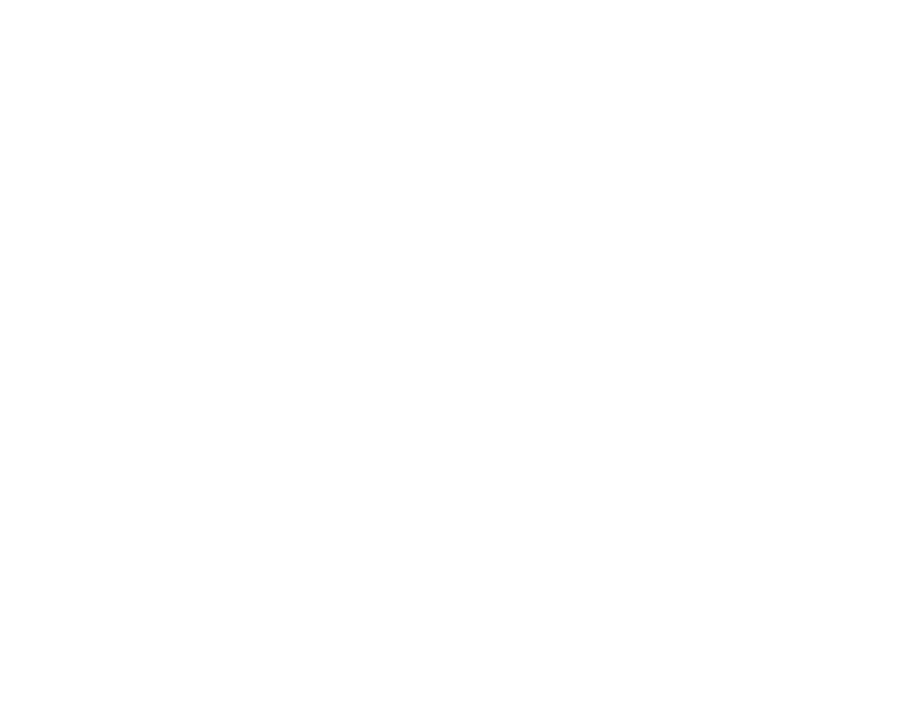

('weird', 32)
('---> azimuth: deviants', [3, 45, 53, 117, 120, 126, 139, 140, 142])


<IPython.core.display.Javascript object>


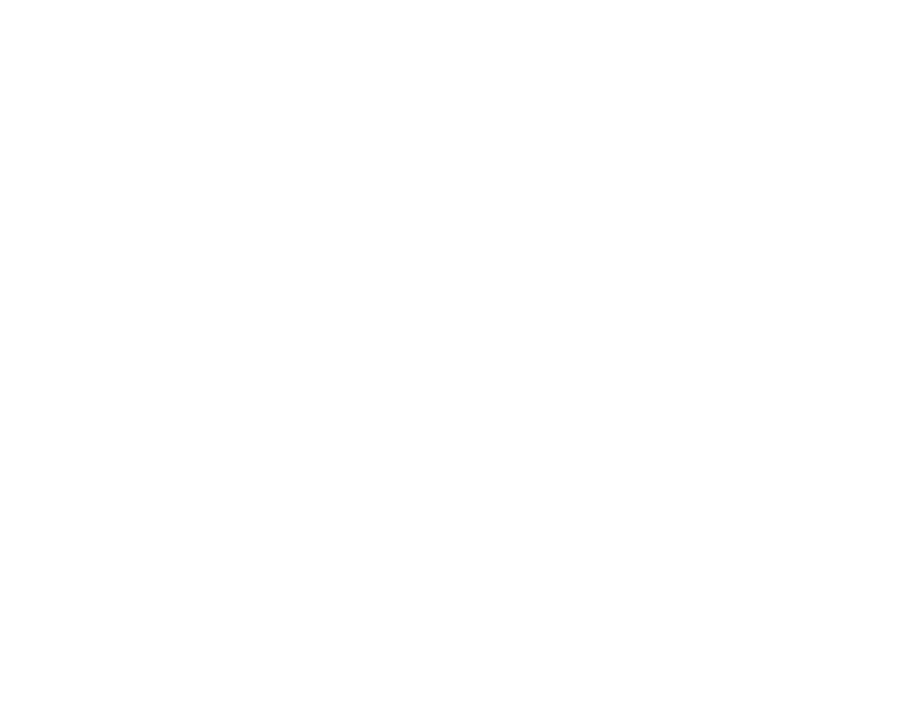

('weird', 32)
('---> elevation: deviants', [39, 45, 117, 126, 144, 148])
--- saved roi info after evaluation.
... [JC117|20191105|FOV1_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
['/n/coxfs01/2p-data/JC117/20191105/FOV1_zoom2p0x/combined_rfs10_static']
... run: combined_rfs10_static
Saving stats output to: /n/coxfs01/2p-data/JC117/20191105/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


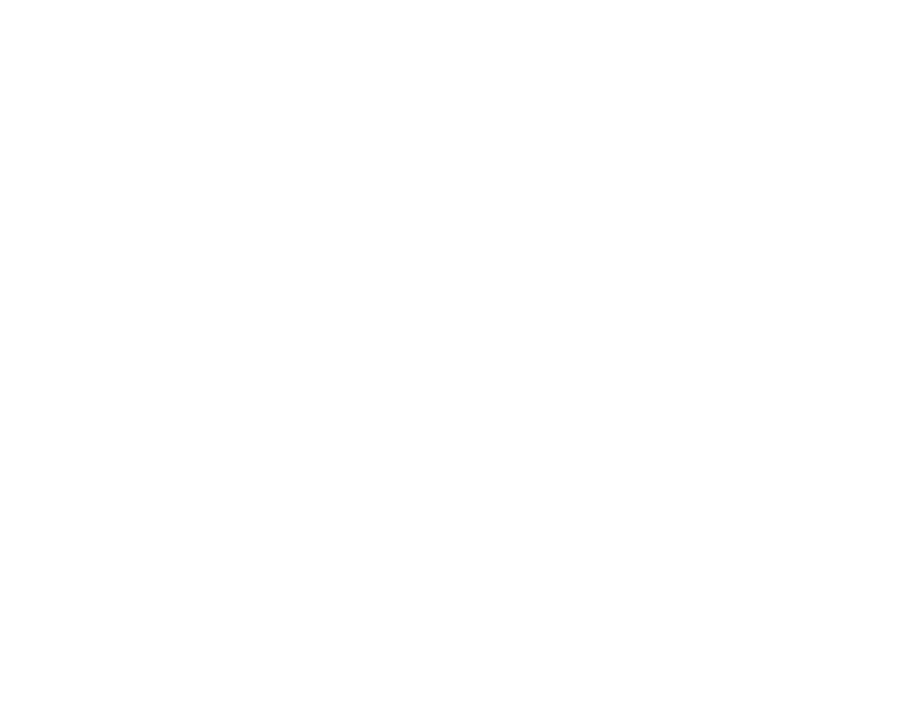

('weird', 4)
('---> azimuth: deviants', [1, 11, 29, 109, 117])


<IPython.core.display.Javascript object>


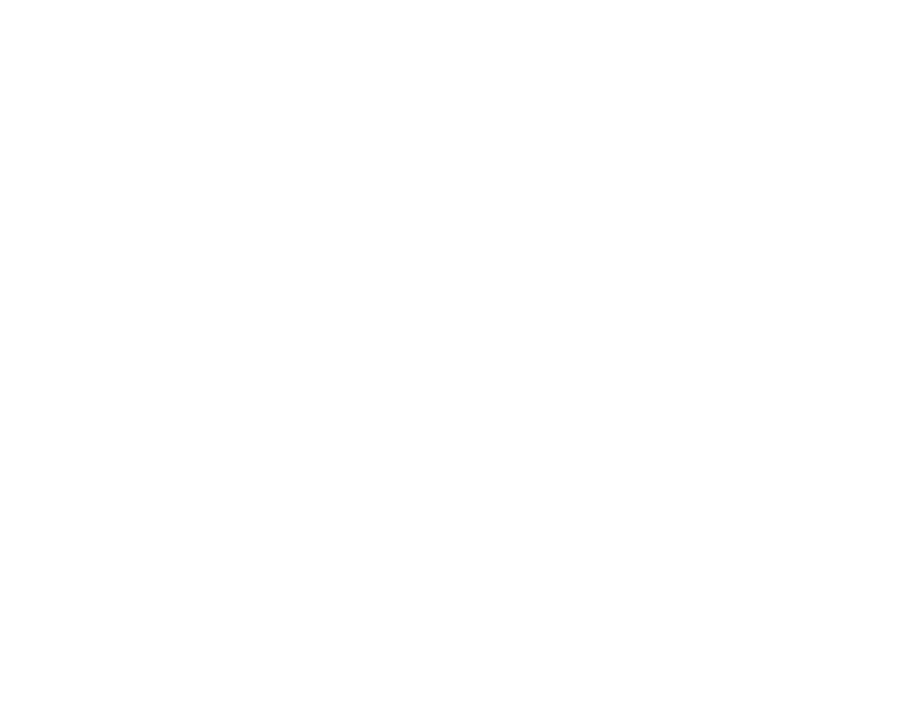

('weird', 4)
('---> elevation: deviants', [])
--- saved roi info after evaluation.
... [JC120|20191106|FOV1_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
['/n/coxfs01/2p-data/JC120/20191106/FOV1_zoom2p0x/combined_rfs10_static']
... run: combined_rfs10_static
Saving stats output to: /n/coxfs01/2p-data/JC120/20191106/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


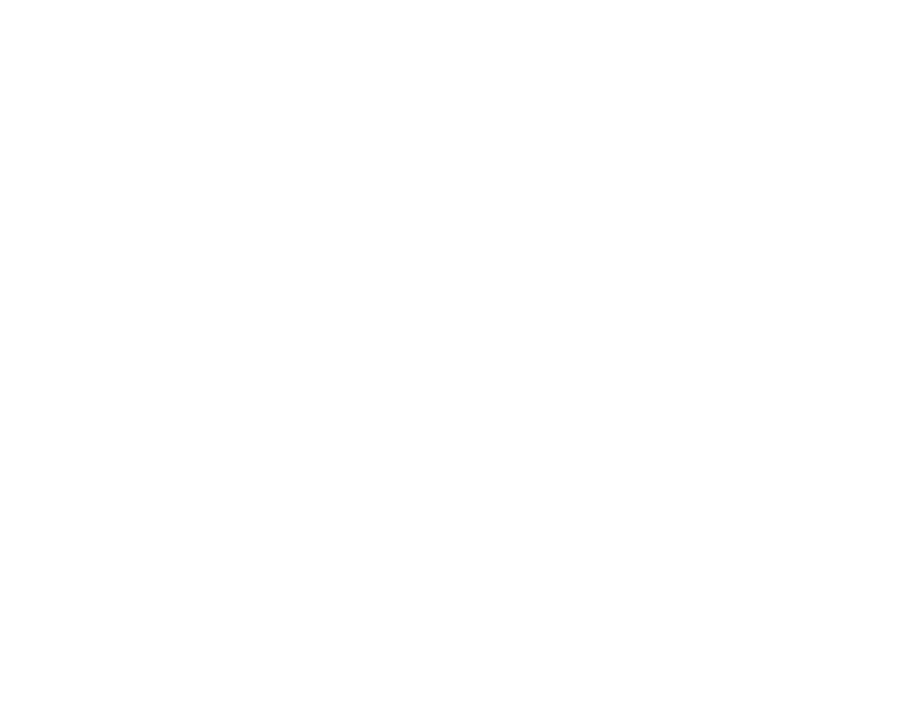

('weird', 34)
('---> azimuth: deviants', [49])


<IPython.core.display.Javascript object>


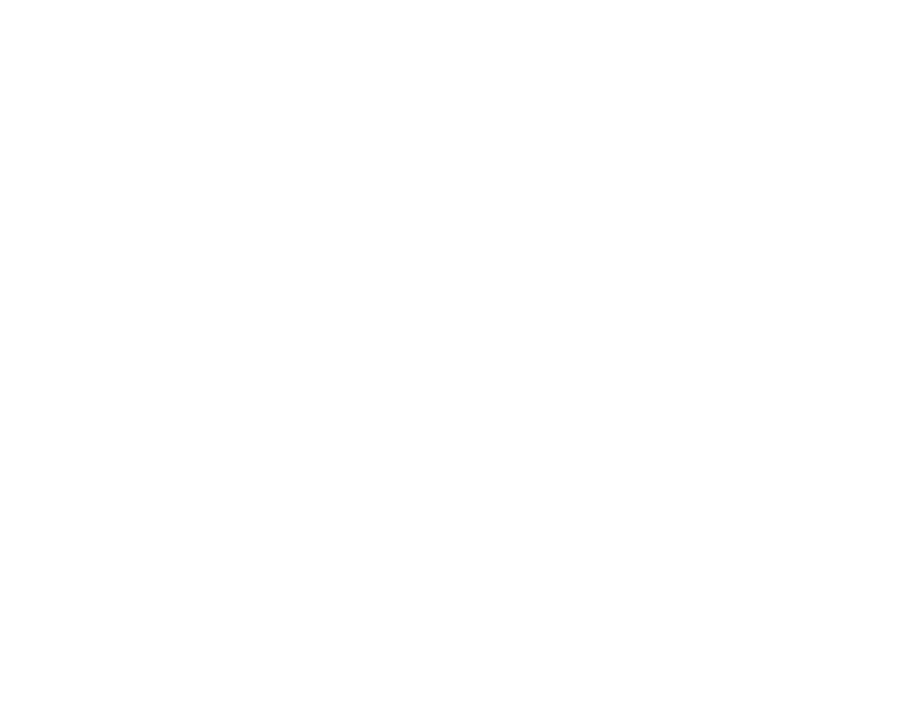

('weird', 34)
('---> elevation: deviants', [6, 7])
--- saved roi info after evaluation.
... [JC120|20191111|FOV1_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
['/n/coxfs01/2p-data/JC120/20191111/FOV1_zoom2p0x/combined_rfs10_static']
... run: combined_rfs10_static
Saving stats output to: /n/coxfs01/2p-data/JC120/20191111/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


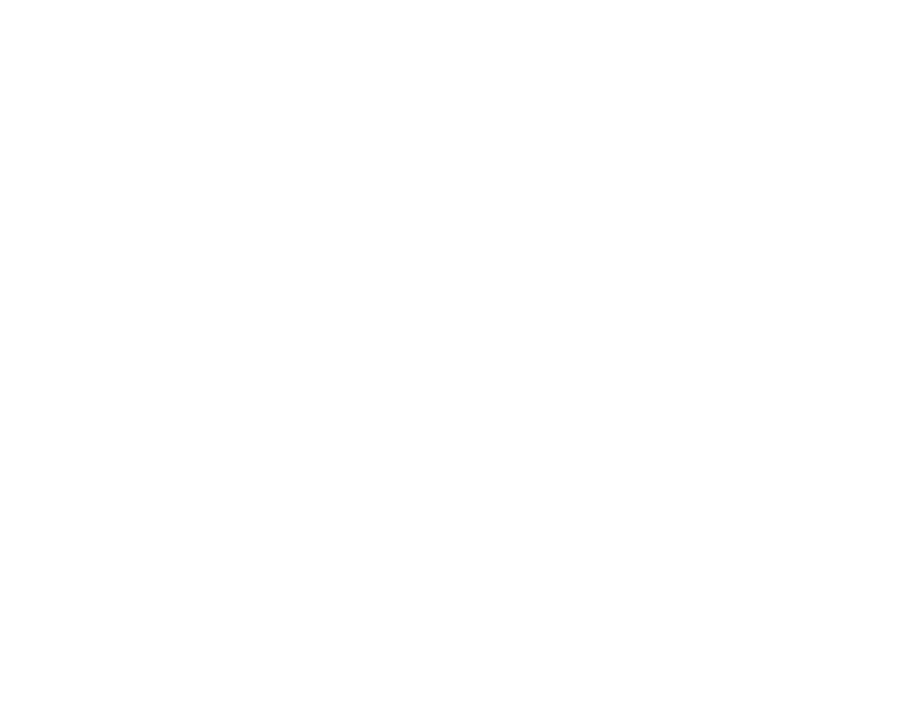

('weird', 3)
('---> azimuth: deviants', [])


<IPython.core.display.Javascript object>


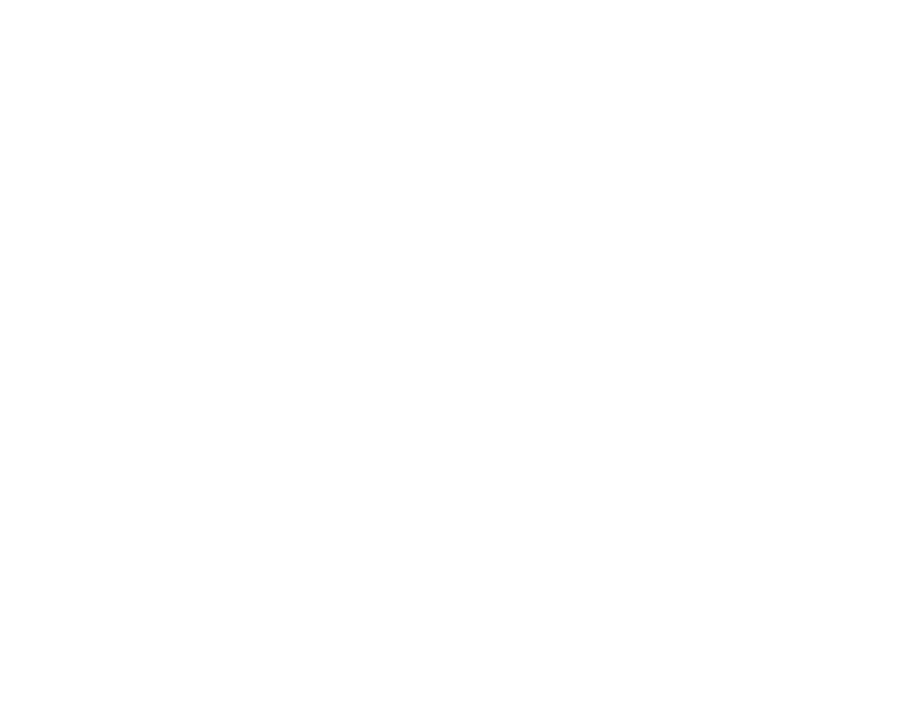

('weird', 3)
('---> elevation: deviants', [])
--- saved roi info after evaluation.
... [JC076|20190423|FOV1_zoom2p0x] creating gratings object
... getting data paths - name: gratings
['/n/coxfs01/2p-data/JC076/20190423/FOV1_zoom2p0x/combined_gratings_static']
... run: combined_gratings_static
Saving stats output to: /n/coxfs01/2p-data/JC076/20190423/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


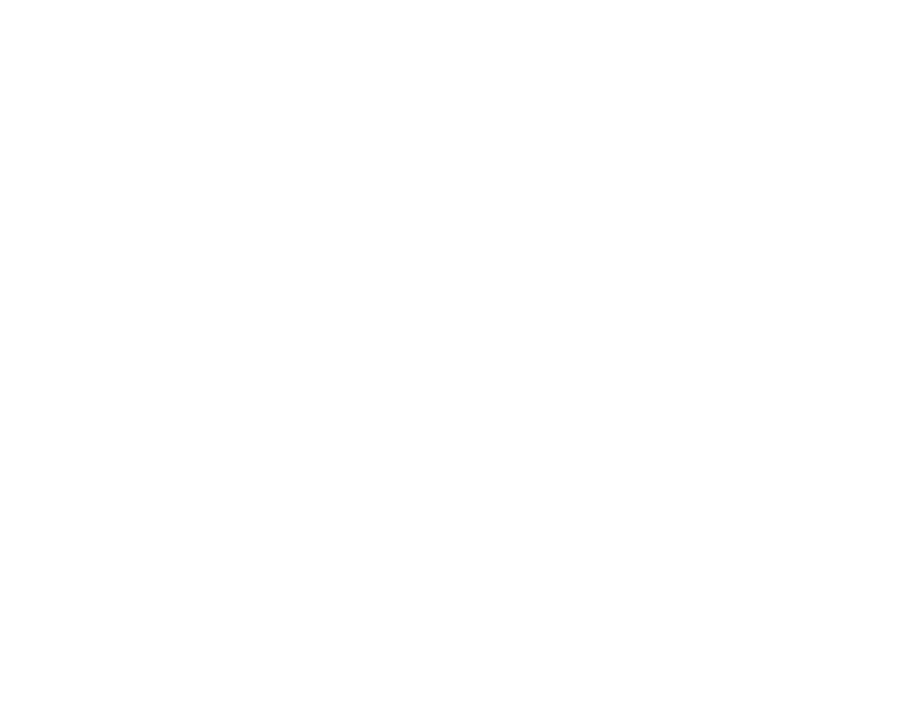

('weird', 3)
('---> azimuth: deviants', [6, 160, 309])


<IPython.core.display.Javascript object>


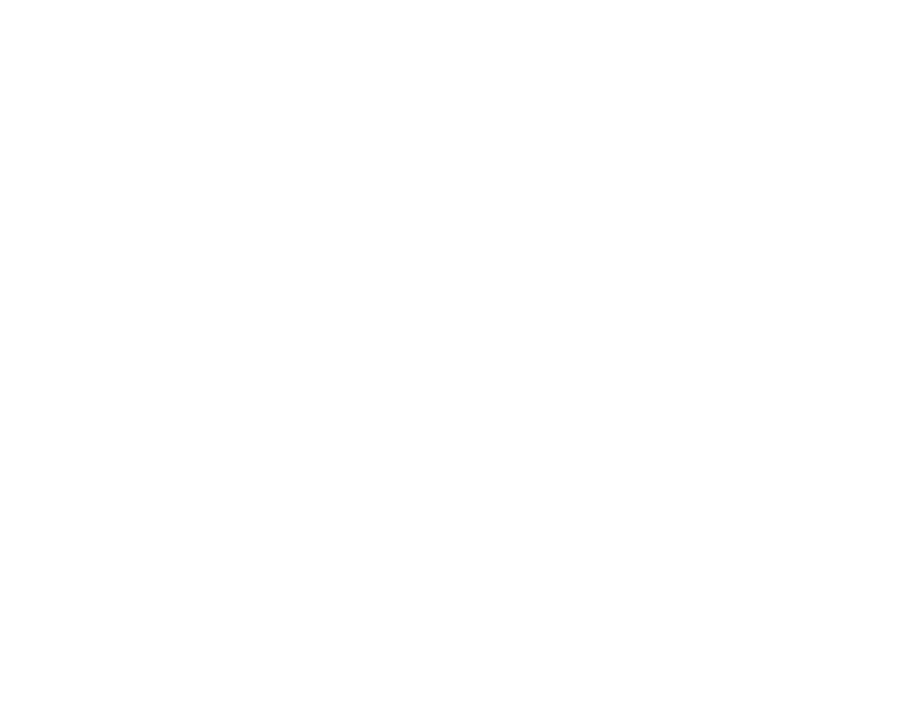

('weird', 3)
('---> elevation: deviants', [6, 177, 180, 317])
--- saved roi info after evaluation.
... [JC078|20190430|FOV1_zoom2p0x] creating gratings object
... getting data paths - name: gratings
['/n/coxfs01/2p-data/JC078/20190430/FOV1_zoom2p0x/combined_gratings_static']
... run: combined_gratings_static
Saving stats output to: /n/coxfs01/2p-data/JC078/20190430/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


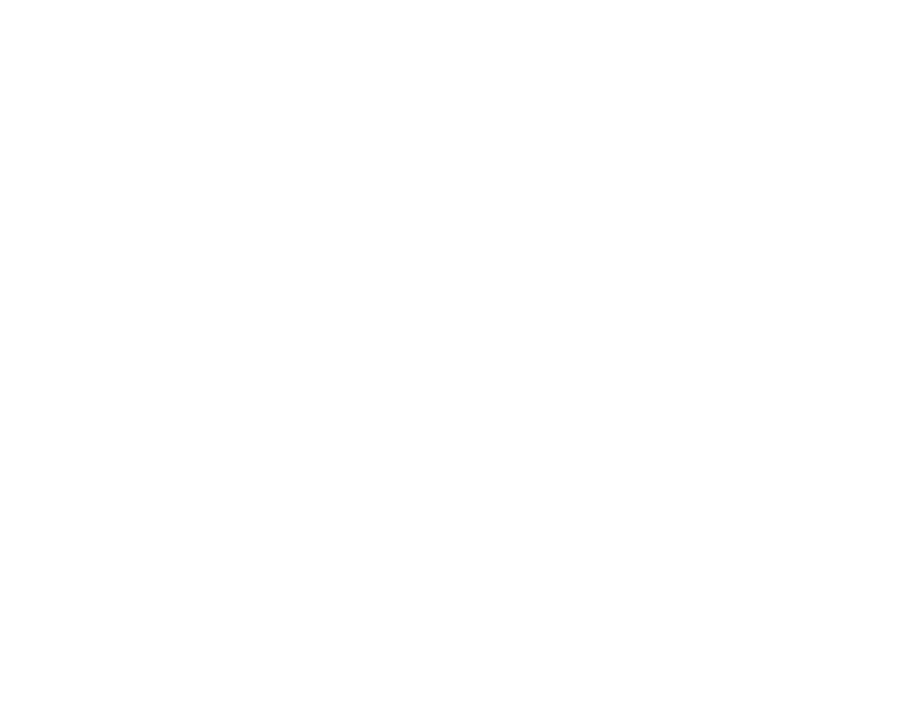

('weird', 4)
('---> azimuth: deviants', [9, 23, 48, 57, 58, 88, 106, 107, 114, 125, 128, 135, 186, 249])


<IPython.core.display.Javascript object>


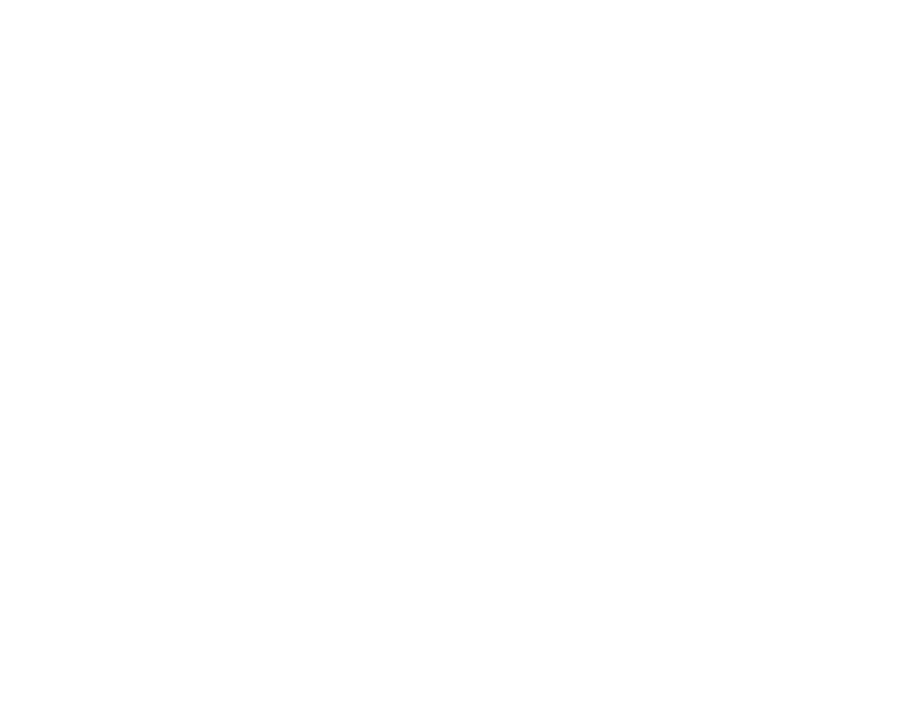

('weird', 4)
('---> elevation: deviants', [9, 13, 23, 26, 47, 48, 58, 62, 80, 88, 106, 114, 128, 129, 135, 213, 249])
--- saved roi info after evaluation.
... [JC080|20190602|FOV2_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
... No extracted traces: rfs10
Saving stats output to: /n/coxfs01/2p-data/JC080/20190602/FOV2_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... [JC080|20190603|FOV1_zoom2p0x] creating rfs object
... getting data paths - name: rfs
['/n/coxfs01/2p-data/JC080/20190603/FOV1_zoom2p0x/combined_rfs_static']
... run: combined_rfs_static
Saving stats output to: /n/coxfs01/2p-data/JC080/20190603/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


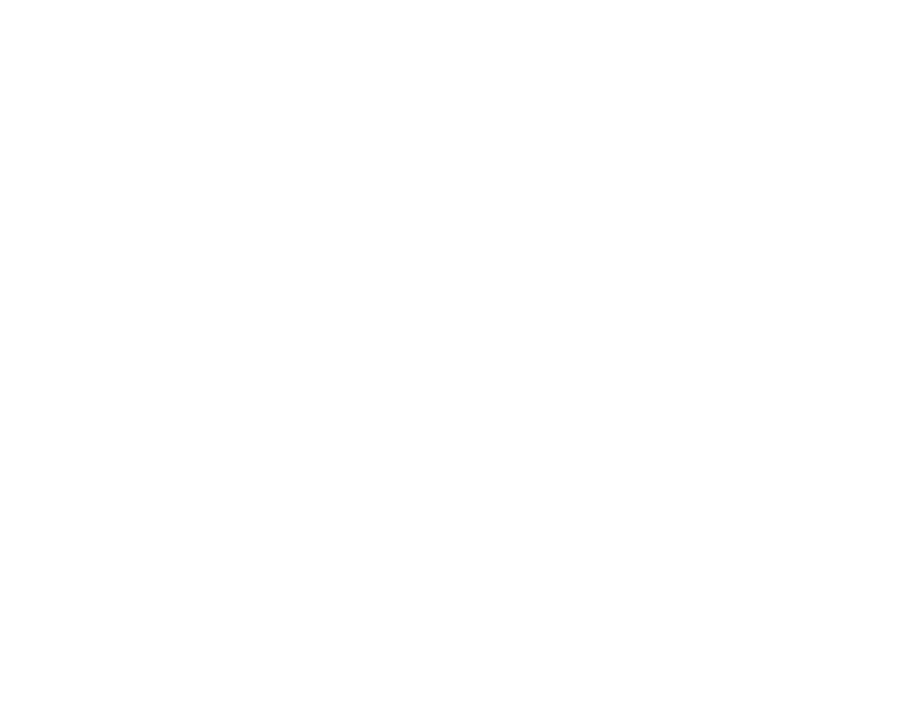

('weird', 8)
('---> azimuth: deviants', [7, 11, 19, 32, 41, 74, 91, 104, 109, 116, 164, 169, 170, 193, 196, 208, 209, 223])


<IPython.core.display.Javascript object>


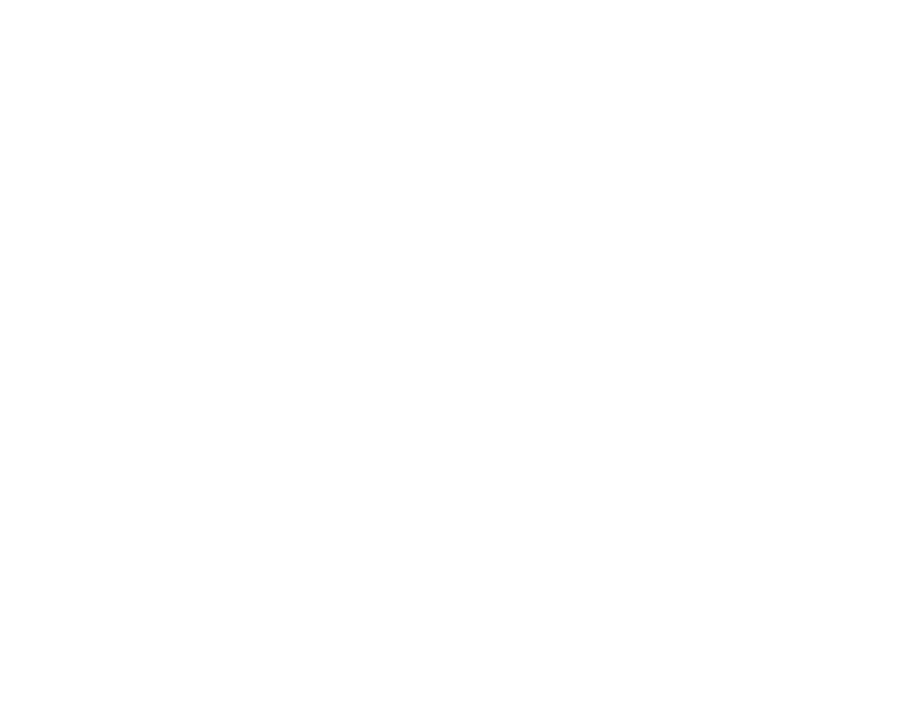

('weird', 8)
('---> elevation: deviants', [7, 19, 42, 53, 86, 87, 88, 91, 101, 106, 109, 116, 137, 164, 169, 173, 174, 175, 194, 201, 204, 208, 223, 252])
--- saved roi info after evaluation.
... [JC083|20190508|FOV1_zoom2p0x] creating gratings object
... getting data paths - name: gratings
['/n/coxfs01/2p-data/JC083/20190508/FOV1_zoom2p0x/combined_gratings_static']
... run: combined_gratings_static
Saving stats output to: /n/coxfs01/2p-data/JC083/20190508/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


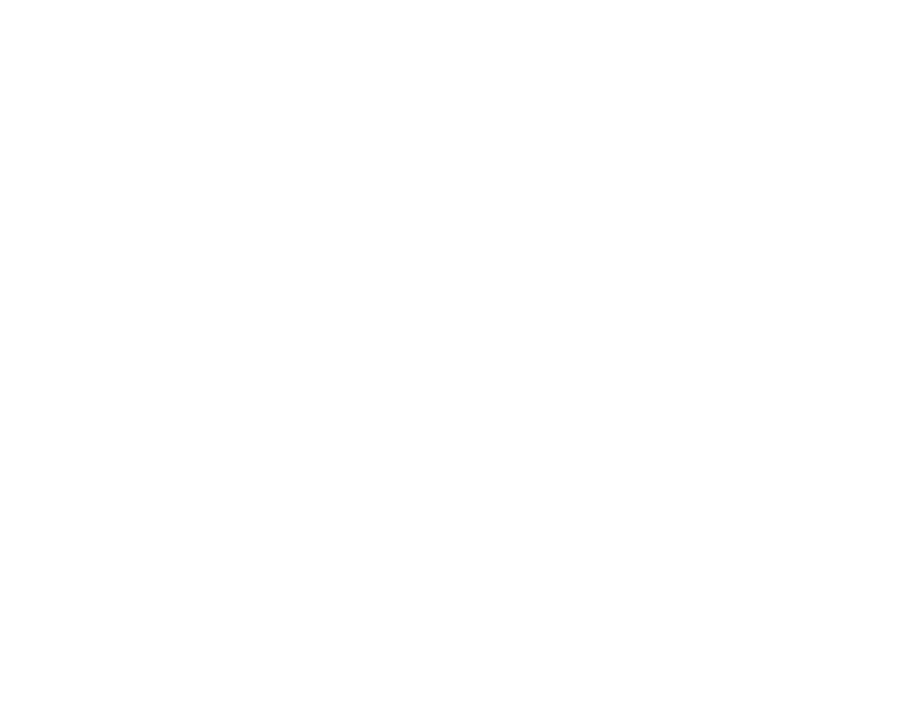

('weird', 14)
('---> azimuth: deviants', [4, 14, 16, 34, 39, 42, 44, 74, 110, 123, 136, 139, 146, 147, 149, 151, 153, 154, 156, 162, 209, 232, 237, 238, 247, 254])


<IPython.core.display.Javascript object>


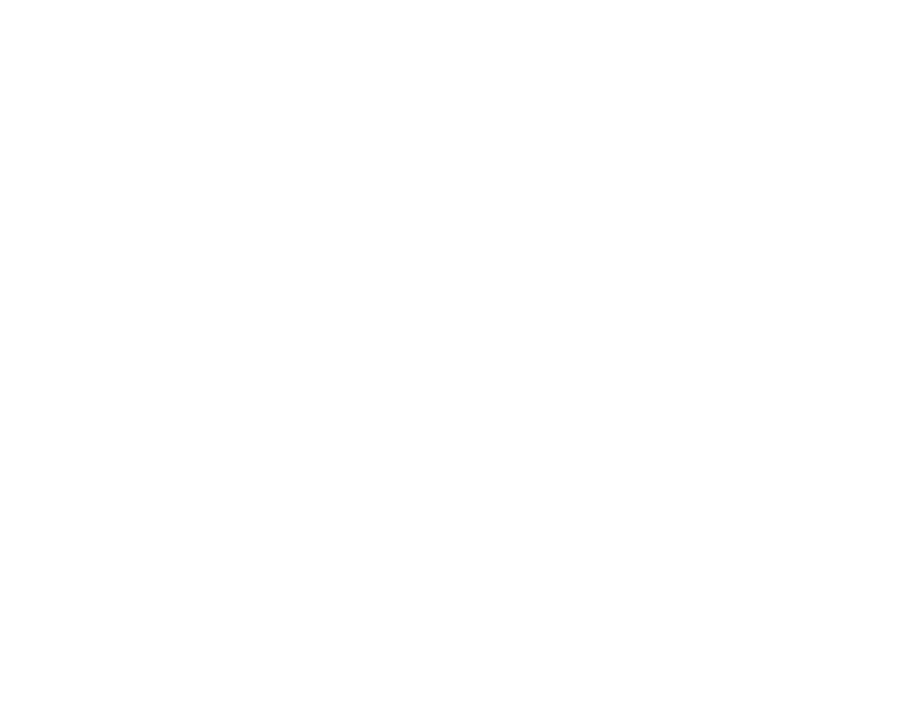

('weird', 14)
('---> elevation: deviants', [2, 4, 14, 31, 33, 34, 74, 108, 113, 122, 136, 149, 153, 232, 237, 238, 247])
--- saved roi info after evaluation.
... [JC084|20190525|FOV1_zoom2p0x] creating rfs object
... getting data paths - name: rfs
['/n/coxfs01/2p-data/JC084/20190525/FOV1_zoom2p0x/combined_rfs_static']
... run: combined_rfs_static
Saving stats output to: /n/coxfs01/2p-data/JC084/20190525/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


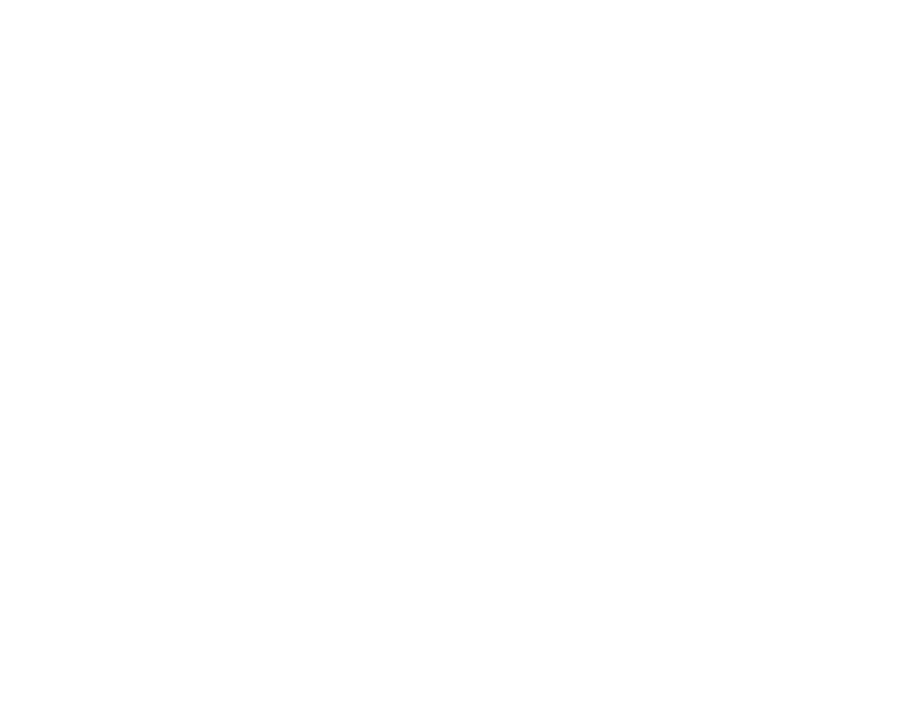

('weird', 2)
('---> azimuth: deviants', [16, 22, 31, 38, 43, 45, 49, 80, 82, 93, 112, 180, 182, 201, 209, 210])


<IPython.core.display.Javascript object>


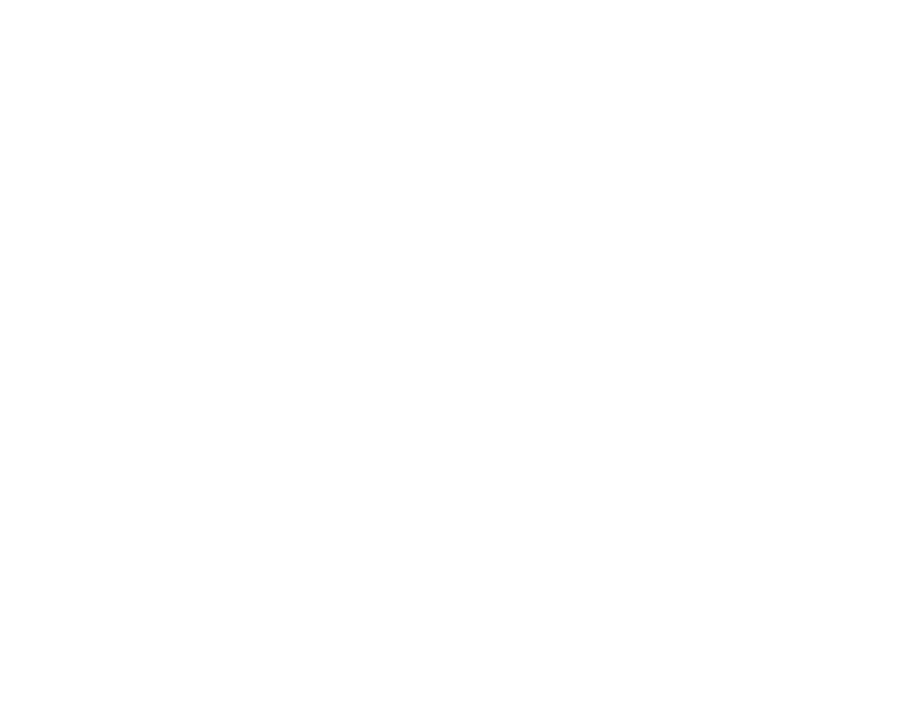

('weird', 2)
('---> elevation: deviants', [16, 31, 45, 95, 96, 99, 112, 143, 162, 201, 210, 220])
--- saved roi info after evaluation.
... [JC091|20190627|FOV1_zoom2p0x] creating rfs object
... getting data paths - name: rfs
['/n/coxfs01/2p-data/JC091/20190627/FOV1_zoom2p0x/combined_rfs_static']
... run: combined_rfs_static
Saving stats output to: /n/coxfs01/2p-data/JC091/20190627/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


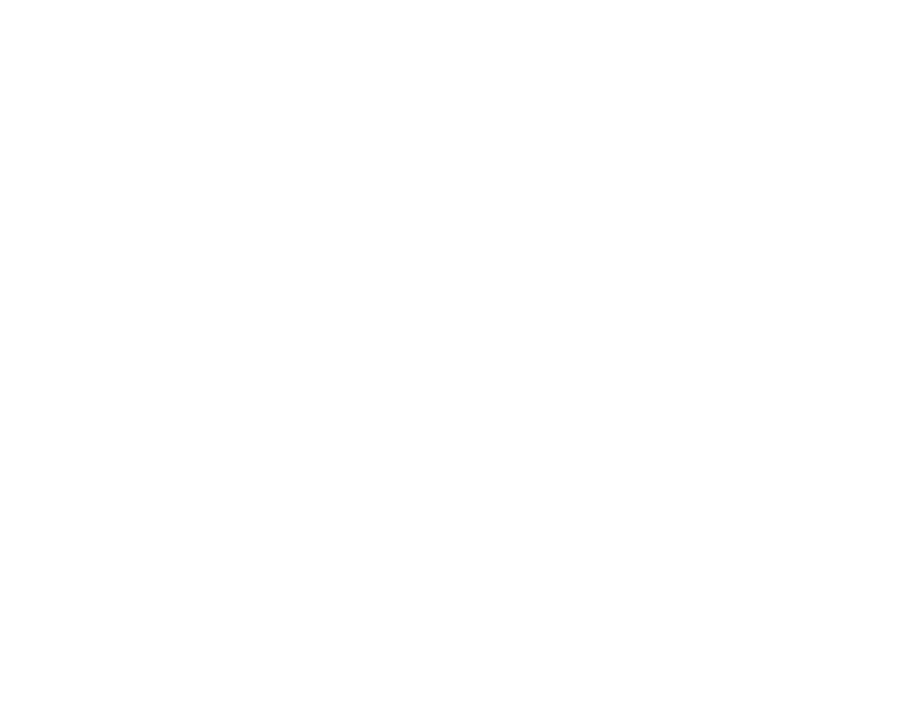

('weird', 4)
('---> azimuth: deviants', [71, 99, 146, 200])


<IPython.core.display.Javascript object>


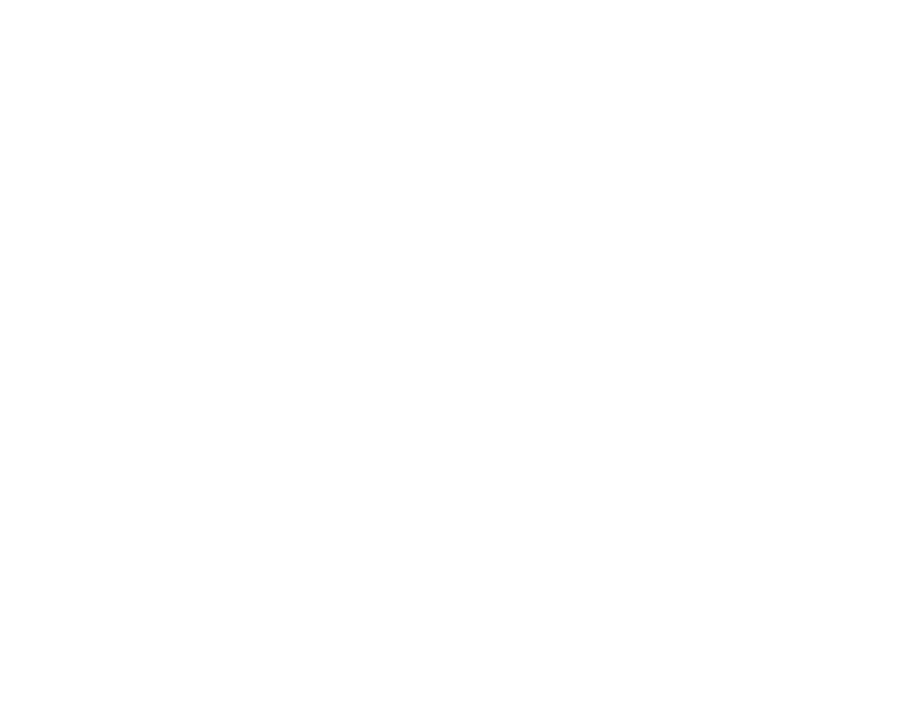

('weird', 4)
('---> elevation: deviants', [99, 146, 162])
--- saved roi info after evaluation.
... [JC110|20191004|FOV3_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
['/n/coxfs01/2p-data/JC110/20191004/FOV3_zoom2p0x/combined_rfs10_static']
... run: combined_rfs10_static
Saving stats output to: /n/coxfs01/2p-data/JC110/20191004/FOV3_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


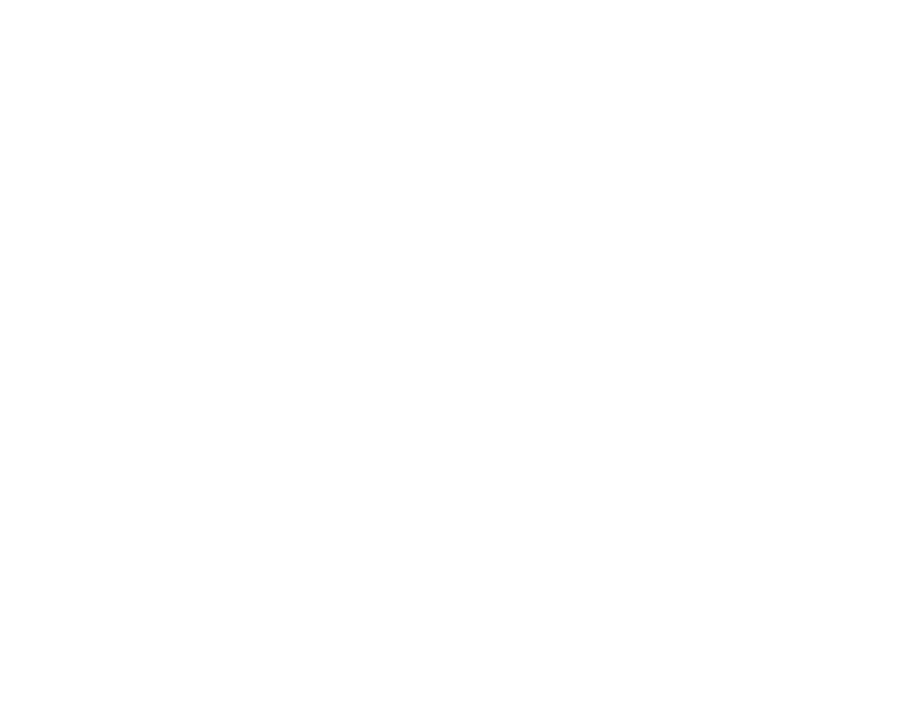

('weird', 34)
('---> azimuth: deviants', [217])


<IPython.core.display.Javascript object>


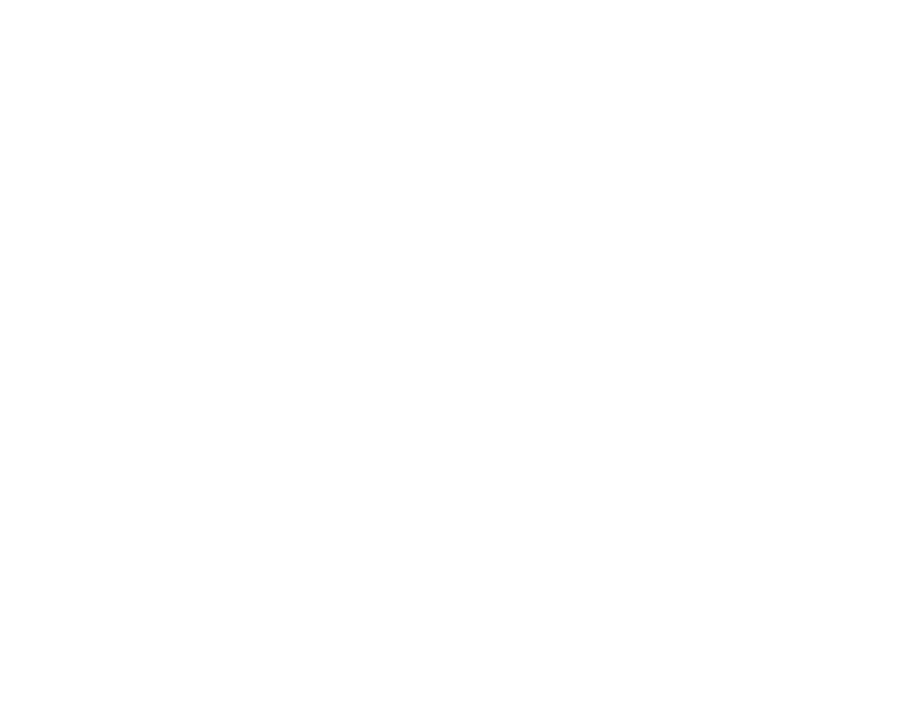

('weird', 34)
('---> elevation: deviants', [170])
--- saved roi info after evaluation.
... [JC110|20191004|FOV4_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
['/n/coxfs01/2p-data/JC110/20191004/FOV4_zoom2p0x/combined_rfs10_static']
... run: combined_rfs10_static
Saving stats output to: /n/coxfs01/2p-data/JC110/20191004/FOV4_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


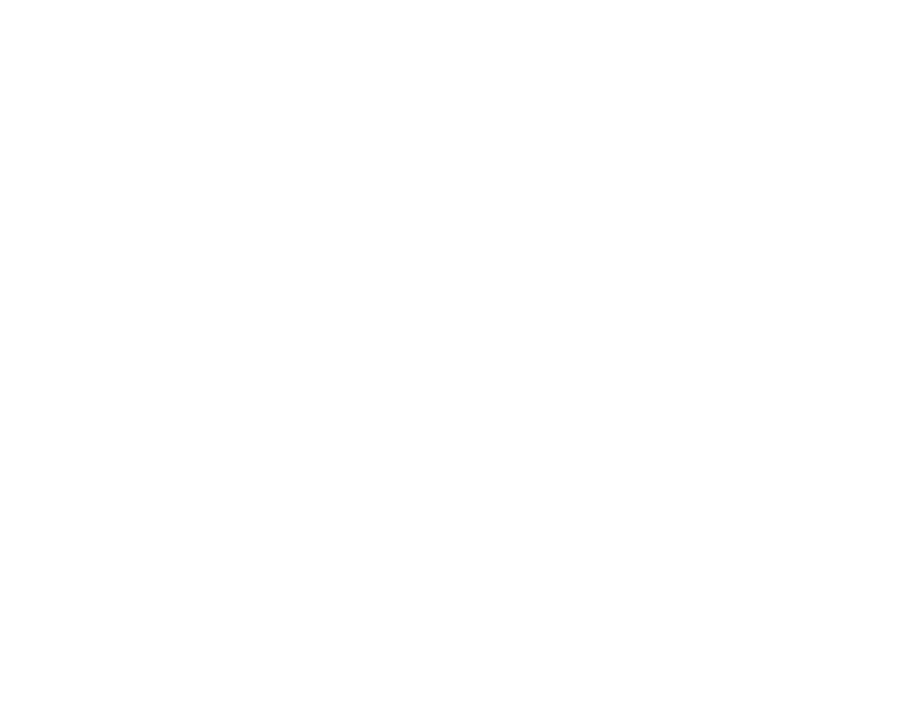

('weird', 26)
('---> azimuth: deviants', [55, 78, 114, 314, 315, 331, 334, 335, 336, 339, 349])


<IPython.core.display.Javascript object>


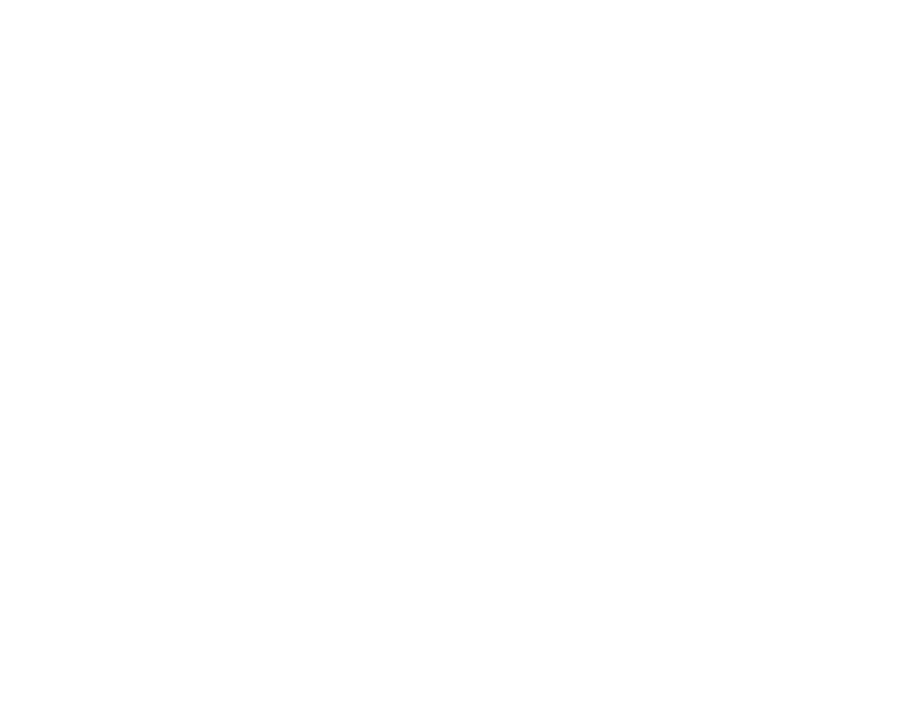

('weird', 26)
('---> elevation: deviants', [314, 327, 334, 335, 336, 342, 349])
--- saved roi info after evaluation.
... [JC113|20191012|FOV3_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
['/n/coxfs01/2p-data/JC113/20191012/FOV3_zoom2p0x/combined_rfs10_static']
... run: combined_rfs10_static
Saving stats output to: /n/coxfs01/2p-data/JC113/20191012/FOV3_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


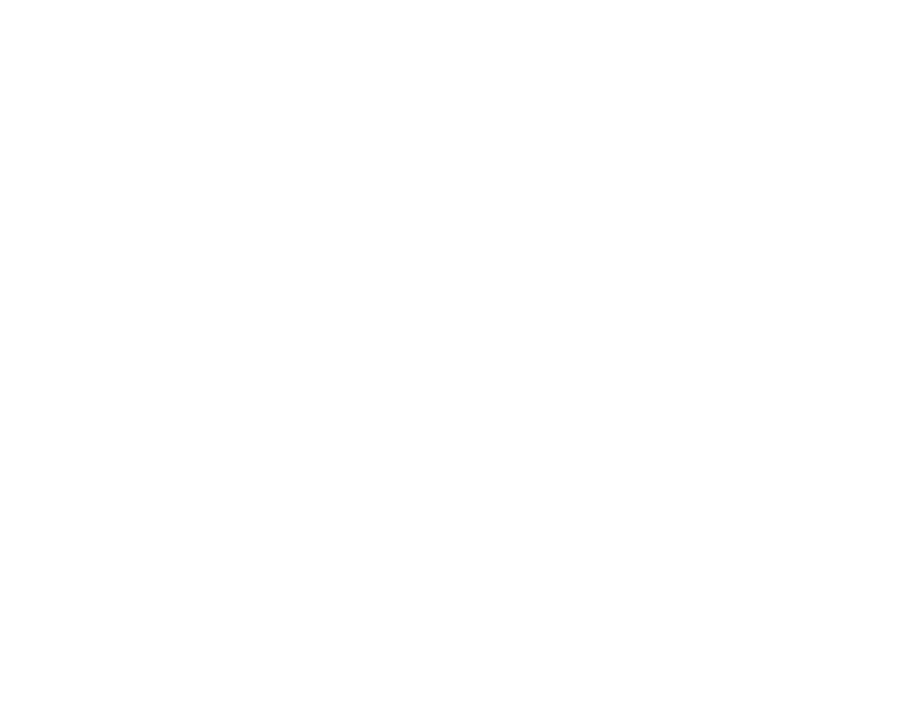

('weird', 33)
('---> azimuth: deviants', [293, 294, 295, 352, 526])


<IPython.core.display.Javascript object>


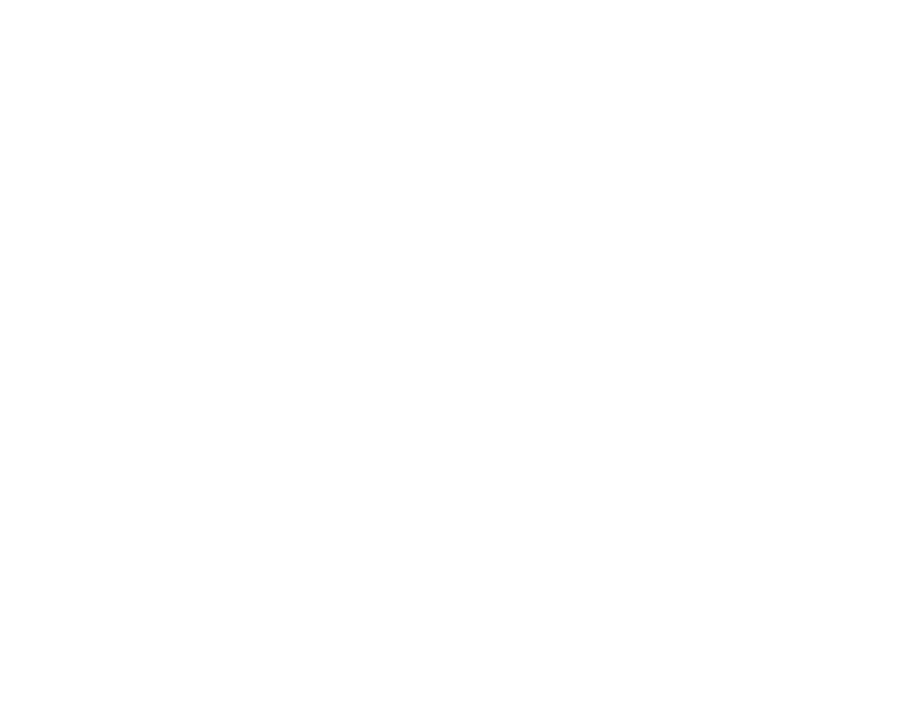

('weird', 33)
('---> elevation: deviants', [])
--- saved roi info after evaluation.
... [JC117|20191104|FOV2_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
['/n/coxfs01/2p-data/JC117/20191104/FOV2_zoom2p0x/combined_rfs10_static']
... run: combined_rfs10_static
Saving stats output to: /n/coxfs01/2p-data/JC117/20191104/FOV2_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


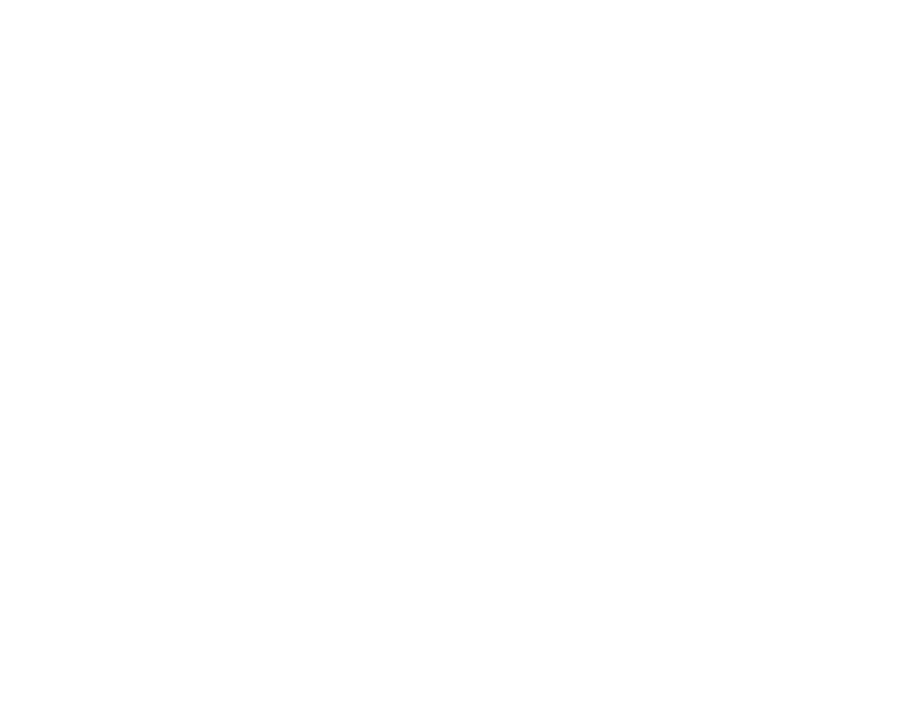

('weird', 52)
('---> azimuth: deviants', [149, 154, 168, 172, 200, 205, 279, 343])


<IPython.core.display.Javascript object>


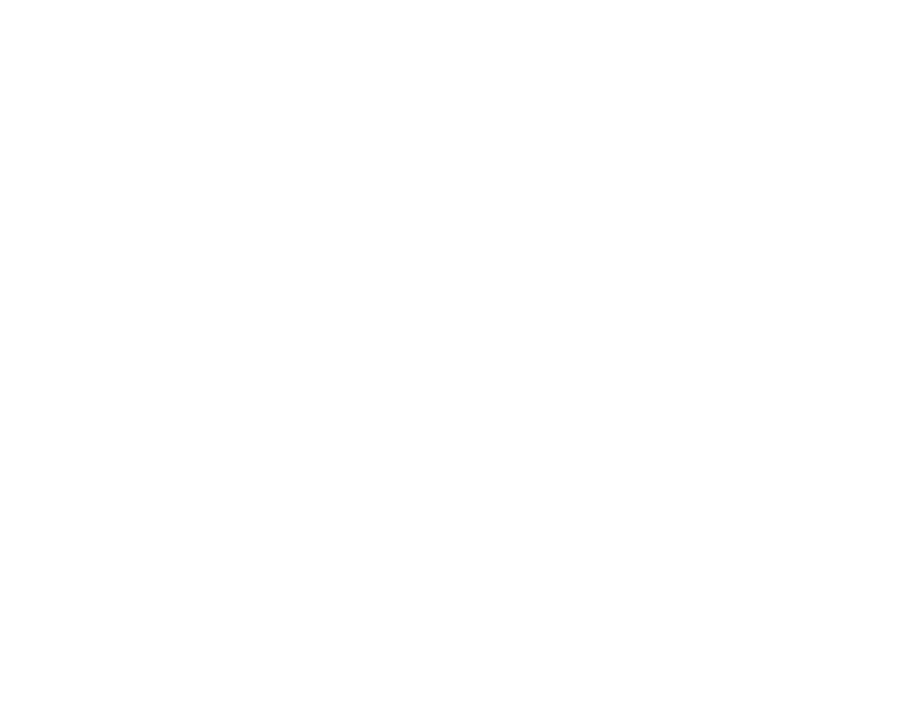

('weird', 52)
('---> elevation: deviants', [7, 10, 46, 149, 151, 164, 190, 207, 209, 279])
--- saved roi info after evaluation.
... [JC117|20191111|FOV2_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
['/n/coxfs01/2p-data/JC117/20191111/FOV2_zoom2p0x/combined_rfs10_static']
... run: combined_rfs10_static
Saving stats output to: /n/coxfs01/2p-data/JC117/20191111/FOV2_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


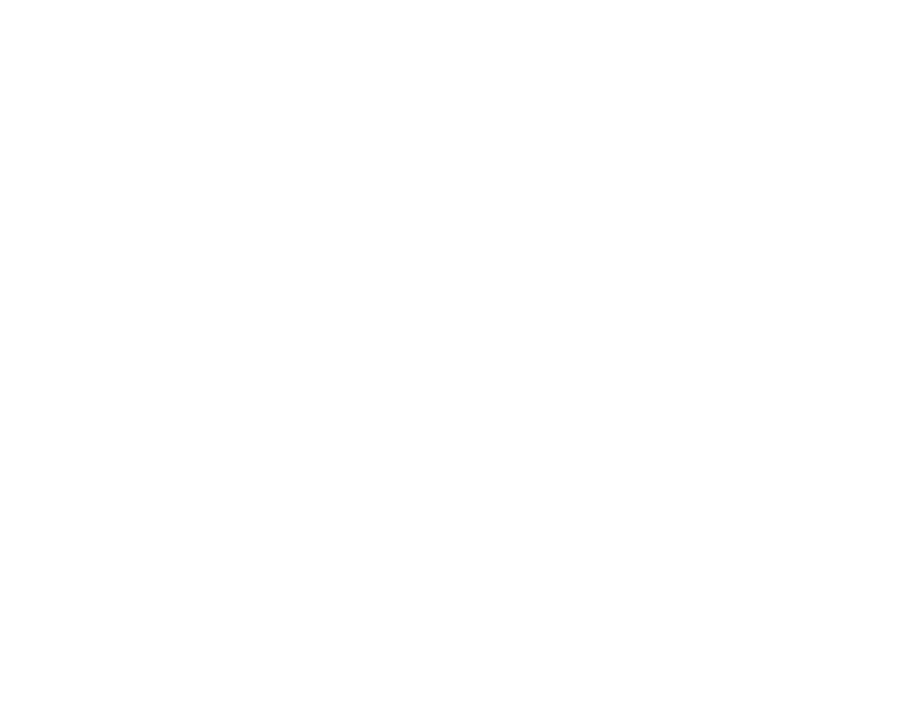

('weird', 11)
('---> azimuth: deviants', [])


<IPython.core.display.Javascript object>


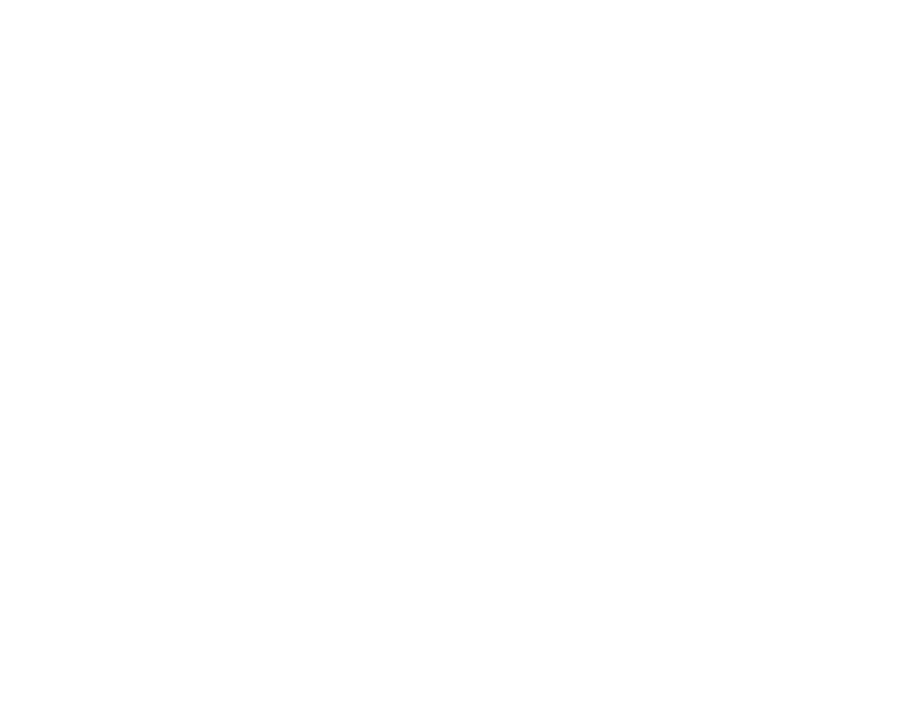

('weird', 11)
('---> elevation: deviants', [])
--- saved roi info after evaluation.
... [JC120|20191106|FOV4_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
['/n/coxfs01/2p-data/JC120/20191106/FOV4_zoom2p0x/combined_rfs10_static']
... run: combined_rfs10_static
Saving stats output to: /n/coxfs01/2p-data/JC120/20191106/FOV4_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


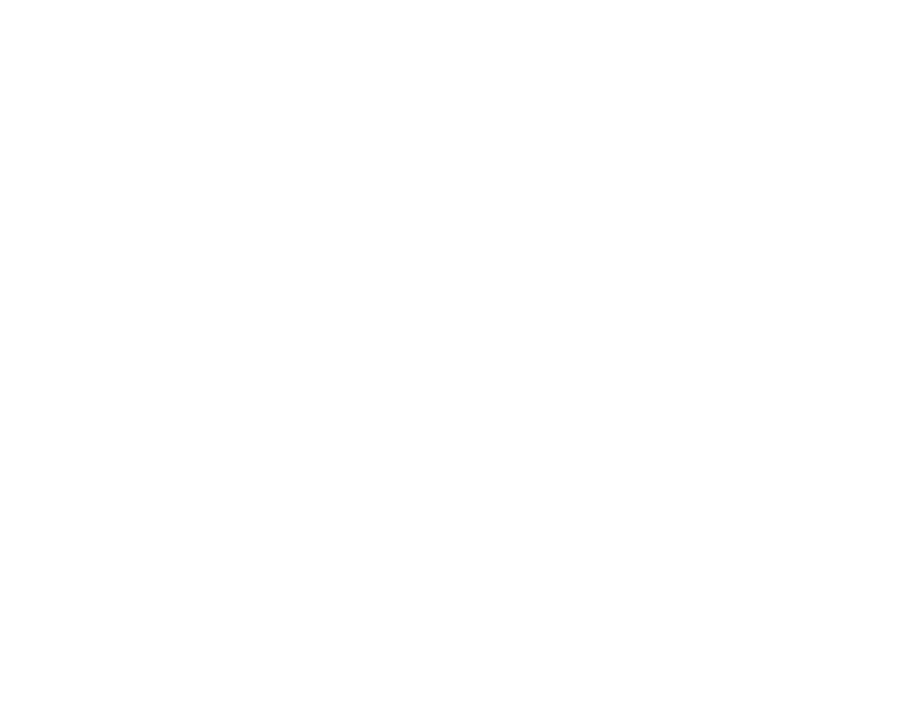

('weird', 23)
('---> azimuth: deviants', [150, 155])


<IPython.core.display.Javascript object>


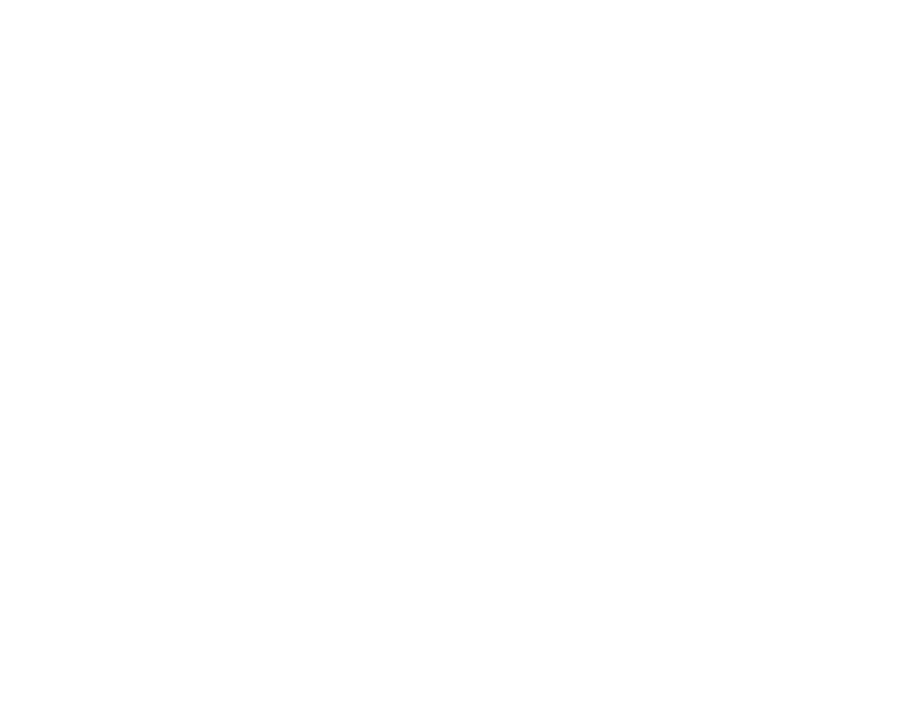

('weird', 23)
('---> elevation: deviants', [150])
--- saved roi info after evaluation.
... [JC076|20190420|FOV1_zoom2p0x] creating gratings object
... getting data paths - name: gratings
['/n/coxfs01/2p-data/JC076/20190420/FOV1_zoom2p0x/combined_gratings_static']
... run: combined_gratings_static
Saving stats output to: /n/coxfs01/2p-data/JC076/20190420/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


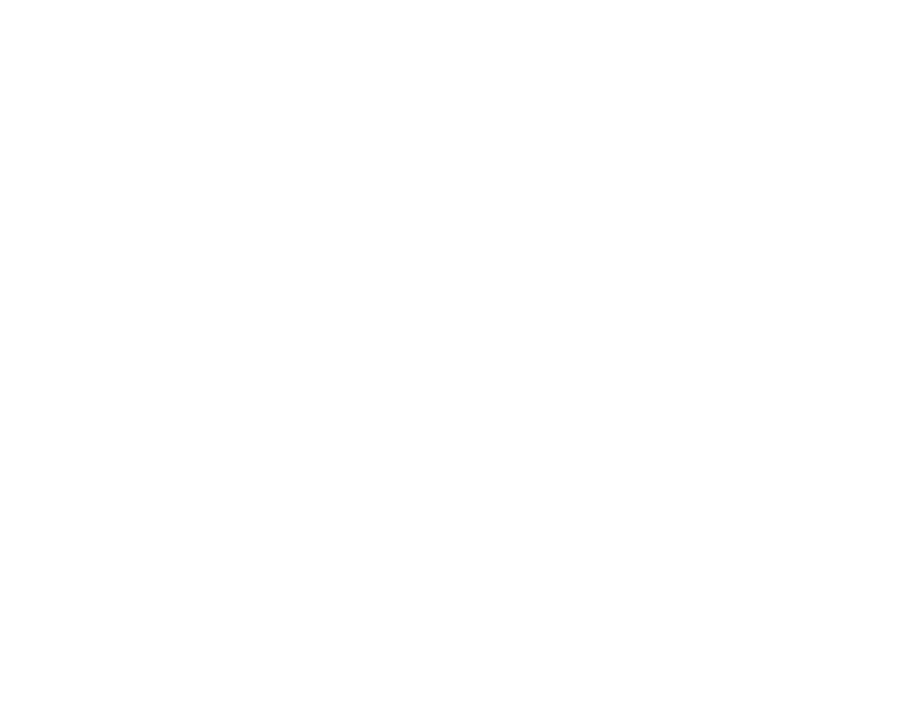

('weird', 0)
('---> azimuth: deviants', [5, 25, 48, 52, 67, 106, 108, 122, 138, 209, 210, 223, 226, 270, 289])


<IPython.core.display.Javascript object>


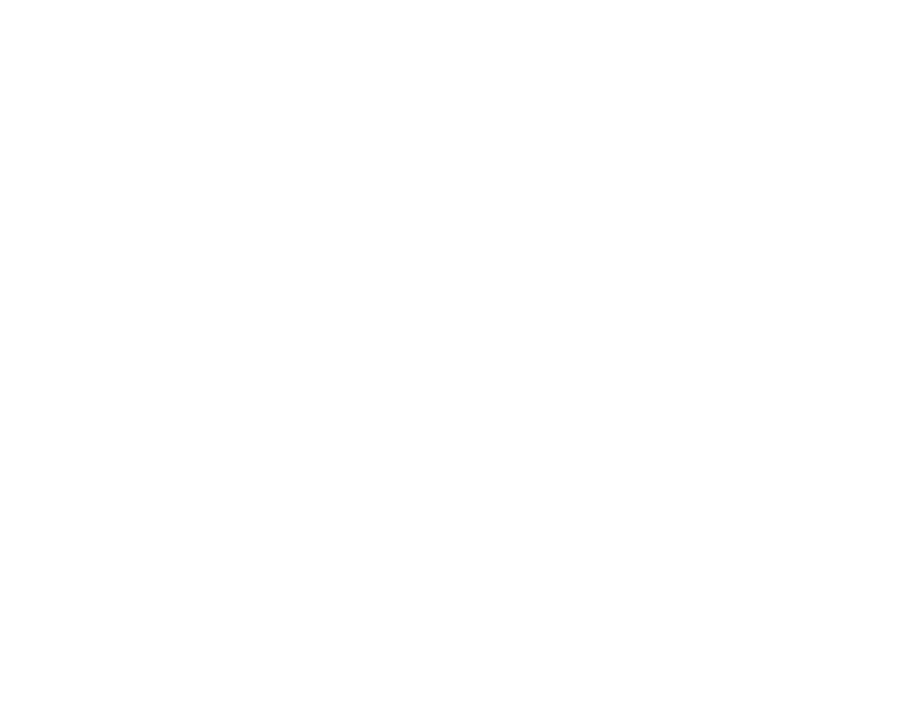

('weird', 0)
('---> elevation: deviants', [7, 60, 138, 209, 223, 228, 288])
--- saved roi info after evaluation.
... [JC083|20190507|FOV1_zoom2p0x] creating gratings object
... getting data paths - name: gratings
['/n/coxfs01/2p-data/JC083/20190507/FOV1_zoom2p0x/combined_gratings_static']
... run: combined_gratings_static
Saving stats output to: /n/coxfs01/2p-data/JC083/20190507/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


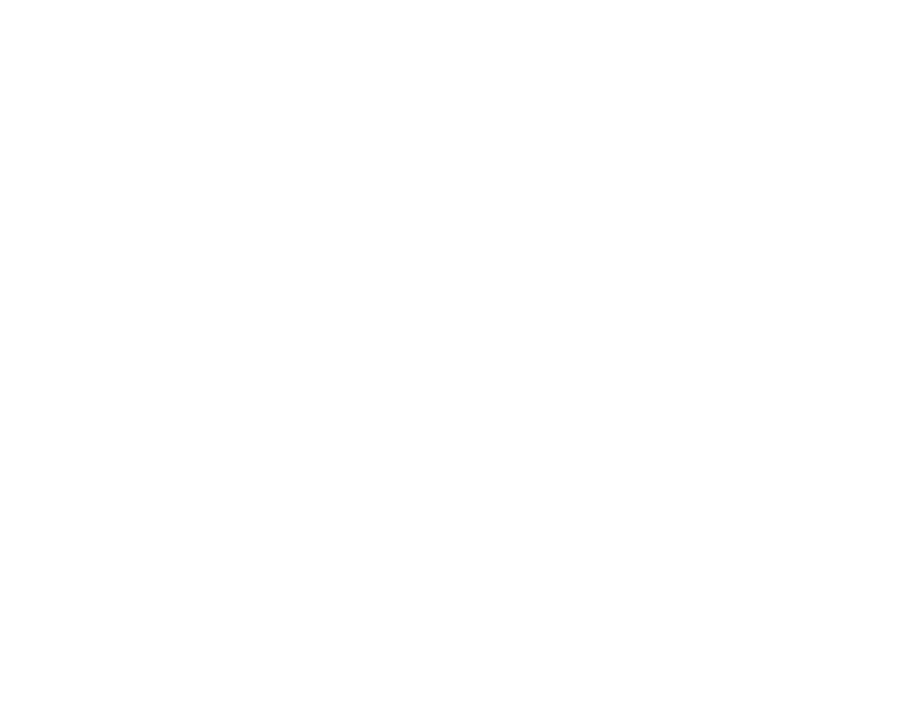

('weird', 2)
('---> azimuth: deviants', [1, 8, 11, 13, 20, 28, 38, 39, 68, 77, 79, 94, 124, 136, 139, 146, 168])


<IPython.core.display.Javascript object>


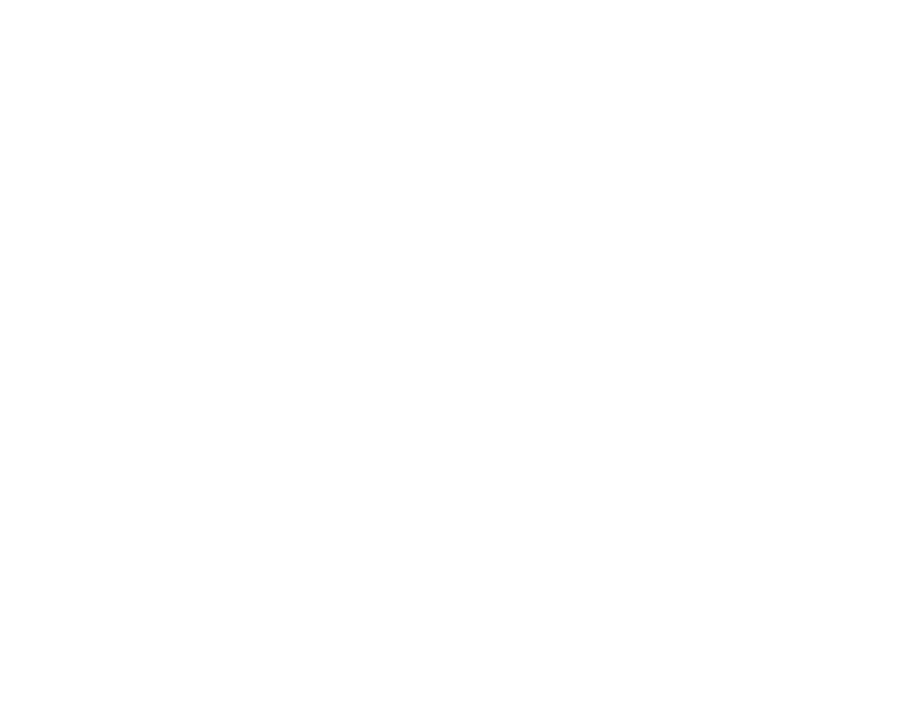

('weird', 2)
('---> elevation: deviants', [10, 11, 13, 20, 28, 38, 39, 69, 76, 77, 115, 126, 129, 131, 139, 148])
--- saved roi info after evaluation.
... [JC084|20190522|FOV1_zoom2p0x] creating rfs object
... getting data paths - name: rfs
['/n/coxfs01/2p-data/JC084/20190522/FOV1_zoom2p0x/combined_rfs_static']
... run: combined_rfs_static
Saving stats output to: /n/coxfs01/2p-data/JC084/20190522/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


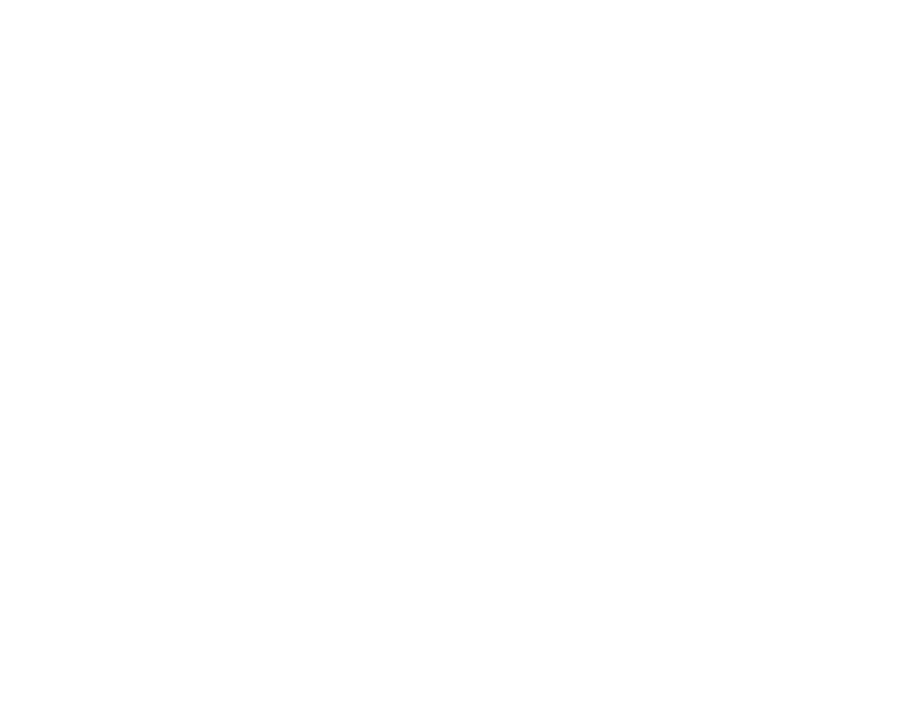

('weird', 30)
('---> azimuth: deviants', [0, 5, 12, 14, 25, 36, 69, 78, 91, 93, 97, 99, 101, 112, 134, 142, 147, 148, 149, 150, 152, 155, 165, 168, 170, 180, 216, 224, 230, 234, 238, 241, 244, 258])


<IPython.core.display.Javascript object>


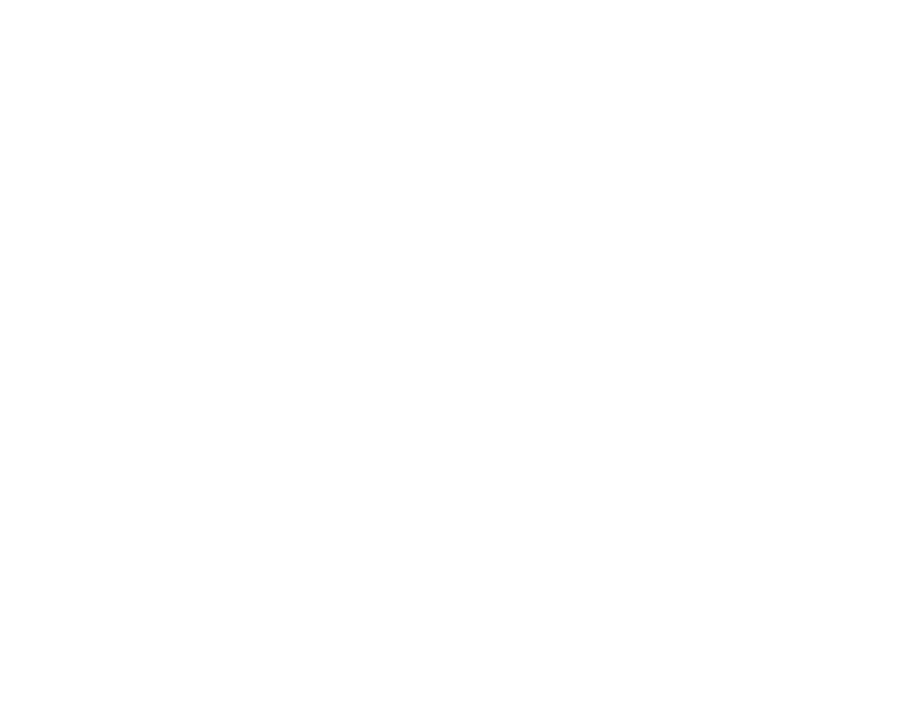

('weird', 30)
('---> elevation: deviants', [0, 9, 11, 12, 26, 33, 46, 49, 51, 72, 106, 112, 119, 125, 126, 135, 137, 143, 149, 151, 166, 173, 179, 191, 203, 215, 216, 234, 237, 238, 241, 242, 243, 252, 255])
--- saved roi info after evaluation.
... [JC085|20190622|FOV1_zoom2p0x] creating rfs object
... getting data paths - name: rfs
['/n/coxfs01/2p-data/JC085/20190622/FOV1_zoom2p0x/combined_rfs_static']
... run: combined_rfs_static
Saving stats output to: /n/coxfs01/2p-data/JC085/20190622/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


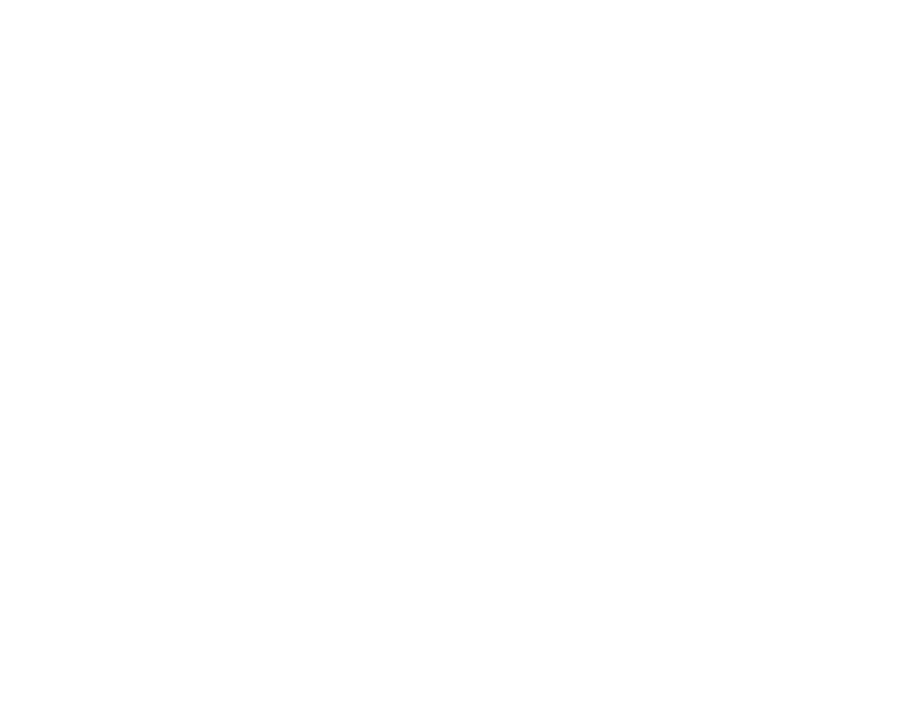

('weird', 14)
('---> azimuth: deviants', [11, 37, 60, 65, 66, 67, 73, 171, 181, 207, 211, 220, 236, 247, 251, 271, 273, 343, 350, 358])


<IPython.core.display.Javascript object>


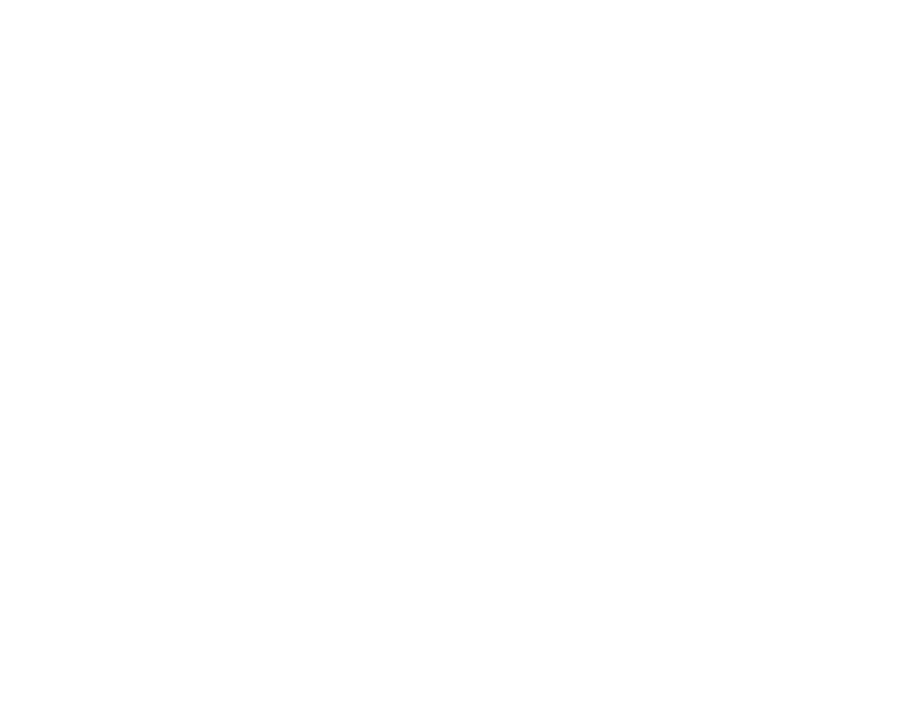

('weird', 14)
('---> elevation: deviants', [26, 55, 56, 57, 60, 73, 271, 273, 283, 318, 343, 352, 356, 366])
--- saved roi info after evaluation.
... [JC085|20190622|FOV1_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
['/n/coxfs01/2p-data/JC085/20190622/FOV1_zoom2p0x/combined_rfs10_static']
... run: combined_rfs10_static
Saving stats output to: /n/coxfs01/2p-data/JC085/20190622/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


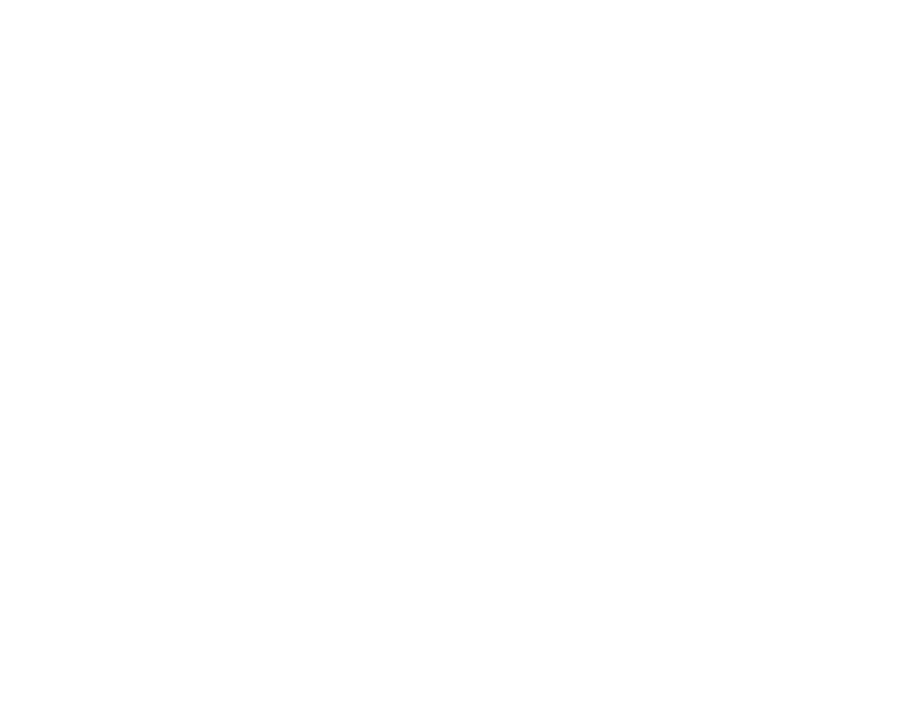

('weird', 62)
('---> azimuth: deviants', [57, 60, 66, 87, 91, 154, 245, 261, 263, 271, 310, 343])


<IPython.core.display.Javascript object>


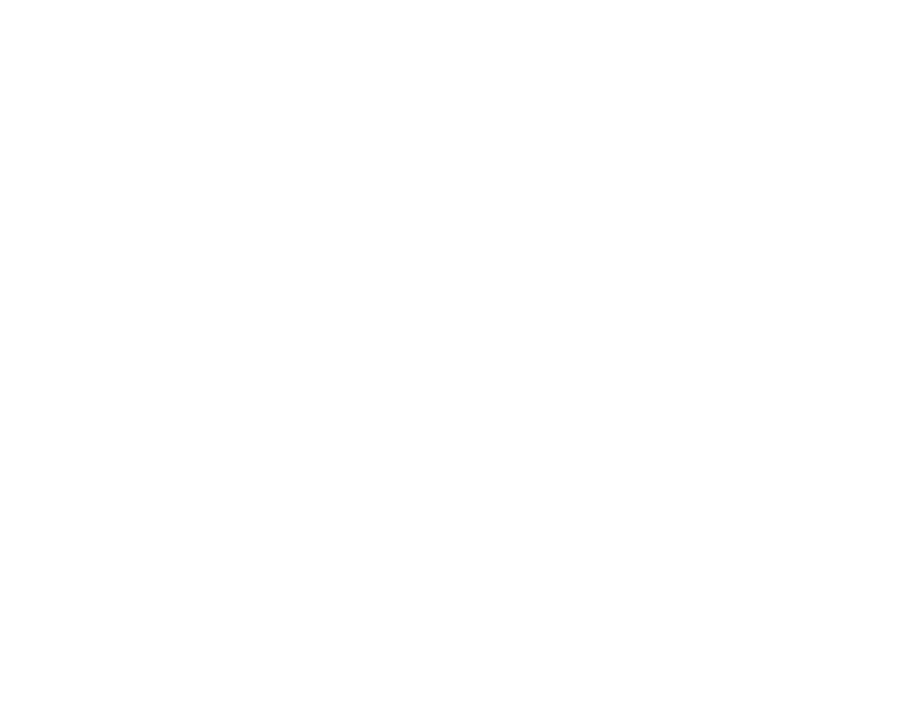

('weird', 62)
('---> elevation: deviants', [11, 38, 57, 60, 73, 91, 112, 154, 168, 214, 217, 233, 244, 259, 271, 283, 287, 310, 318, 319, 354])
--- saved roi info after evaluation.
... [JC097|20190613|FOV1_zoom2p0x] creating rfs object
... getting data paths - name: rfs
['/n/coxfs01/2p-data/JC097/20190613/FOV1_zoom2p0x/combined_rfs_static']
... run: combined_rfs_static
Saving stats output to: /n/coxfs01/2p-data/JC097/20190613/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


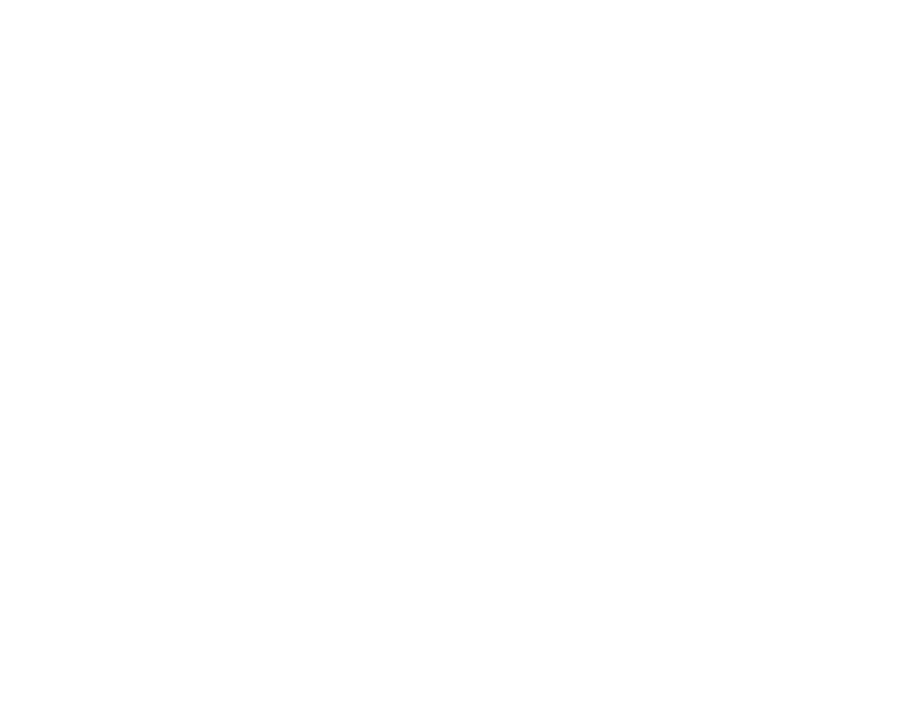

('weird', 2)
('---> azimuth: deviants', [11, 29, 37, 39, 40, 47, 49, 50, 51, 58, 64, 76, 77, 118, 160, 161, 202, 219, 221])


<IPython.core.display.Javascript object>


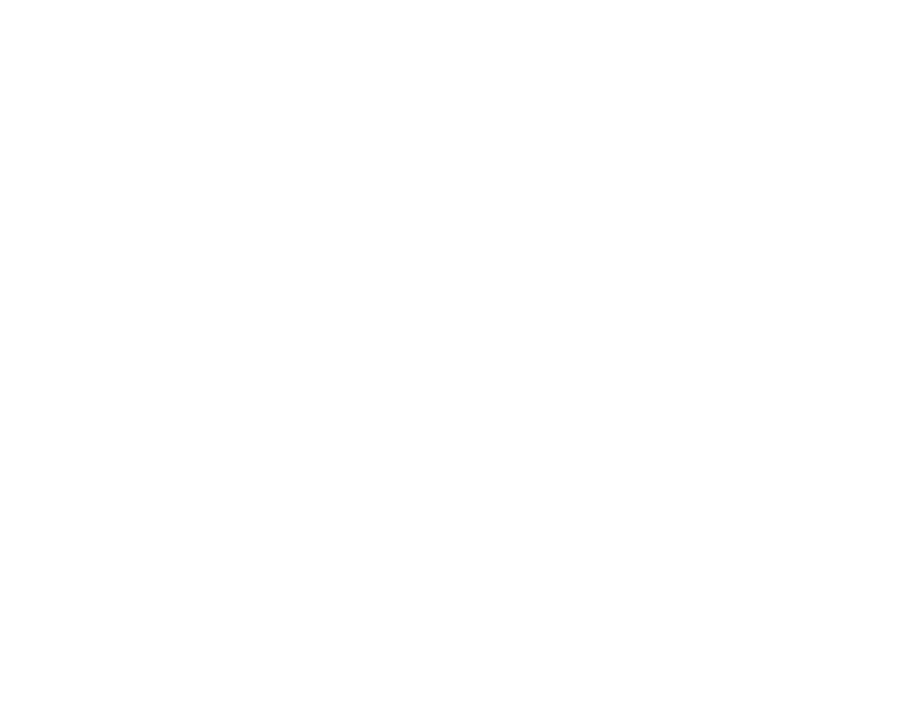

('weird', 2)
('---> elevation: deviants', [11, 17, 22, 36, 37, 39, 40, 104, 122, 125, 127, 136, 137, 143, 202, 219])
--- saved roi info after evaluation.
... [JC097|20190613|FOV1_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
['/n/coxfs01/2p-data/JC097/20190613/FOV1_zoom2p0x/combined_rfs10_static']
... run: combined_rfs10_static
Saving stats output to: /n/coxfs01/2p-data/JC097/20190613/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


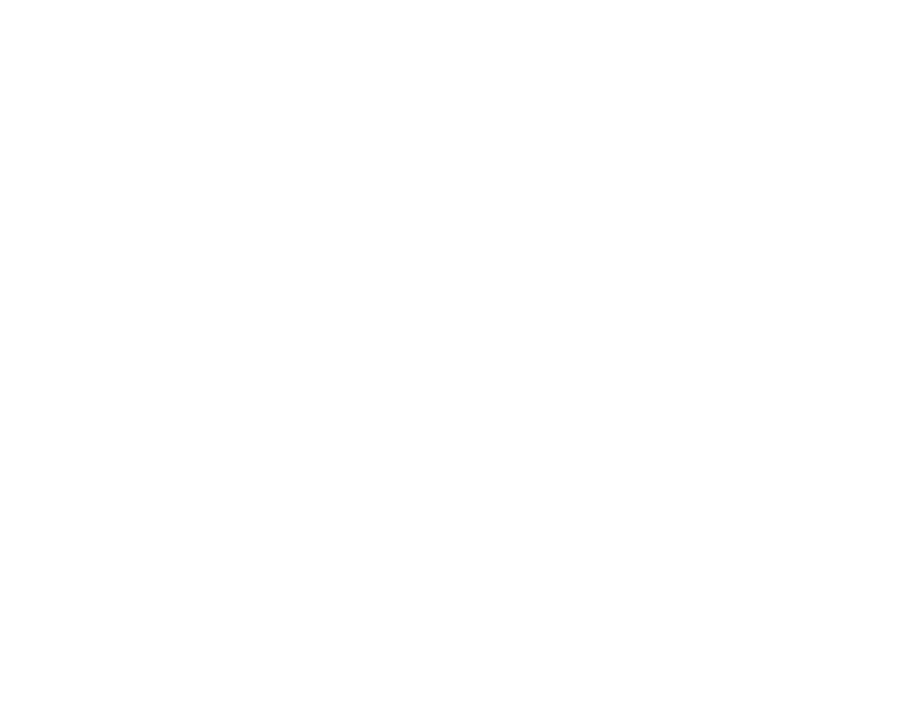

('weird', 11)
('---> azimuth: deviants', [29, 35, 47, 100, 102, 108, 118, 126, 185, 219])


<IPython.core.display.Javascript object>


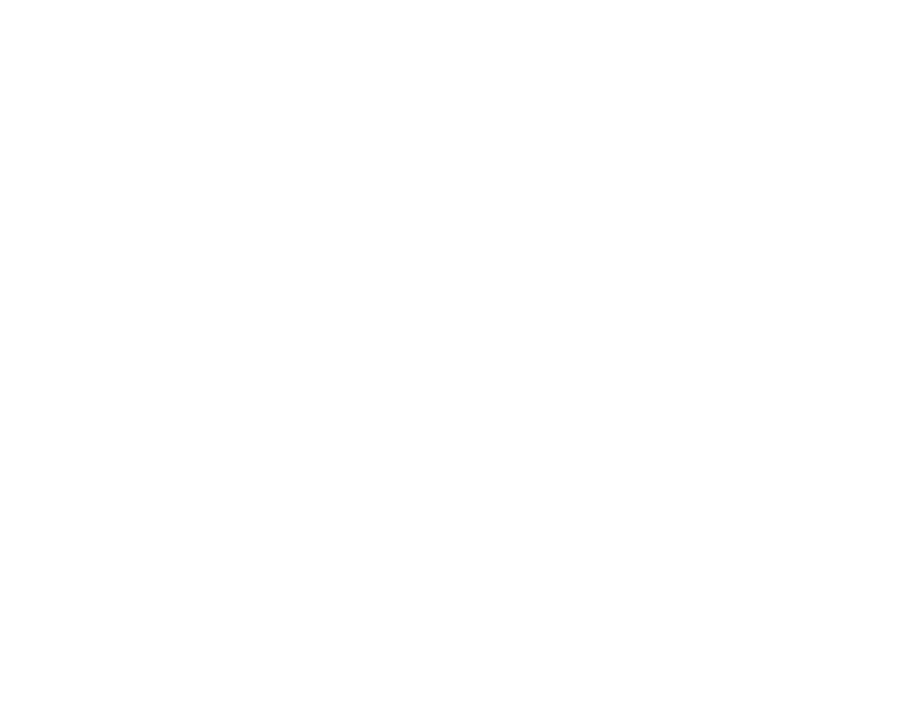

('weird', 11)
('---> elevation: deviants', [5, 8, 11, 22, 25, 35, 36, 37, 41, 42, 43, 60, 95, 127, 158, 202, 210, 211, 222, 223])
--- saved roi info after evaluation.
... [JC097|20190615|FOV1_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
... No extracted traces: rfs10
Saving stats output to: /n/coxfs01/2p-data/JC097/20190615/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... [JC097|20190615|FOV2_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
... No extracted traces: rfs10
Saving stats output to: /n/coxfs01/2p-data/JC097/20190615/FOV2_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... [JC097|20190616|FOV1_zoom2p0x] creating rfs object
... getting data paths - name: rfs
['/n/coxfs01/2p-data/JC097/20190616/FOV1_zoom2p0x/combined_rfs_static']
... run: combined_rfs_static
Saving stats output to: /n/coxfs01/2p-data/JC097/20190616/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading exist

<IPython.core.display.Javascript object>


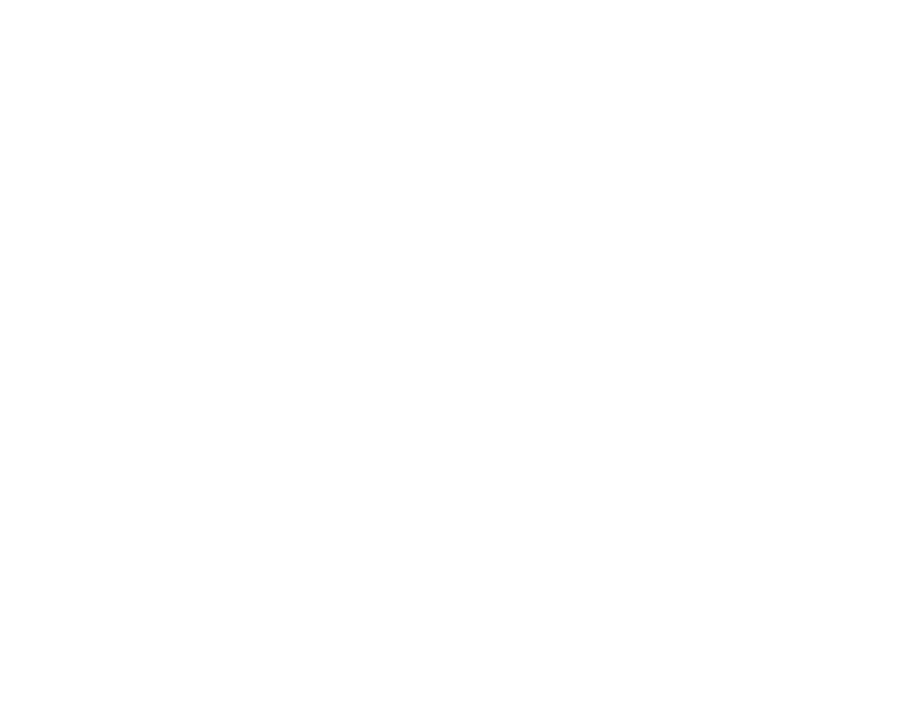

('weird', 5)
('---> azimuth: deviants', [2, 3, 10, 20, 46, 94, 117, 135, 149, 156, 207, 279, 285, 304, 315, 388, 392, 405, 417])


<IPython.core.display.Javascript object>


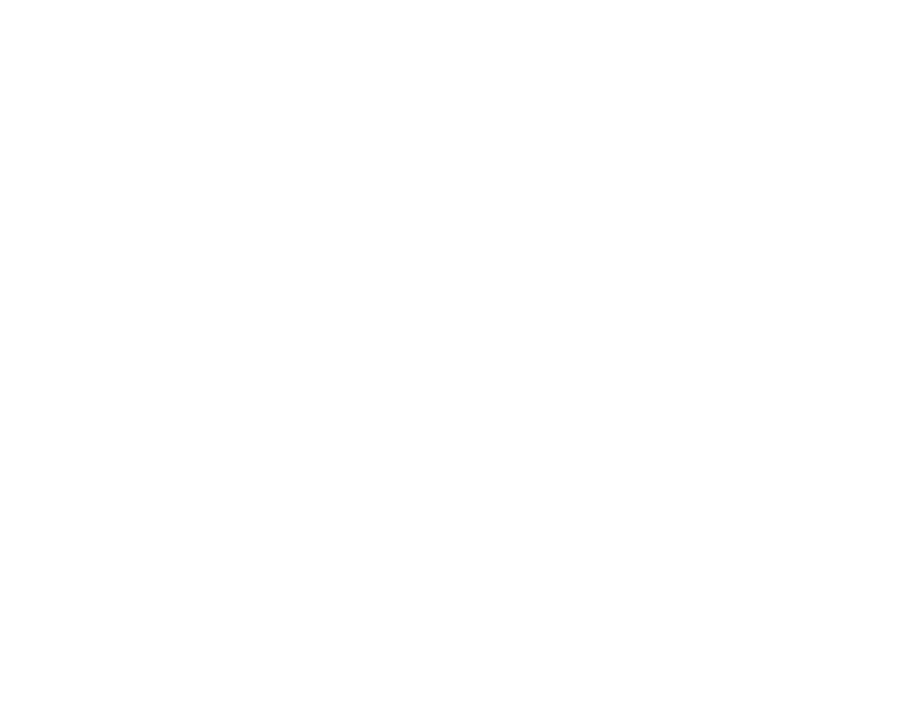

('weird', 5)
('---> elevation: deviants', [3, 10, 17, 37, 49, 117, 118, 121, 122, 139, 148, 149, 170, 171, 172, 206, 207, 279, 376, 388, 392, 405, 413, 414, 417, 418])
--- saved roi info after evaluation.
... [JC097|20190616|FOV1_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
['/n/coxfs01/2p-data/JC097/20190616/FOV1_zoom2p0x/combined_rfs10_static']
... run: combined_rfs10_static
Saving stats output to: /n/coxfs01/2p-data/JC097/20190616/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


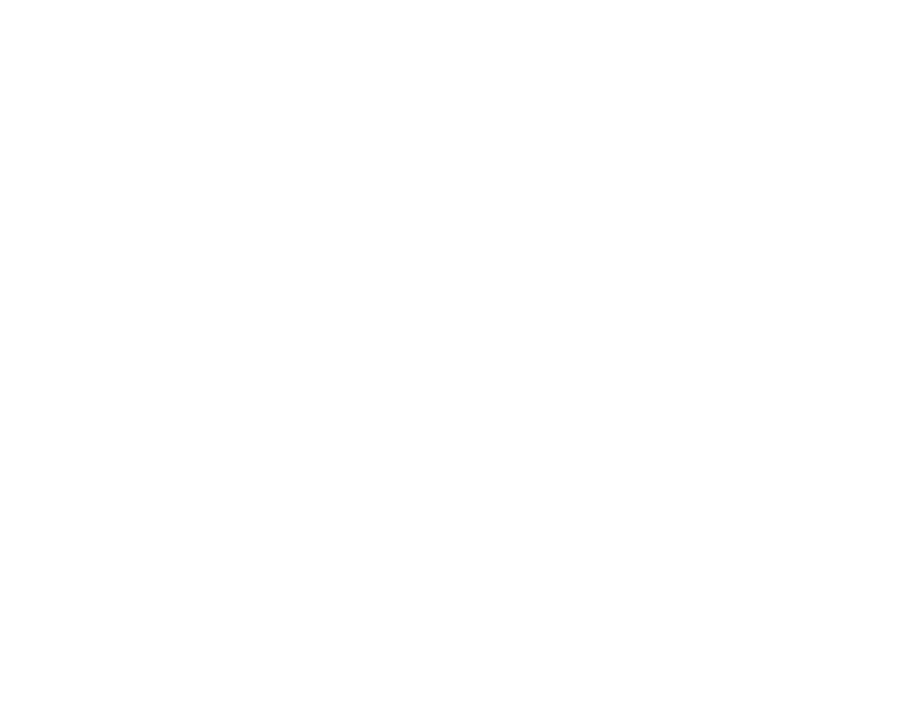

('weird', 22)
('---> azimuth: deviants', [3, 7, 50, 90, 122, 157, 173, 207, 268, 285, 376, 388, 392, 402, 405, 408, 424])


<IPython.core.display.Javascript object>


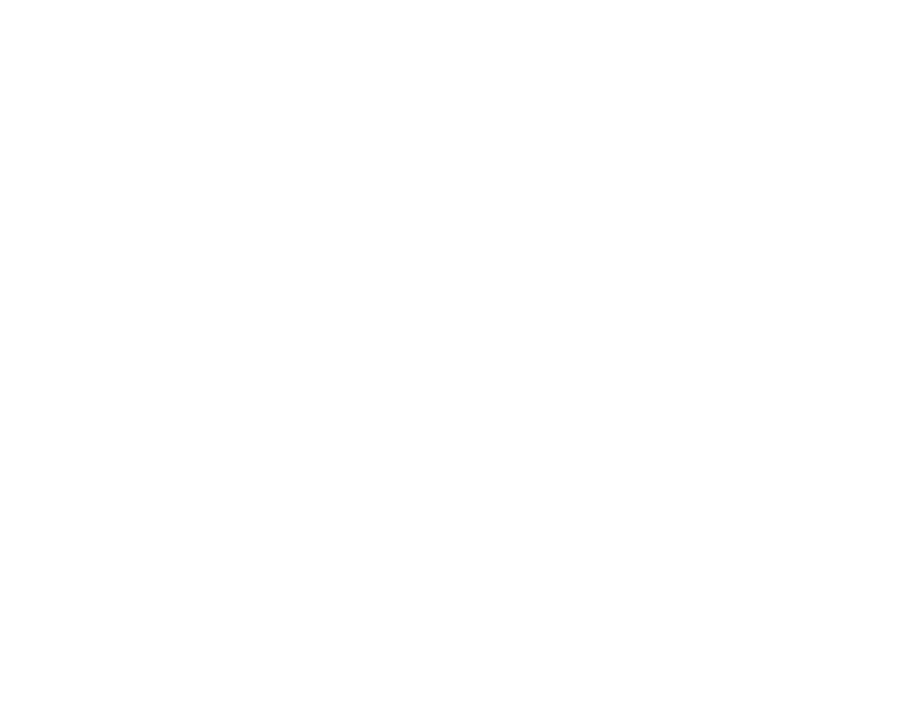

('weird', 22)
('---> elevation: deviants', [2, 3, 17, 49, 64, 68, 90, 139, 149, 152, 207, 374, 388, 392, 401, 418, 424])
--- saved roi info after evaluation.
... [JC097|20190617|FOV1_zoom2p0x] creating rfs object
... getting data paths - name: rfs
['/n/coxfs01/2p-data/JC097/20190617/FOV1_zoom2p0x/combined_rfs_static']
... run: combined_rfs_static
Saving stats output to: /n/coxfs01/2p-data/JC097/20190617/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


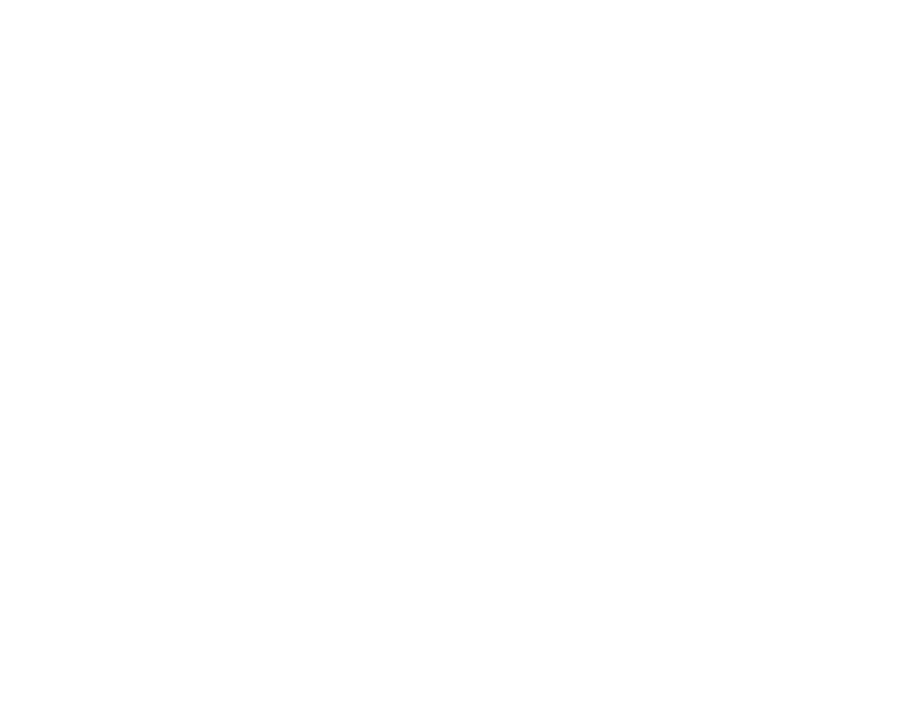

('weird', 1)
('---> azimuth: deviants', [20, 25, 26, 37, 39, 40, 43, 69, 70, 71, 73, 83, 86, 88, 98, 138, 143, 168, 206, 219, 223, 233, 247, 298, 312, 314, 339, 368, 383, 399, 434])


<IPython.core.display.Javascript object>


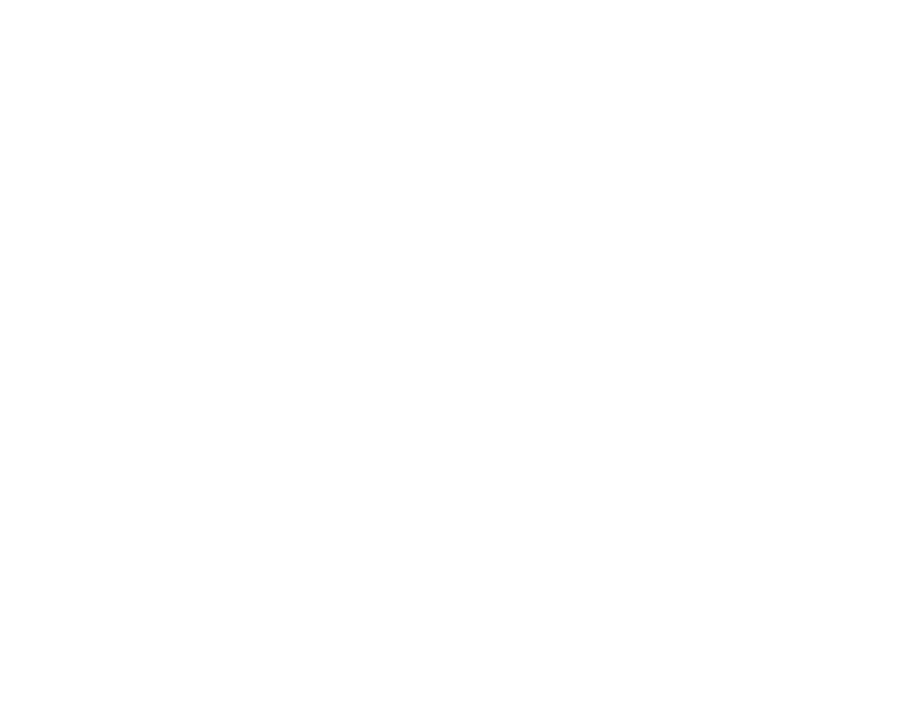

('weird', 1)
('---> elevation: deviants', [20, 25, 61, 62, 68, 69, 92, 99, 202, 220, 228, 230, 247, 249, 298, 306, 399, 414, 436])
--- saved roi info after evaluation.
... [JC110|20191004|FOV2_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
['/n/coxfs01/2p-data/JC110/20191004/FOV2_zoom2p0x/combined_rfs10_static']
... run: combined_rfs10_static
Saving stats output to: /n/coxfs01/2p-data/JC110/20191004/FOV2_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


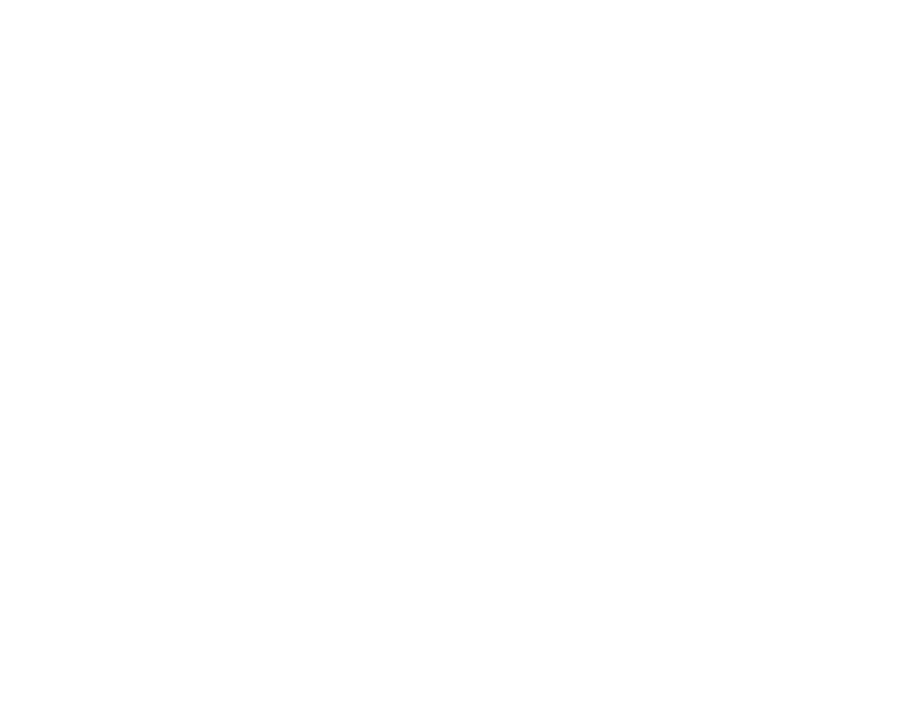

('weird', 84)
('---> azimuth: deviants', [296])


<IPython.core.display.Javascript object>


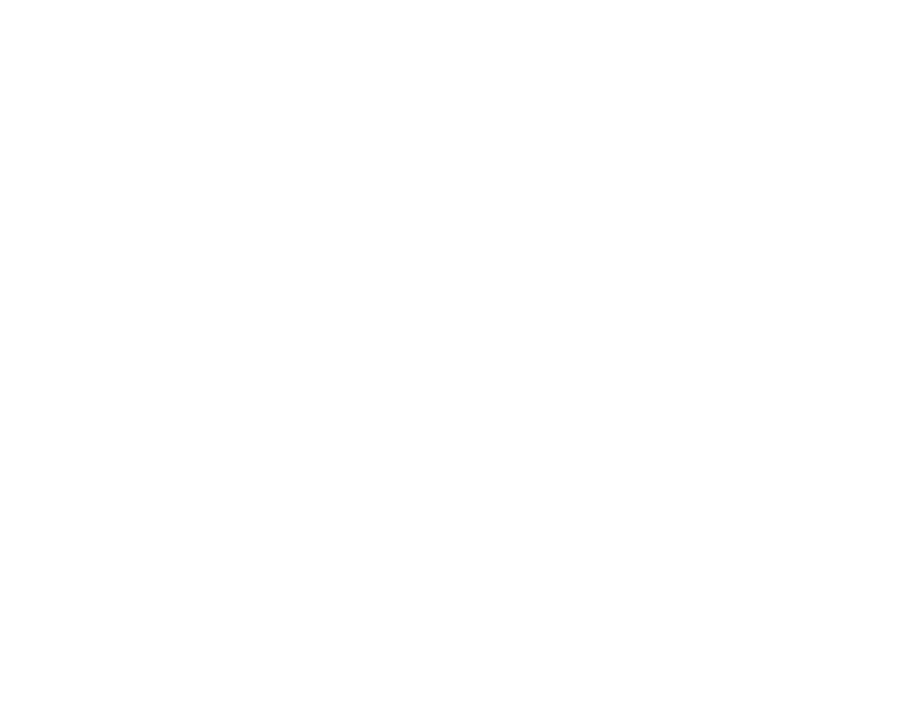

('weird', 84)
('---> elevation: deviants', [27, 42, 52, 56, 90, 220, 300])
--- saved roi info after evaluation.
... [JC110|20191006|FOV1_zoom2p0x] creating rfs object
... getting data paths - name: rfs
['/n/coxfs01/2p-data/JC110/20191006/FOV1_zoom2p0x/combined_rfs_static']
... run: combined_rfs_static
Saving stats output to: /n/coxfs01/2p-data/JC110/20191006/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


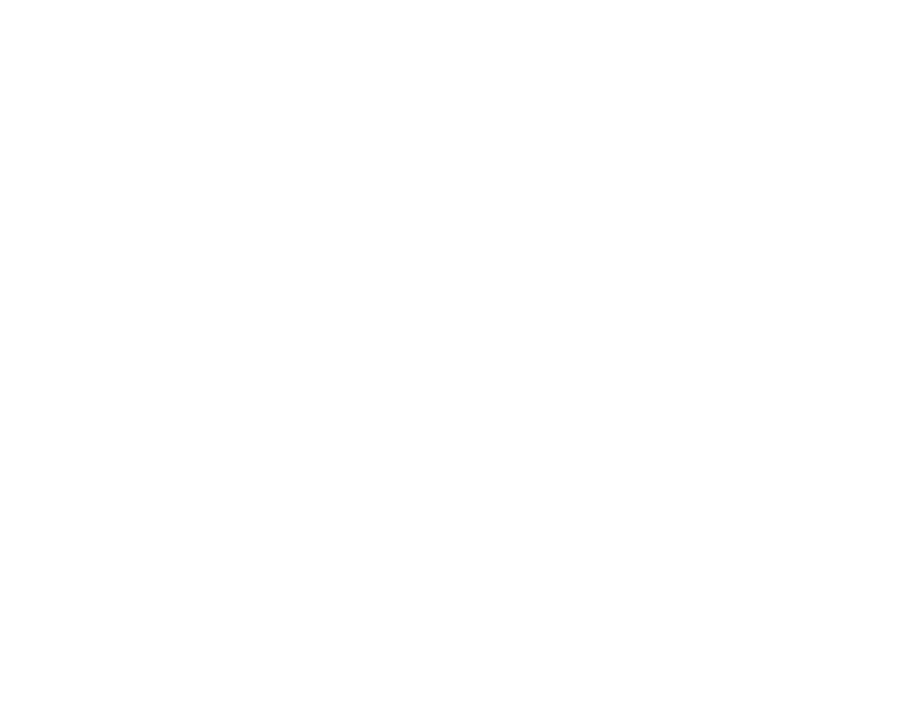

('weird', 0)
('---> azimuth: deviants', [29, 33, 79, 106, 111, 116, 132, 140, 149, 151, 188, 225, 230, 257, 281, 301, 310, 320])


<IPython.core.display.Javascript object>


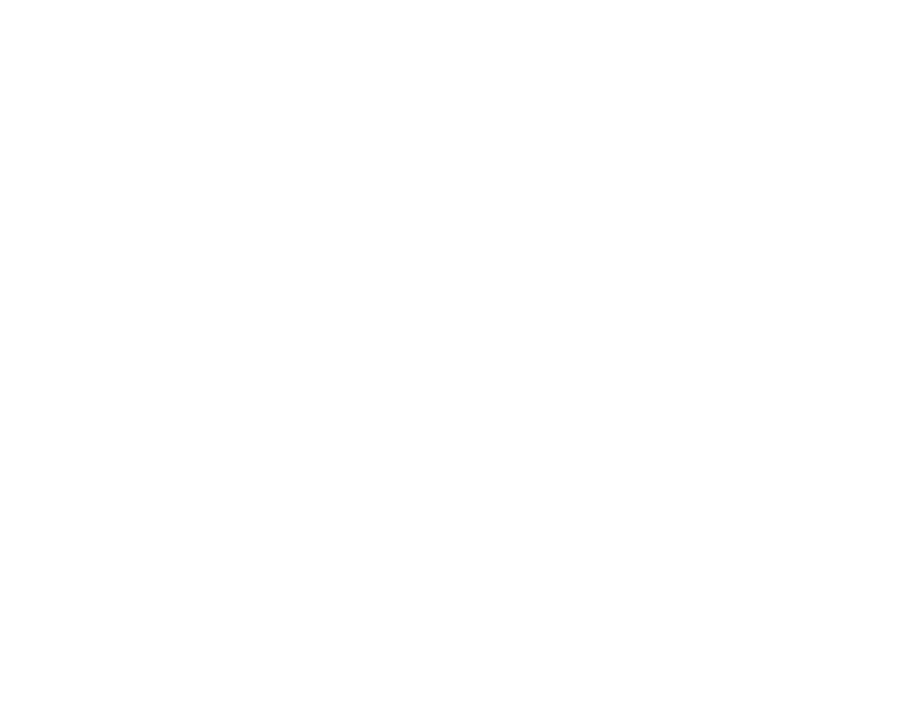

('weird', 0)
('---> elevation: deviants', [6, 29, 106, 141, 160, 188, 257, 301, 310])
--- saved roi info after evaluation.
... [JC110|20191006|FOV1_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
['/n/coxfs01/2p-data/JC110/20191006/FOV1_zoom2p0x/combined_rfs10_static']
... run: combined_rfs10_static
Saving stats output to: /n/coxfs01/2p-data/JC110/20191006/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


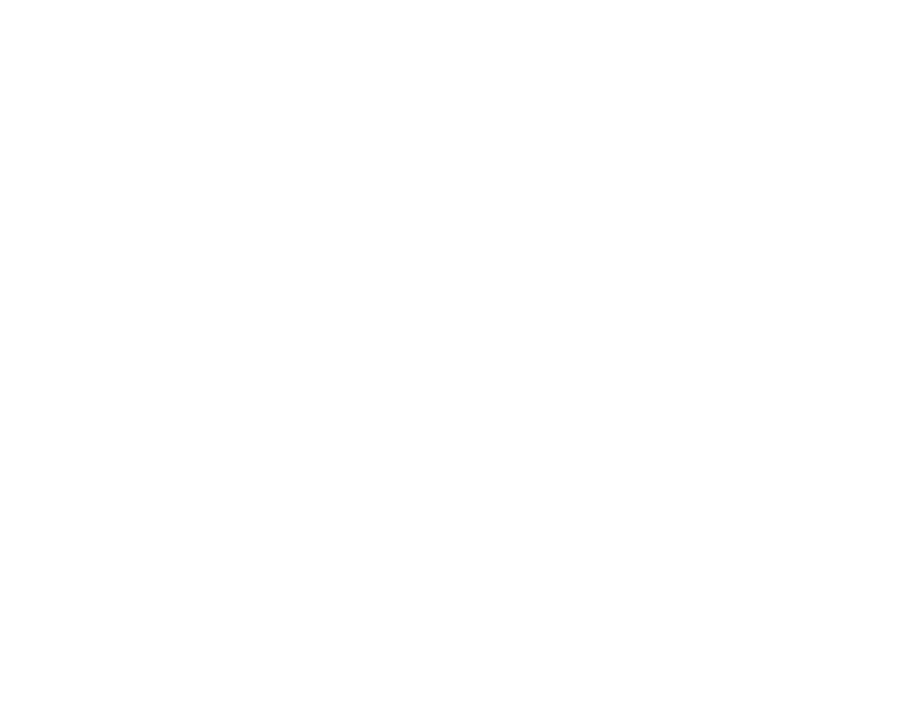

('weird', 34)
('---> azimuth: deviants', [12, 102, 104, 132, 133, 136, 140, 149, 233, 257])


<IPython.core.display.Javascript object>


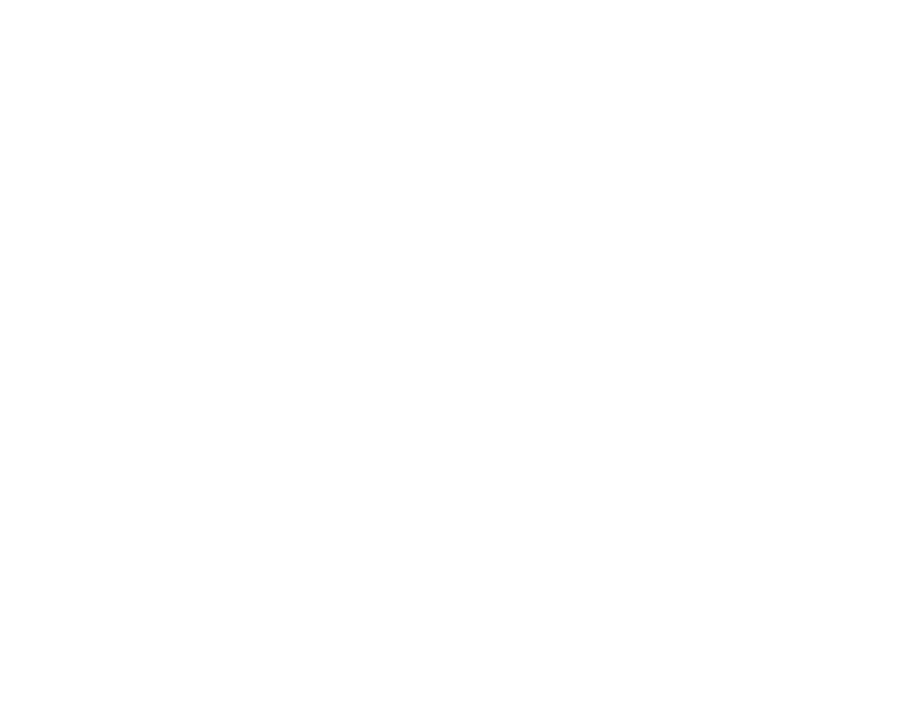

('weird', 34)
('---> elevation: deviants', [6, 11, 23, 114, 133, 194, 228, 257, 273, 384])
--- saved roi info after evaluation.
... [JC117|20191111|FOV1_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
['/n/coxfs01/2p-data/JC117/20191111/FOV1_zoom2p0x/combined_rfs10_static']
... run: combined_rfs10_static
Saving stats output to: /n/coxfs01/2p-data/JC117/20191111/FOV1_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


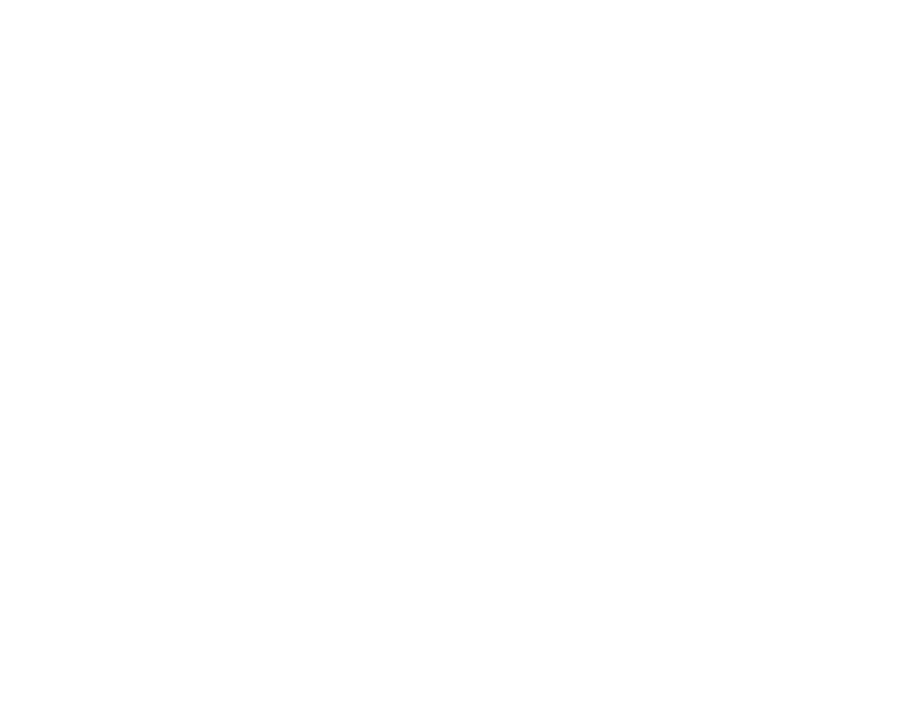

('weird', 27)
('---> azimuth: deviants', [])


<IPython.core.display.Javascript object>


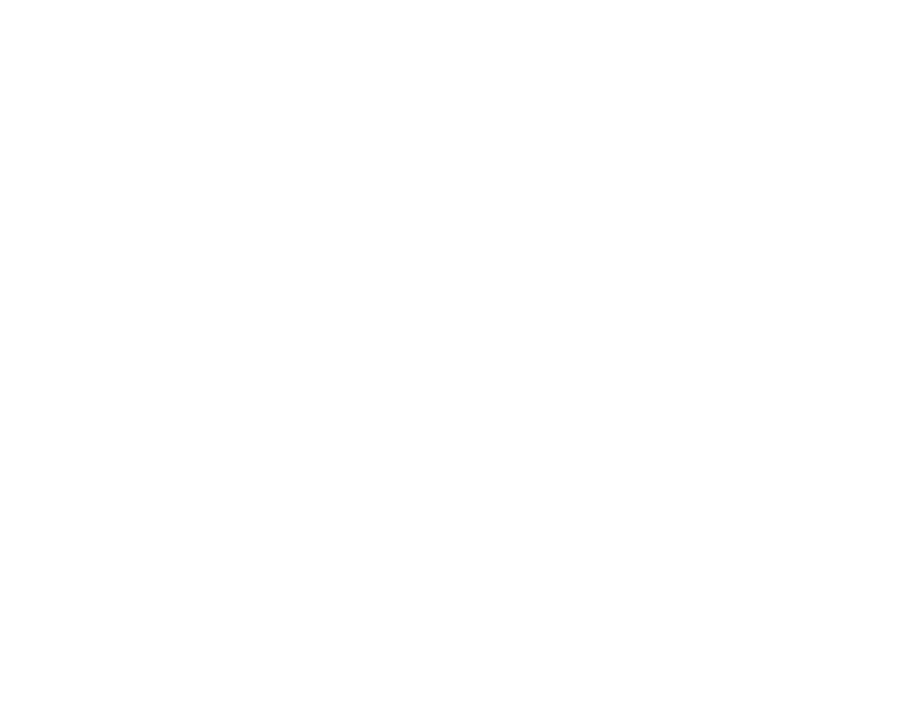

('weird', 27)
('---> elevation: deviants', [])
--- saved roi info after evaluation.
... [JC120|20191106|FOV3_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
['/n/coxfs01/2p-data/JC120/20191106/FOV3_zoom2p0x/combined_rfs10_static']
... run: combined_rfs10_static
Saving stats output to: /n/coxfs01/2p-data/JC120/20191106/FOV3_zoom2p0x/summaries/stats-traces001-corrected-dff-all
... loading existing stats
... loading existing evaluation results.


<IPython.core.display.Javascript object>


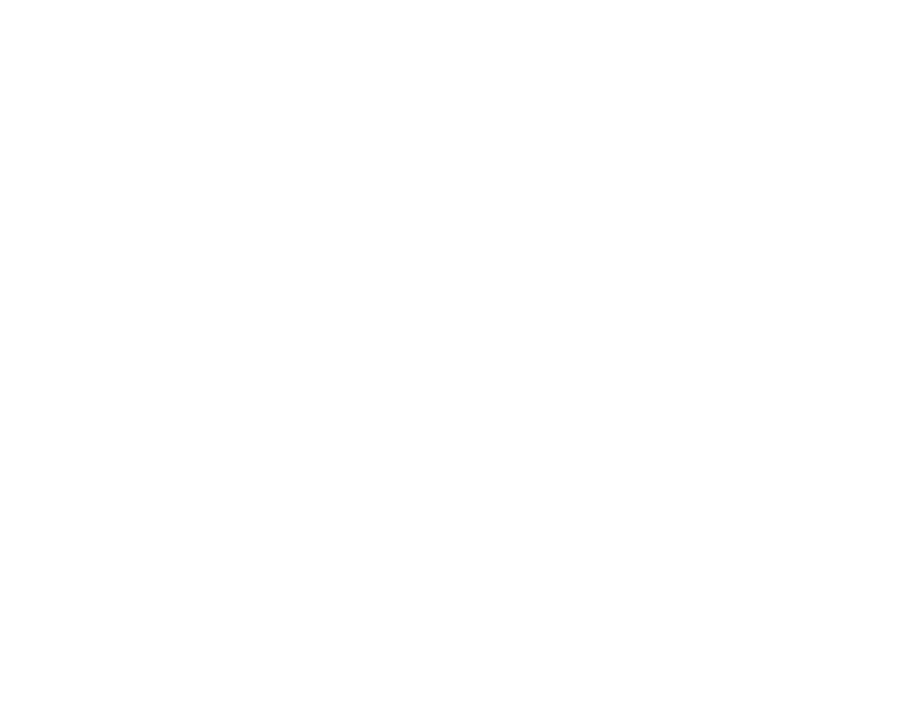

('weird', 47)
('---> azimuth: deviants', [48, 49, 66, 72, 81, 83, 125])


<IPython.core.display.Javascript object>


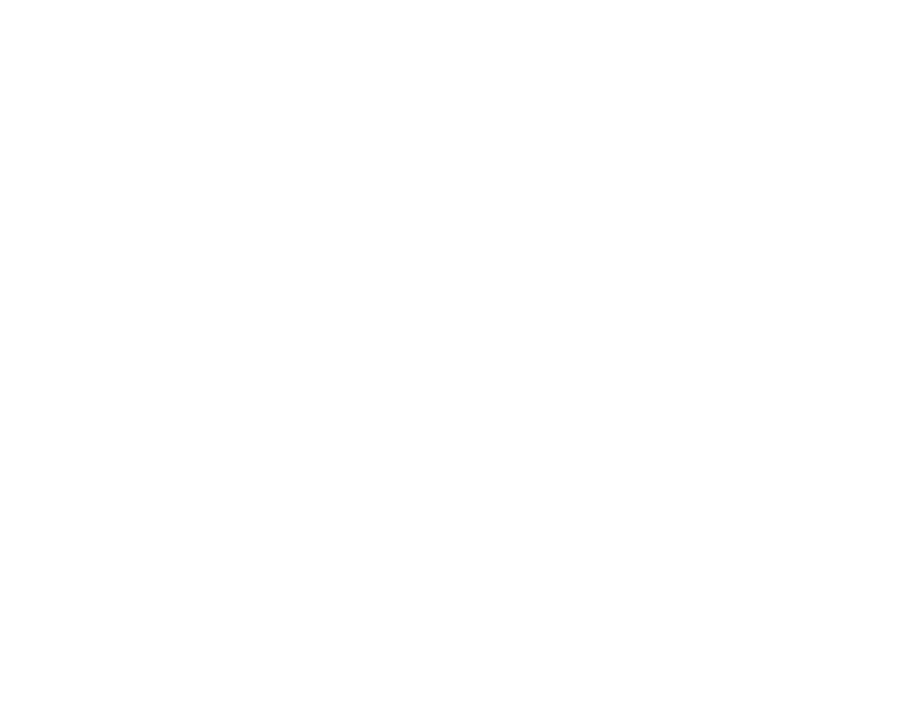

('weird', 47)
('---> elevation: deviants', [21, 42, 49, 65, 75, 147, 293])
--- saved roi info after evaluation.


In [71]:
if calculate_devs:
    fit_thr = 0.05
    sigma_scale=2.35
    ci=0.95
    n_iters = 1000
    n_resamples = 10
    d_errors= []
    devdf = []    
    for (visual_area, animalid, session, fovnum), g in dsets.groupby(['visual_area', 'animalid', 'session', 'fovnum']):
    #     if '%s-%s' % (animalid, session) in excluded_sessions:
    #         continue

        datakey = '%s_%s_fov%i' % (session, animalid, fovnum)
        fov = 'FOV%i_zoom2p0x' % fovnum

        rfnames = [r for r in g['experiment'].values if 'rf' in r]
        for rfname in rfnames:
            exp = util.ReceptiveFields(rfname, animalid, session, fov,
                                       traceid=traceid) #, trace_type='dff')
            statsdir, stats_desc = util.create_stats_dir(exp.animalid, exp.session, exp.fov,
                                                          traceid=exp.traceid, trace_type=exp.trace_type,
                                                          response_type=response_type, 
                                                          responsive_test=None, responsive_thr=0)

            if not os.path.exists(os.path.join(statsdir, 'receptive_fields')):
                os.makedirs(os.path.join(statsdir, 'receptive_fields'))
            print("Saving stats output to: %s" % statsdir)    


            #%%
            # Get output dir for stats
            try:
                estats = exp.get_stats(response_type=response_type, fit_thr=fit_thr) # estats.rois = list of all cells that pass fit-thr
            except Exception as e:
                d_errors.append(datakey)
                continue

            rfdf = estats.fits
            fovinfo = estats.fovinfo
            rois_rfs = rfdf.index.tolist()

            # Get RF dir for current fit type         
            rfdir, fit_desc = fitrf.create_rf_dir(exp.animalid, exp.session, exp.fov, exp.name, traceid=exp.traceid,
                                            response_type=response_type, fit_thr=fit_thr)

            data_identifier = '|'.join([animalid, session, fov, traceid, exp.rois, exp.trace_type, fit_desc])

            # Get bootstrap results for evaluated RFs
            bootresults = evalrfs.evaluate_rfs(estats, rfdir=rfdir, 
                                               n_bootstrap_iters=n_iters, n_resamples=n_resamples,
                                               ci=ci, sigma_scale=sigma_scale)
            if len(bootresults.keys()) == 0:
                continue
            regresults = evalrfs.compare_regr_to_boot_params(bootresults, fovinfo, statsdir=statsdir, 
                                                             data_identifier=data_identifier)

            # Identify good fits and deviants
            bad_either = np.union1d(regresults['azimuth']['bad_fits'], regresults['elevation']['bad_fits'])
            pass_rois_rfs = np.array([r for r in rois_rfs if r not in bad_either])
            deviants_either = np.union1d(regresults['azimuth']['deviants'], regresults['elevation']['deviants'])
            deviant_rois = np.intersect1d(pass_rois_rfs, deviants_either)
            #print(len(deviant_rois), len(pass_rois_rfs), len(rois_rfs), len(bad_either))

            for cond in regresults.keys():
                nsamples = len(regresults[cond]['deviants'])
                devdf.append(pd.DataFrame({'cond': [cond for _ in np.arange(0, nsamples)],
                              'deviants': regresults[cond]['deviants'],
                              'nrois': [len(pass_rois_rfs) for _ in np.arange(0, nsamples)],
                              'visual_area': [visual_area for _ in np.arange(0, nsamples)],
                             'rfname': [rfname for _ in np.arange(0, nsamples)],
                              'datakey': [datakey for _ in np.arange(0, nsamples)]}))

    devdf = pd.concat(devdf, axis=0)

    
    with open(deviants_dfile, 'wb') as f:
        pkl.dump(devdf, f, protocol=pkl.HIGHEST_PROTOCOL)
    

In [72]:
d_errors

['20190602_JC080_fov2', '20190615_JC097_fov1', '20190615_JC097_fov2']

In [59]:
excluded_sessions

['20190509_JC078',
 '20190517_JC083',
 '20190511_JC083',
 '20190609_JC099',
 '20190501_JC076',
 '20190426_JC078',
 '20190607_JC091',
 '20190506_JC080',
 '20190606_JC091',
 '20191108_JC113',
 '20190513_JC078',
 '20190504_JC078',
 '20190510_JC083',
 '20190512_JC083']

In [33]:
i=0
fraction_dev=[]
for (v, dk), g in devdf[devdf['cond']=='azimuth'].groupby(['visual_area', 'datakey']):
    if '_'.join(dk.split('_')[0:2]) in excluded_sessions:
        print dk
        continue
        
    rfname = 'rfs10' if 'rfs10' in g['rfname'].unique() else 'rfs'
    frac_dev = g[g['rfname']==rfname].shape[0] / g[g['rfname']==rfname]['nrois'].unique()[0]
    
    if 'rfs' in g['rfname'].unique() and 'rfs10' in g['rfname'].unique():
        frac_dev1 = g[g['rfname']=='rfs10'].shape[0] / g[g['rfname']=='rfs10']['nrois'].unique()[0]
        frac_dev2 = g[g['rfname']=='rfs'].shape[0] / g[g['rfname']=='rfs']['nrois'].unique()[0]
        frac_dev = np.mean([frac_dev1, frac_dev2])
    fraction_dev.append(pd.DataFrame({'visual_area': v,
                                      'datakey': dk,
                                      'fraction': frac_dev,
                                      'nrois': g[g['rfname']==rfname]['nrois'].unique()[0]}, index=[i]))
    i+=1
fraction_dev = pd.concat(fraction_dev, axis=0)
    


In [34]:
fraction_dev[['visual_area', 'datakey']].drop_duplicates().groupby(['visual_area']).count()

datakey
visual_area         
Li                15
Lm                11
V1                10

In [35]:
fraction_dev[['visual_area', 'datakey']].drop_duplicates()

visual_area              datakey
0           Li  20190502_JC076_fov1
1           Li  20190522_JC089_fov1
2           Li  20190527_JC092_fov2
3           Li  20190527_JC092_fov3
4           Li  20190602_JC091_fov1
5           Li  20190612_JC099_fov1
6           Li  20190614_JC091_fov1
7           Li  20190617_JC099_fov1
8           Li  20191007_JC091_fov1
9           Li  20191012_JC113_fov2
10          Li  20191017_JC113_fov1
11          Li  20191018_JC113_fov1
12          Li  20191104_JC117_fov1
13          Li  20191105_JC117_fov1
14          Li  20191106_JC120_fov1
15          Lm  20190423_JC076_fov1
16          Lm  20190430_JC078_fov1
17          Lm  20190508_JC083_fov1
18          Lm  20190525_JC084_fov1
19          Lm  20190603_JC080_fov1
20          Lm  20190627_JC091_fov1
21          Lm  20191004_JC110_fov3
22          Lm  20191004_JC110_fov4
23          Lm  20191012_JC113_fov3
24          Lm  20191104_JC117_fov2
25          Lm  20191106_JC120_fov4
26          V1  20190420_JC076_fov1
27          V1  20190507_JC083_fov1
28          V1  20190522_JC084_fov1
29          V1  20190613_JC097_fov1
30          V1  20190616_JC097_fov1
31          V1  20190617_JC097_fov1
32          V1  20190622_JC085_fov1
33          V1  20191004_JC110_fov2
34          V1  20191006_JC110_fov1
35          V1  20191106_JC120_fov3

In [36]:
devdf[['visual_area', 'datakey']].drop_duplicates().groupby(['visual_area']).count()

datakey
visual_area         
Li                16
Lm                11
V1                10

In [37]:
import itertools
import statsmodels as sm

def do_mannwhitney(mdf, metric='I_rs'):
    visual_areas = ['V1', 'Lm', 'Li']
    mpairs = list(itertools.combinations(visual_areas, 2))

    pvalues = []
    for mp in mpairs:
        d1 = mdf[mdf['visual_area']==mp[0]][metric]
        d2 = mdf[mdf['visual_area']==mp[1]][metric]

        # compare samples
        stat, p = spstats.mannwhitneyu(d1, d2)
        #print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            print('Same distribution (fail to reject H0)')
        else:
            print('Different distribution (reject H0)')
        pvalues.append(p)

    reject, pvals_corrected, _, _ = sm.stats.multitest.multipletests(pvalues, alpha=0.05, method='holm')
    results = []
    for mp, rej, pv in zip(mpairs, reject, pvals_corrected):
        results.append((mp, rej, pv))
    
    return results

In [38]:
results = do_mannwhitney(fraction_dev, metric='fraction')
results

Same distribution (fail to reject H0)
Same distribution (fail to reject H0)
Same distribution (fail to reject H0)


[(('V1', 'Lm'), False, 0.73211113974787212),
 (('V1', 'Li'), False, 0.73211113974787212),
 (('Lm', 'Li'), False, 0.73211113974787212)]

# Plot

In [39]:
visual_areas = ['V1', 'Lm', 'Li']
colors = ['magenta', 'orange', 'dodgerblue'] #sns.color_palette(palette='colorblind') #, n_colors=3)
area_colors = {'V1': colors[0], 'Lm': colors[1], 'Li': colors[2]}

In [40]:
def outline_boxplot(ax):
    # iterate over boxes to make them outlines only
    for i,box in enumerate(ax.artists):
        box.set_edgecolor('black')
        box.set_facecolor('white')
        # iterate over whiskers and median lines
        for j in range(6*i,6*(i+1)):
             ax.lines[j].set_color('black')
    return



In [41]:
fraction_dev

datakey  fraction  nrois visual_area
0   20190502_JC076_fov1  0.555556   18.0          Li
1   20190522_JC089_fov1  0.222222    9.0          Li
2   20190527_JC092_fov2  0.058824   17.0          Li
3   20190527_JC092_fov3  0.063830   47.0          Li
4   20190602_JC091_fov1  0.361842   84.0          Li
5   20190612_JC099_fov1  0.224490   49.0          Li
6   20190614_JC091_fov1  0.376344   93.0          Li
7   20190617_JC099_fov1  0.235294   17.0          Li
8   20191007_JC091_fov1  0.300000   20.0          Li
9   20191012_JC113_fov2  0.181818   22.0          Li
10  20191017_JC113_fov1  0.200000   10.0          Li
11  20191018_JC113_fov1  0.294118   17.0          Li
12  20191104_JC117_fov1  0.177778   45.0          Li
13  20191105_JC117_fov1  0.416667   12.0          Li
14  20191106_JC120_fov1  0.025641   39.0          Li
15  20190423_JC076_fov1  0.200000   15.0          Lm
16  20190430_JC078_fov1  0.302326   43.0          Lm
17  20190508_JC083_fov1  0.426230   61.0          Lm
18  20190525_JC084_fov1  0.421053   38.0          Lm
19  20190603_JC080_fov1  0.352941   51.0          Lm
20  20190627_JC091_fov1  0.333333   12.0          Lm
21  20191004_JC110_fov3  0.025000   40.0          Lm
22  20191004_JC110_fov4  0.243902   41.0          Lm
23  20191012_JC113_fov3  0.125000   40.0          Lm
24  20191104_JC117_fov2  0.111111   72.0          Lm
25  20191106_JC120_fov4  0.064516   31.0          Lm
26  20190420_JC076_fov1  0.319149   47.0          V1
27  20190507_JC083_fov1  0.307692   52.0          V1
28  20190522_JC084_fov1  0.241379  145.0          V1
29  20190613_JC097_fov1  0.161483  111.0          V1
30  20190616_JC097_fov1  0.177132  120.0          V1
31  20190617_JC097_fov1  0.389610   77.0          V1
32  20190622_JC085_fov1  0.162063  149.0          V1
33  20191004_JC110_fov2  0.016949  118.0          V1
34  20191006_JC110_fov1  0.211568   92.0          V1
35  20191106_JC120_fov3  0.085366   82.0          V1

<IPython.core.display.Javascript object>


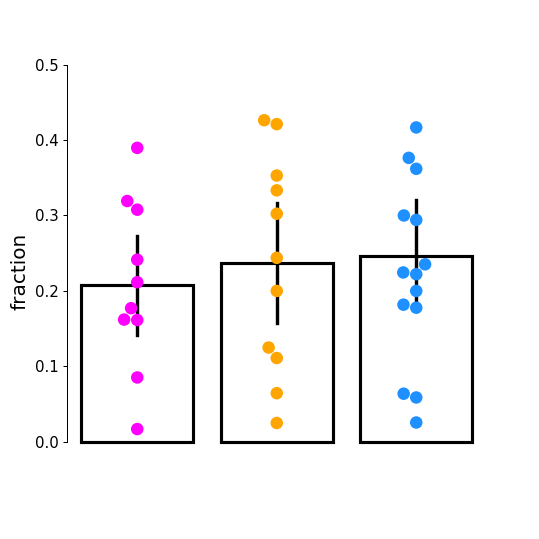

[]

In [67]:
fig, ax = pl.subplots(figsize=(6,6))
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

sns.barplot("visual_area", "fraction", data=fraction_dev, ax=ax, order=visual_areas,
                 errcolor="k", edgecolor=('k', 'k', 'k'), facecolor=(1,1,1,0), linewidth=2.5)
 

sns.swarmplot(x='visual_area', y='fraction', data=fraction_dev, ax=ax, 
              palette=area_colors, s=10, marker='o', order=visual_areas) #palette=area_colors)

ax.set_ylim([-0.05, 0.501])
sns.despine(bottom=True, trim=True)
ax.tick_params(which='both', axis='x', length=0)
ax.set_xlabel('')
ax.set_xticklabels('')

In [68]:
c1 = fraction_dev[fraction_dev['visual_area']=='V1']['fraction'].values
c2 = fraction_dev[fraction_dev['visual_area']=='Lm']['fraction'].values
c3 = fraction_dev[fraction_dev['visual_area']=='Li']['fraction'].values

# Shapiro-Wilk normality test 
print(spstats.shapiro(c1), spstats.shapiro(c2), spstats.shapiro(c3) )

# Levene variance test  
print(spstats.levene(c1, c2, c3))


F, p = spstats.f_oneway(c1, c2, c3)
print('F statistic = {:5.3f} and probability p = {:5.3f}'.format(F, p)) 

scores = np.hstack([c1, c2, c3])
groups = np.hstack([['V1' for _ in range(len(c1))], 
                   ['Lm' for _ in range(len(c2))],
                   ['Li' for _ in range(len(c3))]])
print(scores.shape)
print(groups.shape)

scores = np.hstack([c1, c2, c3])
groups = np.hstack([['V1' for _ in range(len(c1))], 
                   ['Lm' for _ in range(len(c2))],
                   ['Li' for _ in range(len(c3))]])
print(scores.shape)
print(groups.shape)

import statsmodels.stats.multicomp as ml

# Note that data in sheet have been preformatted in Group and Score columns 
# Boolean values refer to whether we should reject the null hypothesis (H0) that
# the means of the tested pair are statistically similar (non-significant differences)

mcobj = ml.MultiComparison(scores, groups)
out = mcobj.tukeyhsd(0.05) 

print(out)

((0.8487786650657654, 0.11977595835924149), (0.9239419102668762, 0.53419429063797), (0.9144755601882935, 0.34846773743629456))
LeveneResult(statistic=0.24429693589774573, pvalue=0.78567766716464793)
F statistic = 3.436 and probability p = 0.053
(22,)
(22,)
(22,)
(22,)
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  Li     Lm    0.0877  -0.0344  0.2098 False 
  Li     V1   -0.0435  -0.1603  0.0732 False 
  Lm     V1   -0.1312  -0.2601 -0.0023  True 
---------------------------------------------


In [97]:
ax = sns.boxplot(x="visual_area", y="fraction", data=fraction_dev, 
                 palette=area_colors, ax=ax, order=visual_areas) #, alpha=0.7) #,\
                 #notch=True, bootstrap=10000)

<IPython.core.display.Javascript object>


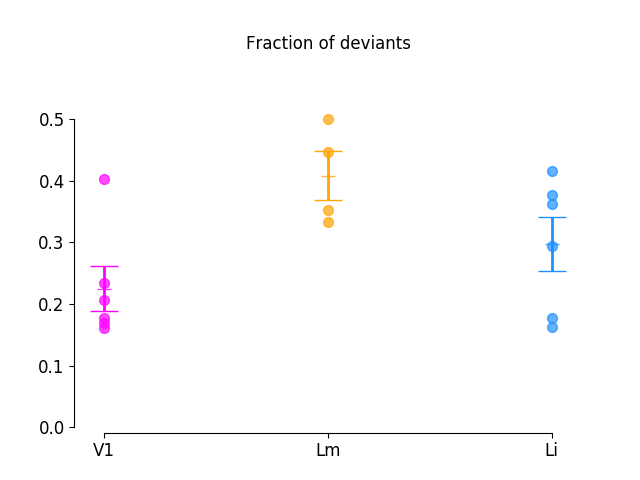

Text(0.5,1,u'Fraction of deviants')

In [60]:
fig, ax = pl.subplots()
vi = 0
for visual_area in visual_areas:
    g = fraction_dev[fraction_dev['visual_area']==visual_area]
    values = g['fraction'].values
    ax.scatter([vi for _ in range(len(values))], values,  marker='o', alpha=0.7, s=50,
               color=area_colors[visual_area])
              #edgecolor=area_colors[visual_area], facecolor='none')
        
    ax.plot(vi, values.mean(), marker='_', color=area_colors[visual_area], linewidth=2, markersize=10, alpha=0.8)
    ax.errorbar(vi, values.mean(), yerr=spstats.sem(values), ecolor=area_colors[visual_area], capsize=10, lw=2)
    #sns.boxplot(x=[vi for _ in range(len(values))], y=values, color=area_colors[visual_area])
    vi += 1
ax.set_ylim([0, .6])

ax.set_xticks([0, 1, 2])
ax.set_xticklabels(visual_areas)
sns.despine(ax=ax, trim=True, offset=4)

ax.set_title("Fraction of deviants")

#pl.savefig(os.path.join(outdir, 'fraction_deviants.svg'))

# Plot 1 fov

In [ ]:
        exp = util.ReceptiveFields(rfname, animalid, session, fov,
                                   traceid=traceid) #, trace_type='dff')
        statsdir, stats_desc = util.create_stats_dir(exp.animalid, exp.session, exp.fov,
                                                      traceid=exp.traceid, trace_type=exp.trace_type,
                                                      response_type=response_type, 
                                                      responsive_test=None, responsive_thr=0)

        if not os.path.exists(os.path.join(statsdir, 'receptive_fields')):
            os.makedirs(os.path.join(statsdir, 'receptive_fields'))
        print("Saving stats output to: %s" % statsdir)    


        #%%
        # Get output dir for stats
        try:
            estats = exp.get_stats(response_type=response_type, fit_thr=fit_thr) # estats.rois = list of all cells that pass fit-thr
        except Exception as e:
            d_errors.append(datakey)
            continue
            
        rfdf = estats.fits
        fovinfo = estats.fovinfo
        rois_rfs = rfdf.index.tolist()

        # Get RF dir for current fit type         
        rfdir, fit_desc = fitrf.create_rf_dir(exp.animalid, exp.session, exp.fov, exp.name, traceid=exp.traceid,
                                        response_type=response_type, fit_thr=fit_thr)

        data_identifier = '|'.join([animalid, session, fov, traceid, exp.rois, exp.trace_type, fit_desc])

        # Get bootstrap results for evaluated RFs
        bootresults = evalrfs.evaluate_rfs(estats, rfdir=rfdir, 
                                           n_bootstrap_iters=n_iters, n_resamples=n_resamples,
                                           ci=ci, sigma_scale=sigma_scale)

<IPython.core.display.Javascript object>


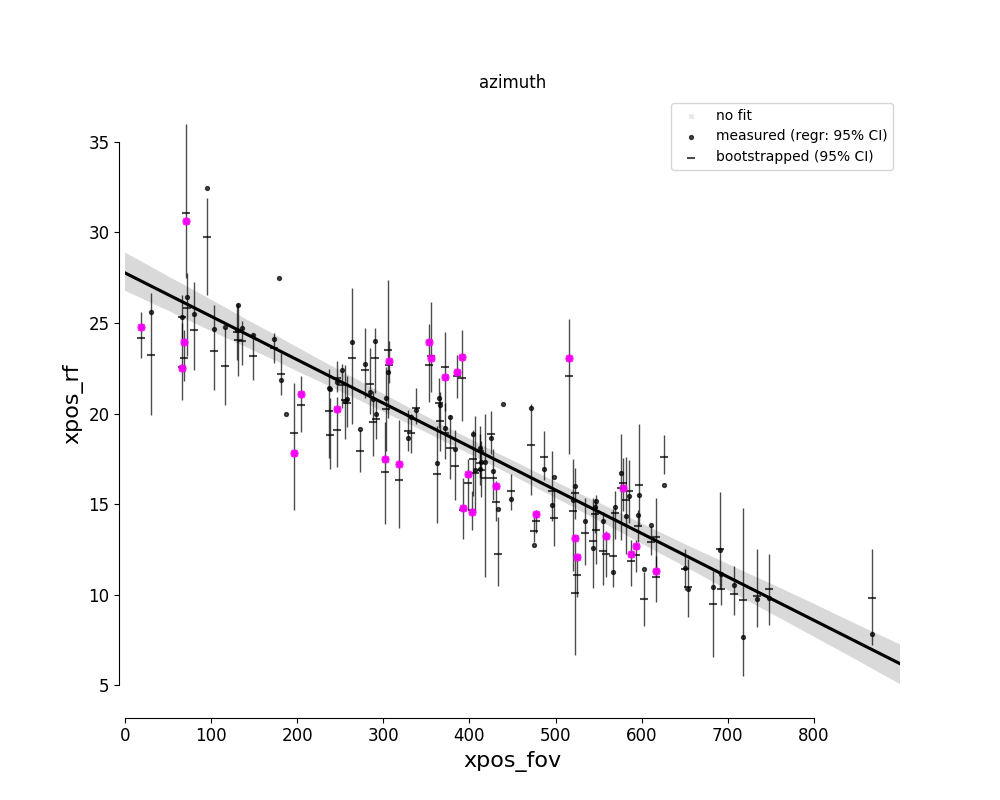

3


In [158]:
#### Calculate scatter

bootdata = bootresults['data']
bootcis = bootresults['cis']

x0_lower = bootcis['%s_lower' % parname][roi_list]
x0_upper = bootcis['%s_upper' % parname][roi_list]
for 
bootcis['x0_upper'] - bootcis['x0_lower']
    
posdf = fovinfo['positions']
xlim, ylim = fovinfo['xlim'], fovinfo['ylim']

#% # Plot bootstrapped param CIs + regression CI
xaxis_lim = max([xlim, ylim])
regresults={}


cond = 'azimuth'
fig, regr_cis, deviants, bad_fits = do_regr_on_fov(bootdata, bootcis, posdf, cond=cond, xaxis_lim=900)


In [159]:
outliers


[0,
 5,
 12,
 21,
 25,
 36,
 43,
 69,
 70,
 78,
 91,
 93,
 97,
 101,
 112,
 134,
 142,
 147,
 148,
 150,
 155,
 165,
 166,
 168,
 194,
 205,
 216,
 234]

## Compare gratings

In [161]:
fovdir = os.path.join(rootdir, animalid, session, 'FOV%i_zoom2p0x' % fovnum)
osi_niters = 1000
osi_nsamples = 20

osi_str = 'fit-dff_all-cells_boot-%i-resample-%i' % (osi_niters, osi_nsamples)
osi_dir = glob.glob(os.path.join(fovdir, 'combined_gratings_static', 'traces', '%s*' % traceid, 'tuning', osi_str))[0]

os.listdir(osi_dir)

osi_eval_dfile = os.path.join(osi_dir, 'tuning_bootstrap_evaluation.pkl')
assert os.path.exists(osi_eval_dfile), "No evaulation found! %s" % osi_dir
with open(osi_eval_dfile, 'rb') as f:
    osi_eval = pkl.load(f)


In [162]:
osi_thr = 0.6
osi_mean_iters = osi_eval['fits'].groupby(['cell']).mean()
osi_fits = osi_mean_iters[osi_mean_iters['gof']>=osi_thr]
rois_osi = osi_fits.index.tolist()
print(len(rois_osi))

82


In [164]:
matched_rois = [r for r in rois_osi if r in outliers]
matched_rois

[5, 12, 21, 25, 91, 93, 112, 142, 147, 148, 166, 205, 216]

In [ ]:
osis_with_rfs = [r for r in roi_osi if r in ]

In [166]:
len(matched_rois) / float(len(rois_osi))


0.15853658536585366

In [48]:
estats.fovinfo.keys()

['roi_contours', 'positions', 'zimg', 'ylim', 'xlim']

In [21]:
rfdata[rfdata['animalid']=='JC080']

index animalid experiment            fov   session visual_area  exp_no  \
25     95    JC080        rfs  FOV1_zoom2p0x  20190603          Lm       3   
26    103    JC080      rfs10  FOV2_zoom2p0x  20190602          Lm       4   
27    105    JC080      rfs10  FOV1_zoom2p0x  20190602          Li       4   

    animal_no                                               path  
25          2  /n/coxfs01/2p-data/JC080/20190603/FOV1_zoom2p0...  
26          2  /n/coxfs01/2p-data/JC080/20190602/FOV2_zoom2p0...  
27          2  /n/coxfs01/2p-data/JC080/20190602/FOV1_zoom2p0...

In [22]:
missing_rfs = []
dlist = []
for (visual_area, animalid, session, fov), g in rfdata.groupby(['visual_area', 'animalid', 'session', 'fov']):
    skey = '-'.join([visual_area, animalid, session, fov])
    #print skey
    devpath = os.path.join( os.path.split(g['path'].values[0])[0], 'evaluation', 'deviants.json')
    if not os.path.exists(devpath):
        missing_rfs.append(devpath)
        continue
    else:
        with open(devpath, 'r') as f:
            d = json.load(f)

    dev_list = [('azimuth', i) for i in d['azimuth']]
    dev_list.extend( [('elevation', i) for i in d['elevation']] )
    dev_list.extend([('pass', i) for i in d['pass_rois']])
    tmpd = pd.DataFrame({'condition': [c[0] for c in dev_list],
                         'cell': [c[1] for c in dev_list],
                         'visual_area': [visual_area for _ in range(len(dev_list))],
                         'animalid': [animalid for _ in range(len(dev_list))],
                         'session': [session for _ in range(len(dev_list))],
                         'fov': [fov for _ in range(len(dev_list))]})
    
    dlist.append(tmpd)
    

In [23]:
print(len(missing_rfs))

1


In [24]:
for f in missing_rfs:
    print f.split('/traces/')[0]

/n/coxfs01/2p-data/JC080/20190602/FOV1_zoom2p0x/combined_rfs10_static


In [25]:
print(len(dlist))

25


In [26]:
df = pd.concat(dlist, axis=0).reset_index(drop=True)


In [27]:
df.groupby(['visual_area', 'condition']).count()['cell']

visual_area  condition
Li           azimuth      120
             elevation     93
             pass         165
Lm           azimuth      144
             elevation    139
             pass         238
V1           azimuth      190
             elevation    167
             pass         611
Name: cell, dtype: int64

In [28]:
visual_areas = ['V1', 'Lm', 'Li']
colors = ['k', 'royalblue', 'darkorange'] #sns.color_palette(palette='colorblind') #, n_colors=3)
area_colors = {'V1': colors[0], 'Lm': colors[1], 'Li': colors[2]}

In [29]:
df['ratio'] = [0 for _ in range(df.shape[0])]

In [30]:
#ratios = dict((visual_area, {'azimuth': [], 'elevation': []}) for visual_area in visual_areas)
for condition in ['azimuth', 'elevation']:
    for k, g in df.groupby(['visual_area', 'animalid', 'session', 'fov']):
        npass = len(g[g['condition']=='pass'])
        nbad = len(g[g['condition']==condition])
        frac = float(nbad)/npass
        df.loc[g.index, 'ratio'] = [frac for _ in range(g.shape[0])]
        #g['fraction'] = [frac for _ in range(g.shape[0])]
        
        #ratios[k[0]][condition].append(float(nbad)/npass)
        
        

In [31]:
df

animalid  cell  condition            fov   session visual_area     ratio
0       JC076     7    azimuth  FOV1_zoom2p0x  20190502          Li  0.300000
1       JC076    11    azimuth  FOV1_zoom2p0x  20190502          Li  0.300000
2       JC076   120    azimuth  FOV1_zoom2p0x  20190502          Li  0.300000
3       JC076   135    azimuth  FOV1_zoom2p0x  20190502          Li  0.300000
4       JC076   176    azimuth  FOV1_zoom2p0x  20190502          Li  0.300000
5       JC076   177    azimuth  FOV1_zoom2p0x  20190502          Li  0.300000
6       JC076   179    azimuth  FOV1_zoom2p0x  20190502          Li  0.300000
7       JC076   181    azimuth  FOV1_zoom2p0x  20190502          Li  0.300000
8       JC076   187    azimuth  FOV1_zoom2p0x  20190502          Li  0.300000
9       JC076   196    azimuth  FOV1_zoom2p0x  20190502          Li  0.300000
10      JC076   135  elevation  FOV1_zoom2p0x  20190502          Li  0.300000
11      JC076   179  elevation  FOV1_zoom2p0x  20190502          Li  0.300000
12      JC076   196  elevation  FOV1_zoom2p0x  20190502          Li  0.300000
13      JC076     0       pass  FOV1_zoom2p0x  20190502          Li  0.300000
14      JC076   107       pass  FOV1_zoom2p0x  20190502          Li  0.300000
15      JC076   114       pass  FOV1_zoom2p0x  20190502          Li  0.300000
16      JC076   143       pass  FOV1_zoom2p0x  20190502          Li  0.300000
17      JC076   169       pass  FOV1_zoom2p0x  20190502          Li  0.300000
18      JC076   185       pass  FOV1_zoom2p0x  20190502          Li  0.300000
19      JC076   186       pass  FOV1_zoom2p0x  20190502          Li  0.300000
20      JC076   192       pass  FOV1_zoom2p0x  20190502          Li  0.300000
21      JC076   202       pass  FOV1_zoom2p0x  20190502          Li  0.300000
22      JC076   213       pass  FOV1_zoom2p0x  20190502          Li  0.300000
23      JC090   194    azimuth  FOV1_zoom2p0x  20190605          Li  0.083333
24      JC090    13  elevation  FOV1_zoom2p0x  20190605          Li  0.083333
25      JC090    13       pass  FOV1_zoom2p0x  20190605          Li  0.083333
26      JC090    17       pass  FOV1_zoom2p0x  20190605          Li  0.083333
27      JC090    53       pass  FOV1_zoom2p0x  20190605          Li  0.083333
28      JC090    59       pass  FOV1_zoom2p0x  20190605          Li  0.083333
29      JC090   140       pass  FOV1_zoom2p0x  20190605          Li  0.083333
...       ...   ...        ...            ...       ...         ...       ...
1837    JC097    99       pass  FOV1_zoom2p0x  20190617          V1  0.446809
1838    JC097   107       pass  FOV1_zoom2p0x  20190617          V1  0.446809
1839    JC097   162       pass  FOV1_zoom2p0x  20190617          V1  0.446809
1840    JC097   182       pass  FOV1_zoom2p0x  20190617          V1  0.446809
1841    JC097   183       pass  FOV1_zoom2p0x  20190617          V1  0.446809
1842    JC097   191       pass  FOV1_zoom2p0x  20190617          V1  0.446809
1843    JC097   192       pass  FOV1_zoom2p0x  20190617          V1  0.446809
1844    JC097   199       pass  FOV1_zoom2p0x  20190617          V1  0.446809
1845    JC097   202       pass  FOV1_zoom2p0x  20190617          V1  0.446809
1846    JC097   203       pass  FOV1_zoom2p0x  20190617          V1  0.446809
1847    JC097   215       pass  FOV1_zoom2p0x  20190617          V1  0.446809
1848    JC097   216       pass  FOV1_zoom2p0x  20190617          V1  0.446809
1849    JC097   220       pass  FOV1_zoom2p0x  20190617          V1  0.446809
1850    JC097   222       pass  FOV1_zoom2p0x  20190617          V1  0.446809
1851    JC097   224       pass  FOV1_zoom2p0x  20190617          V1  0.446809
1852    JC097   228       pass  FOV1_zoom2p0x  20190617          V1  0.446809
1853    JC097   230       pass  FOV1_zoom2p0x  20190617          V1  0.446809
1854    JC097   234       pass  FOV1_zoom2p0x  20190617          V1  0.446809
1855    JC097   279       pass  FOV1_zoom2p0x  20190617          V1  0.446809
1856    JC097   288       p

In [32]:
for k, g in df[df['visual_area']=='Li'].groupby(['animalid', 'session']):
    print k

('JC076', '20190502')
('JC090', '20190605')
('JC091', '20190602')
('JC091', '20190614')
('JC099', '20190609')
('JC099', '20190612')
('JC099', '20190617')


<IPython.core.display.Javascript object>


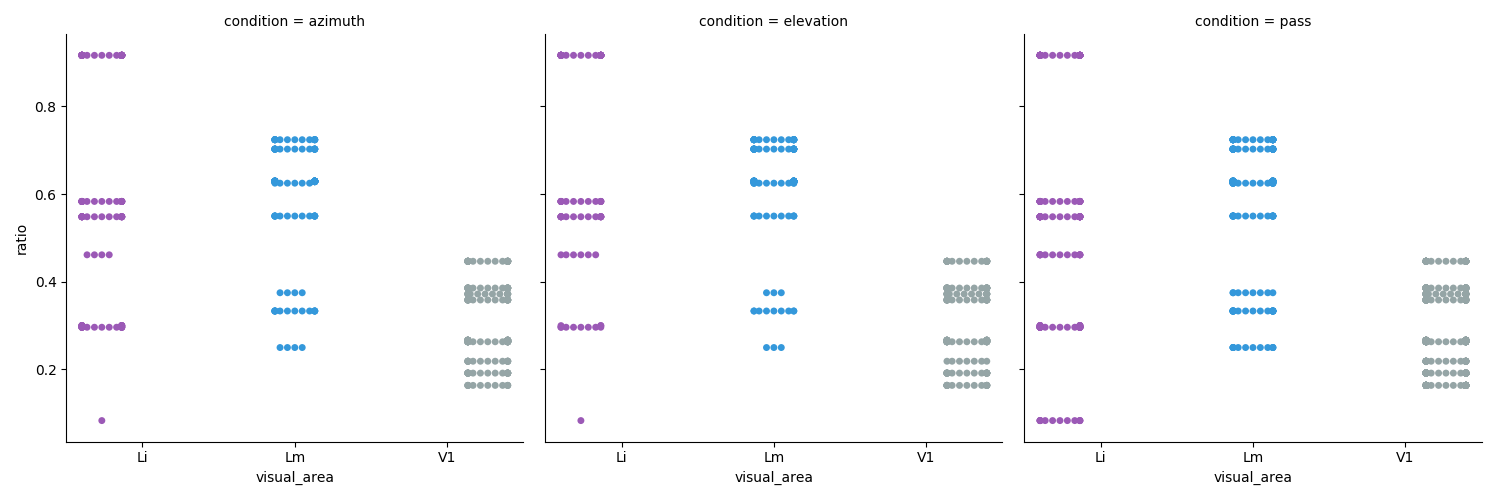

In [33]:
sns.catplot(x='visual_area', y='ratio', col='condition', hue='visual_area', data=df, \
            kind='swarm', dodge=True)

In [74]:
fracs_by_area = dict((visual_area, g.groupby(['animalid', 'session', 'fov'])['ratio'].unique().values.astype(float))\
                     for visual_area, g in df[df['condition']=='azimuth'].groupby(['visual_area']))
                     

In [75]:
df.head()

animalid  cell condition            fov   session visual_area  ratio
0    JC076     7   azimuth  FOV1_zoom2p0x  20190502          Li    0.3
1    JC076    11   azimuth  FOV1_zoom2p0x  20190502          Li    0.3
2    JC076   120   azimuth  FOV1_zoom2p0x  20190502          Li    0.3
3    JC076   135   azimuth  FOV1_zoom2p0x  20190502          Li    0.3
4    JC076   176   azimuth  FOV1_zoom2p0x  20190502          Li    0.3

In [94]:
outdir

'/n/coxfs01/julianarhee/aggregate-visual-areas/receptive-fields/traces001-fit-2dgaus_dff-no-cutoff/scatter'

<IPython.core.display.Javascript object>


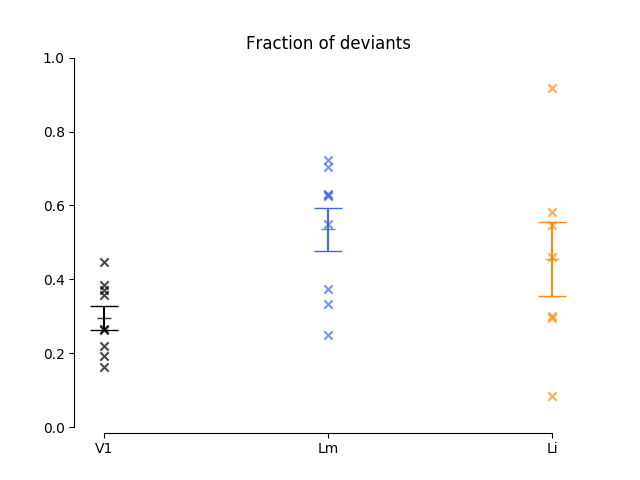

In [95]:
fig, ax = pl.subplots()

for vi, visual_area in enumerate(visual_areas):
    values = fracs_by_area[visual_area]
    ax.scatter([vi for _ in range(len(values))], values,  marker='x', color=area_colors[visual_area], alpha=0.7)
              #edgecolor=area_colors[visual_area], facecolor='none')
    ax.plot(vi, values.mean(), marker='_', color=area_colors[visual_area], markersize=10, alpha=0.8)
    ax.errorbar(vi, values.mean(), yerr=spstats.sem(values), ecolor=area_colors[visual_area], capsize=10)
    #sns.boxplot(x=[vi for _ in range(len(values))], y=values, color=area_colors[visual_area])
ax.set_ylim([0, 1])

ax.set_xticks([0, 1, 2])
ax.set_xticklabels(visual_areas)
sns.despine(ax=ax, trim=True, offset=4)

ax.set_title("Fraction of deviants")

pl.savefig(os.path.join(outdir, 'fraction_deviants.svg'))

In [40]:
g.groupby(['animalid', 'session', 'fov'])['ratio'].unique()

animalid  session   fov          
JC076     20190420  FOV1_zoom2p0x           [0.21875]
JC083     20190507  FOV1_zoom2p0x    [0.372093023256]
JC084     20190522  FOV1_zoom2p0x    [0.263157894737]
JC085     20190622  FOV1_zoom2p0x    [0.266666666667]
JC097     20190613  FOV1_zoom2p0x    [0.358490566038]
          20190615  FOV1_zoom2p0x    [0.191666666667]
                    FOV2_zoom2p0x    [0.163636363636]
          20190616  FOV1_zoom2p0x    [0.385714285714]
          20190617  FOV1_zoom2p0x    [0.446808510638]
Name: ratio, dtype: object

In [78]:
df.groupby(['visual_area', 'animalid', 'session', 'fov'])['ratio'].unique()

visual_area  animalid  session   fov          
Li           JC076     20190502  FOV1_zoom2p0x     [0.272727272727]
             JC090     20190605  FOV1_zoom2p0x    [0.0833333333333]
Lm           JC076     20190423  FOV1_zoom2p0x     [0.333333333333]
             JC078     20190426  FOV1_zoom2p0x      [0.62962962963]
                       20190430  FOV1_zoom2p0x     [0.724137931034]
                       20190513  FOV1_zoom2p0x     [0.733333333333]
             JC080     20190603  FOV1_zoom2p0x     [0.710526315789]
             JC083     20190508  FOV1_zoom2p0x     [0.611111111111]
             JC084     20190525  FOV1_zoom2p0x     [0.333333333333]
             JC091     20190627  FOV1_zoom2p0x              [0.375]
V1           JC076     20190420  FOV1_zoom2p0x     [0.266666666667]
             JC083     20190507  FOV1_zoom2p0x     [0.380952380952]
             JC084     20190522  FOV1_zoom2p0x     [0.272727272727]
             JC097     20190617  FOV1_zoom2p0x     [0.458333333333]
N